## Importing Libraries

In [77]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from pylab import rcParams


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.vector_ar.vecm import coint_johansen

import warnings
warnings.filterwarnings('ignore')

## Loading and inspecting Data

In [78]:
#Loading store information

store = pd.read_csv("store.csv")
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [79]:
# Loading all the Stores day to day sales data
train = pd.read_csv("train.csv")


train.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [80]:
print("Shape of Train data : ",train.shape)
print("\n")
train.info()

Shape of Train data :  (1017209, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [81]:
# it seems to be no null value in the entire data set

In [82]:
# converting "Date" column datatype from object to datetime
train.Date = pd.to_datetime(train['Date'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [83]:
# Filtering the stores:
# Store needed to forecast are numbered as : 1,3,8,9,13,25,29,31,46

In [84]:
num = [1,3,8,9,13,25,29,31,46]

# creating the list with required store names 

store_list = ["store_"+str(x) for x in num]
store_list

['store_1',
 'store_3',
 'store_8',
 'store_9',
 'store_13',
 'store_25',
 'store_29',
 'store_31',
 'store_46']

In [85]:
# d = {store: pd.DataFrame() for store in store_list}
# for i,store in zip(num,store_list):
    
#     store_name = "store"+str(i)
#     print(store_name)
#     store_name = train[train['Store']==i].reset_index() 
#     locals()[store_name = store_name.drop(columns='index')]
    

In [86]:
# Creating individal dataframe for every specific store

store_1 = train[train['Store']==1].set_index('Date')
store_1=store_1[::-1]
print("shape of store_1 :",store_1.shape)
#store_1 = store_1.drop(columns='index')


store_3 = train[train['Store']==3].set_index('Date')
store_3=store_3[::-1]
print("shape of store_3 :",store_3.shape)
#store_3 = store_3.drop(columns='index')

store_8 = train[train['Store']==8].set_index('Date')
store_8=store_8[::-1]
print("shape of store_8 :",store_8.shape)
#store_8 = store_8.drop(columns='index')

store_9 = train[train['Store']==9].set_index('Date')
store_9=store_9[::-1]
print("shape of store_9 :",store_9.shape)
#store_9 = store_9.drop(columns='index')

store_13 = train[train['Store']==13].set_index('Date')
store_13=store_13[::-1]
print("shape of store_13 :",store_13.shape)
#store_13 = store_13.drop(columns='index')

store_25 = train[train['Store']==25].set_index('Date')
store_25=store_25[::-1]
print("shape of store_25 :",store_25.shape)
#store_25 = store_25.drop(columns='index')

store_29 = train[train['Store']==29].set_index('Date')
store_29=store_29[::-1]
print("shape of store_29 :",store_29.shape)
#store_29 = store_29.drop(columns='index')

store_31 = train[train['Store']==31].set_index('Date')
store_31=store_31[::-1]
print("shape of store_31 :",store_31.shape)
#store_31 = store_31.drop(columns='index')

store_46 = train[train['Store']==46].set_index('Date')
store_46=store_46[::-1]
print("shape of store_46 :",store_46.shape)
#store_46 = store_46.drop(columns='index')

shape of store_1 : (942, 8)
shape of store_3 : (942, 8)
shape of store_8 : (942, 8)
shape of store_9 : (942, 8)
shape of store_13 : (758, 8)
shape of store_25 : (942, 8)
shape of store_29 : (942, 8)
shape of store_31 : (942, 8)
shape of store_46 : (758, 8)


It seems like few rows are missing in store 13 and store 46

In [87]:
# information about the all the filtered stores
store_details = store[store['Store'].isin(num)]
store_details

Store StoreType Assortment  CompetitionDistance  \
0       1         c          a               1270.0   
2       3         a          a              14130.0   
7       8         a          a               7520.0   
8       9         a          c               2030.0   
12     13         d          a                310.0   
24     25         c          a                430.0   
28     29         d          c               2170.0   
30     31         d          c               9800.0   
45     46         c          a               1200.0   

    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                         9.0                    2008.0       0   
2                        12.0                    2006.0       1   
7                        10.0                    2014.0       0   
8                         8.0                    2000.0       0   
12                        NaN                       NaN       1   
24                        4.0                    2003.0       0   
28                        NaN                       NaN       0   
30                        7.0                    2012.0       0   
45                        9.0                    2005.0       1   

    Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0               NaN              NaN              NaN  
2              14.0           2011.0  Jan,Apr,Jul,Oct  
7               NaN              NaN              NaN  
8               NaN              NaN              NaN  
12             45.0           2009.0  Feb,May,Aug,Nov  
24              NaN              NaN              NaN  
28              NaN              NaN              NaN  
30              NaN              NaN              NaN  
45             14.0           2011.0  Jan,Apr,Jul,Oct

In [88]:
# creating a list that consist of all the individual store dataframe
store_list_df = [store_1,store_3,store_8,store_9,store_13,store_25,store_29,store_31,store_46]

In [89]:
for i,n in zip(store_list_df,num):
    print("store",n)
    
    print(i.isnull().sum())
    print("\n")

store 1
Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


store 3
Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


store 8
Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


store 9
Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


store 13
Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


store 25
Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
S

In [90]:
# there is no missing/null values in any of the filtered stores

In [91]:
# checking for start and end date for all the store dataframe
for i,n in zip(store_list_df,num):
    print("store",n)
    
    print("start date :",i.index.min(),"end date :",i.index.max())
    print("\n")

store 1
start date : 2013-01-01 00:00:00 end date : 2015-07-31 00:00:00


store 3
start date : 2013-01-01 00:00:00 end date : 2015-07-31 00:00:00


store 8
start date : 2013-01-01 00:00:00 end date : 2015-07-31 00:00:00


store 9
start date : 2013-01-01 00:00:00 end date : 2015-07-31 00:00:00


store 13
start date : 2013-01-01 00:00:00 end date : 2015-07-31 00:00:00


store 25
start date : 2013-01-01 00:00:00 end date : 2015-07-31 00:00:00


store 29
start date : 2013-01-01 00:00:00 end date : 2015-07-31 00:00:00


store 31
start date : 2013-01-01 00:00:00 end date : 2015-07-31 00:00:00


store 46
start date : 2013-01-01 00:00:00 end date : 2015-07-31 00:00:00




Total time period : 2 years , 7 months

## EDA

In [92]:
# Total sales across all the stores

In [93]:
total_sales=[]
for i in store_list_df:
    
    total_sale = i['Sales'].cumsum()
    total_sales.append(total_sale[-1])
    print("Total sales for store ",i["Store"][-1]," : ",total_sales[-1])
    


Total sales for store  1  :  3716854
Total sales for store  3  :  5408261
Total sales for store  8  :  4342857
Total sales for store  9  :  5112061
Total sales for store  13  :  3126578
Total sales for store  25  :  8376557
Total sales for store  29  :  5737160
Total sales for store  31  :  4596143
Total sales for store  46  :  3329125


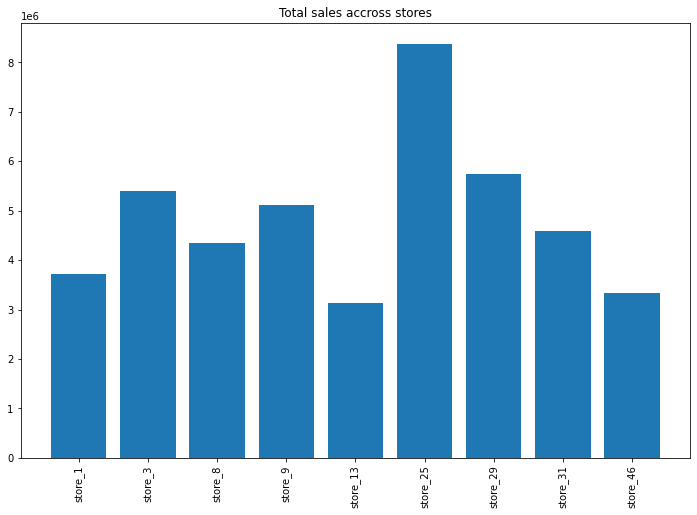

In [94]:
#plotting as bar graph
plt.bar(store_list,total_sales)
plt.xticks(rotation=90)
plt.title("Total sales accross stores")
plt.show()

 - Store 25 has the highest sales
 - Store 13 has the least sales

In [95]:
#Comparing sales data on yearly basis across the store

year_1=[] # year_1 = 2013-01-01 : 2014-01-01
year_2=[] #year_2 = 2014-01-01 : 2015-01-01
year_3=[] #year_3 = 2015-01-01 : 2015-07-31 (last 7 months)
for i in store_list_df:
    year1 = i.loc['2013-01-01':'2014-01-01']['Sales'].sum()
    year_1.append(year1)
    year2 = i.loc['2014-01-01':'2015-01-01']['Sales'].sum()
    year_2.append(year2)
    year3 = i.loc['2015-01-01':'2015-07-31']['Sales'].sum()
    year_3.append(year3)
    

In [96]:
# Grouping all the stores sales by years
yearly_sales = pd.concat([pd.DataFrame(store_list),pd.DataFrame(year_1),pd.DataFrame(year_2),pd.DataFrame(year_3)],axis=1)
yearly_sales.columns=['store',"2013-2014","2014-2015","2015-2015-07"]
yearly_sales.set_index('store',inplace=True)
yearly_sales

2013-2014  2014-2015  2015-2015-07
store                                       
store_1     1491140    1433408        792306
store_3     2128265    2072949       1207047
store_8     1542263    1689700       1110894
store_9     1738014    2054495       1319552
store_13    1481467     738440        906671
store_25    3465987    3004443       1906127
store_29    1956532    2312670       1467958
store_31    1767016    1806223       1022904
store_46    1574354     798454        956317

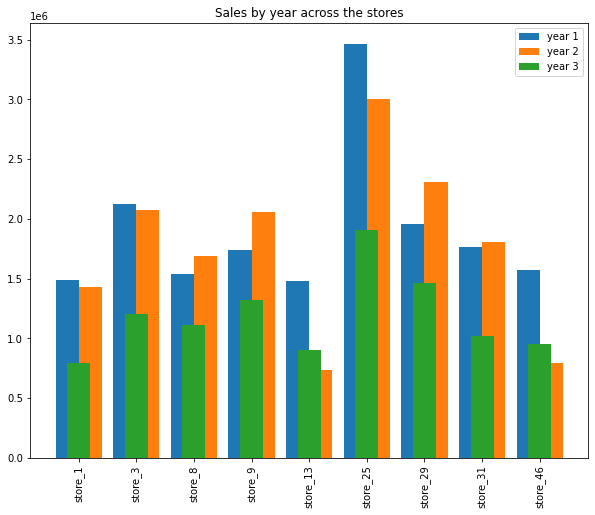

In [97]:
#plotting the data ("Sales by year across the stores")
X_axis = np.arange(len(yearly_sales.index))

plt.figure(figsize=(10,8))
plt.bar(X_axis -0.2,yearly_sales['2013-2014'],0.4,label='year 1')
plt.bar(X_axis +0.2,yearly_sales['2014-2015'],0.4,label='year 2')
plt.bar(X_axis,yearly_sales['2015-2015-07'],0.4,label='year 3')

plt.title("Sales by year across the stores")
plt.xticks(X_axis,yearly_sales.index,rotation=90)
plt.legend()
plt.show()

In [98]:
#comparing sales data on basis of day of the week

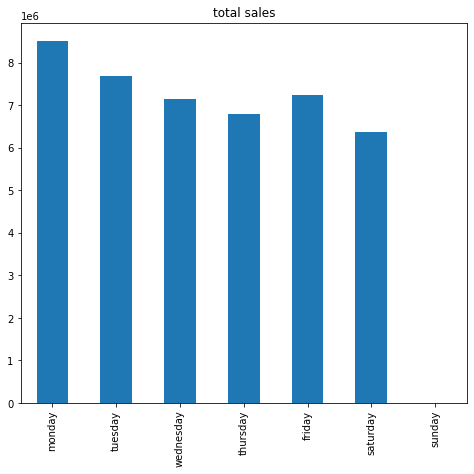

In [99]:
day = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']

total_sales = train[train['Store'].isin(num)]

daw_total_sales = total_sales.groupby(by=['DayOfWeek'])['Sales'].sum()
daw_total_sales.index = day
locs,labels=plt.xticks()
daw_total_sales.plot.bar(figsize=(8,7),title='total sales')
plt.show()

- Monday has the highest sales and saturday has the least
- There is also a spike in friday as well
- Sunday has zero sales since the store is closed


### comparing sales data on basis of day of the week across the stores

In [100]:
# creating a list which has sales data on basis of day of the week across the stores
daw_sales=[]
for i in store_list_df:
    daw = i.groupby(by=['DayOfWeek'])['Sales'].sum()
    daw_sales.append(daw)

# converting the list into dataframe    
daw_sales_df = pd.DataFrame(daw_sales)
daw_sales_df.index = store_list
daw_sales_df.columns=day    

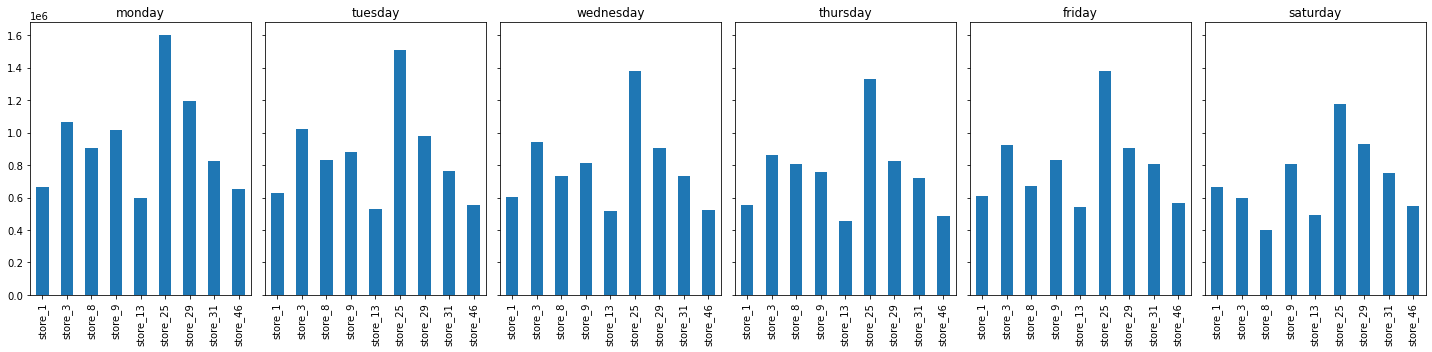

In [101]:
# plotting the data which visalize the sales on basis of day of the week across the stores
fig, axes = plt.subplots(1,6, figsize=(20,5),sharey=True)
for col,ax in zip(daw_sales_df.columns,axes):
    daw_sales_df[col].plot(kind='bar',ax=ax,title=col)
    
    #daw_sales_df.index,daw_sales_df[col].plot.bar()
    #axes[i].set_xlabel(rotation = 90)
    #axes[i].set_title(daw_sales_df.columns[i])
fig.tight_layout()    

- Store-8 seems to have poor sales at the end of the week (thursday , friday , saturday)


### customer analysis

In [102]:
# Total customers across all the stores
total_customer=[]
for i in store_list_df:
    
    total_cust = i['Customers'].cumsum()
    total_customer.append(total_cust[-1])
    


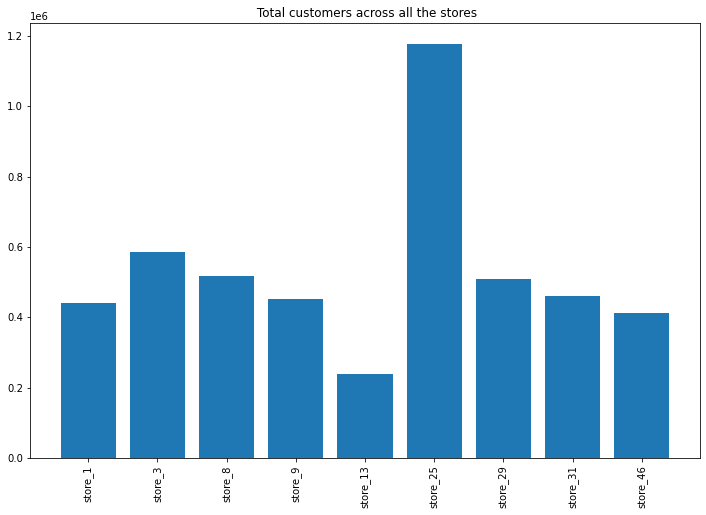

In [103]:
#plotting as bar graph
plt.bar(store_list,total_customer)
plt.xticks(rotation=90)
plt.title(" Total customers across all the stores")
plt.show()

- Store-25 has the highest number of customers
- Store-13 has lowesr number of customers

In [104]:
#Comparing customers data on yearly basis across the store

year_1=[]
year_2=[]
year_3=[]
for i in store_list_df:
    year1 = i.loc['2013-01-01':'2014-01-01']['Customers'].sum()
    year_1.append(year1)
    year2 = i.loc['2014-01-01':'2015-01-01']['Customers'].sum()
    year_2.append(year2)
    year3 = i.loc['2015-01-01':'2015-07-31']['Customers'].sum()
    year_3.append(year3)
    
# Grouping all the customer footfall by years
yearly_customers = pd.concat([pd.DataFrame(store_list),pd.DataFrame(year_1),pd.DataFrame(year_2),pd.DataFrame(year_3)],axis=1)
yearly_customers.columns=['store',"2013-2014","2014-2015","2015-2015-07"]
yearly_customers.set_index('store',inplace=True)


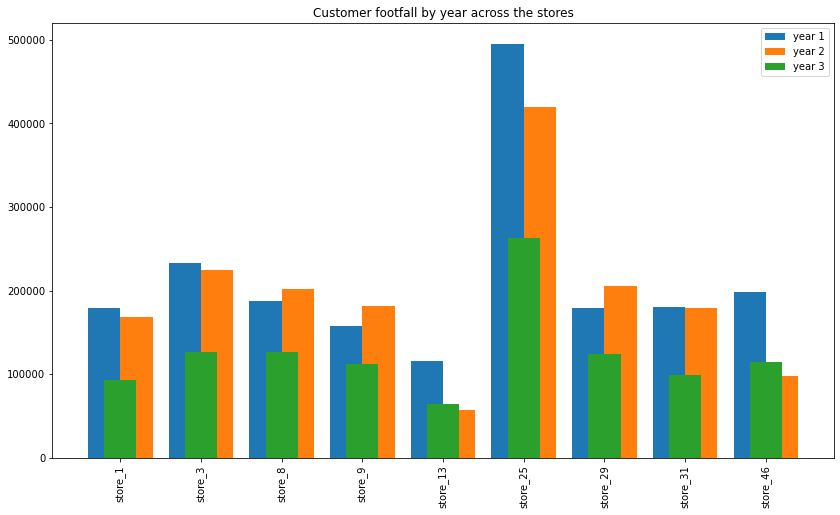

In [105]:
#plotting the data ("customer footfall by year across the stores")

X_axis = np.arange(len(yearly_customers.index))

plt.figure(figsize=(14,8))
plt.bar(X_axis -0.2,yearly_customers['2013-2014'],0.4,label='year 1')
plt.bar(X_axis +0.2,yearly_customers['2014-2015'],0.4,label='year 2')
plt.bar(X_axis,yearly_customers['2015-2015-07'],0.4,label='year 3')

plt.title("Customer footfall by year across the stores")
plt.xticks(X_axis,yearly_customers.index,rotation=90)
plt.legend()
plt.show()

#### comparing customer data on basis of day of the week

<AxesSubplot:title={'center':'total customers'}, xlabel='DayOfWeek'>

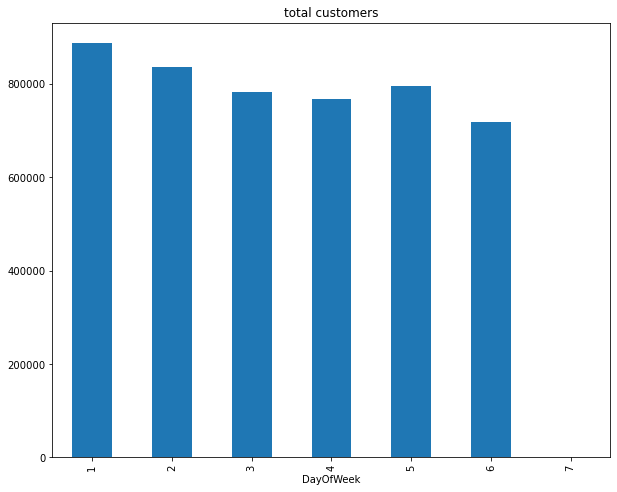

In [106]:

total_customer = train[train['Store'].isin(num)]

daw_total_customer = total_customer.groupby(by=['DayOfWeek'])['Customers'].sum()
locs,labels=plt.xticks()
daw_total_customer.plot.bar(figsize=(10,8),title='total customers')

In [107]:
# comparing customer data on basis of day of the week across the stores

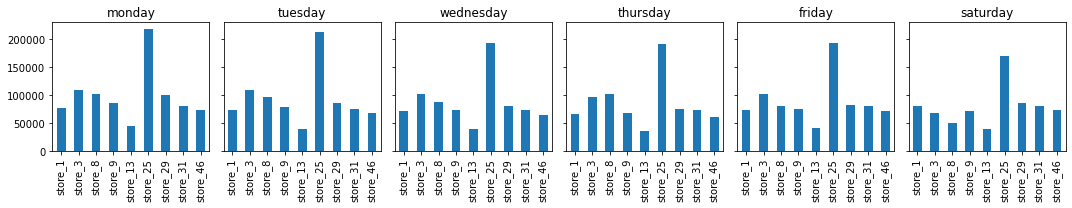

In [108]:
# creating a list which has customer footfall data on basis of day of the week across the stores
daw_customer=[]
for i in store_list_df:
    daw = i.groupby(by=['DayOfWeek'])['Customers'].sum()
    daw_customer.append(daw)
    
day = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']

# converting the list into dataframe 
daw_customer_df = pd.DataFrame(daw_customer)
daw_customer_df.index = store_list
daw_customer_df.columns=day
daw_customer_df.head(2)

# plotting the data which visalize the sales on basis of day of the week across the stores
fig, axes = plt.subplots(1,6, figsize=(15,3),sharey=True)
for col,ax in zip(daw_customer_df.columns,axes):
    daw_customer_df[col].plot(kind='bar',ax=ax,title=col)
    
    #daw_customer_df.index,daw_customer_df[col].plot.bar()
    #axes[i].set_xlabel(rotation = 90)
    #axes[i].set_title(daw_customer_df.columns[i])
fig.tight_layout()   

#### Analysing how effective the promo are against the sales

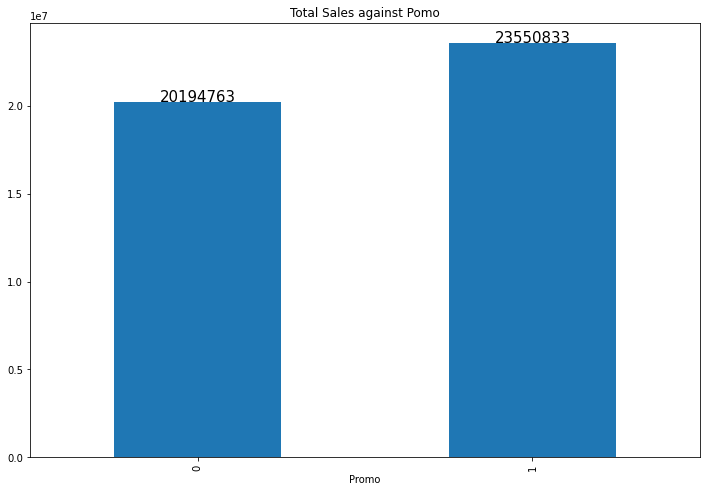

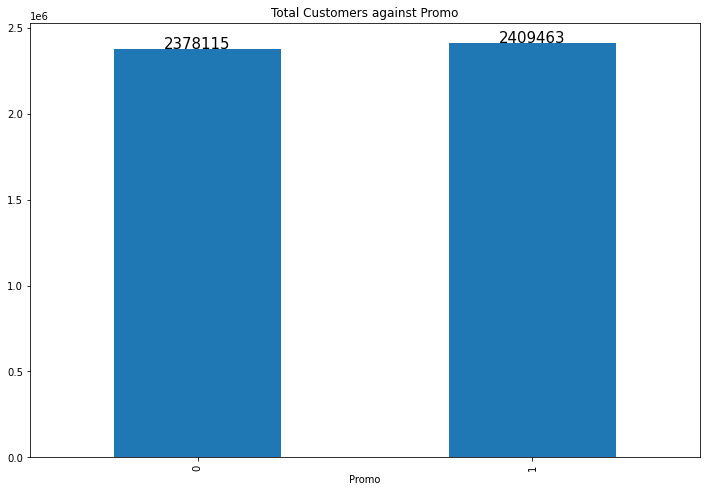

In [109]:

total_promo = train[train['Store'].isin(num)]

#Total sales - promo
promo = total_promo.groupby(by=['Promo'])['Sales'].sum()
plots =promo.plot.bar()

for bar in plots.patches:
 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
plt.title("Total Sales against Pomo")
plt.show()

#Total customers - promo
promo_c = total_promo.groupby(by=['Promo'])['Customers'].sum()
plots =promo_c.plot.bar()
for bar in plots.patches:
 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
plt.title("Total Customers against Promo")
plt.show()

#### Note:
         0 = No Promo
         1 = Promo
     

- Promo has significant impact on the Total sales
- In terms of Total customers promo is being inssignificant

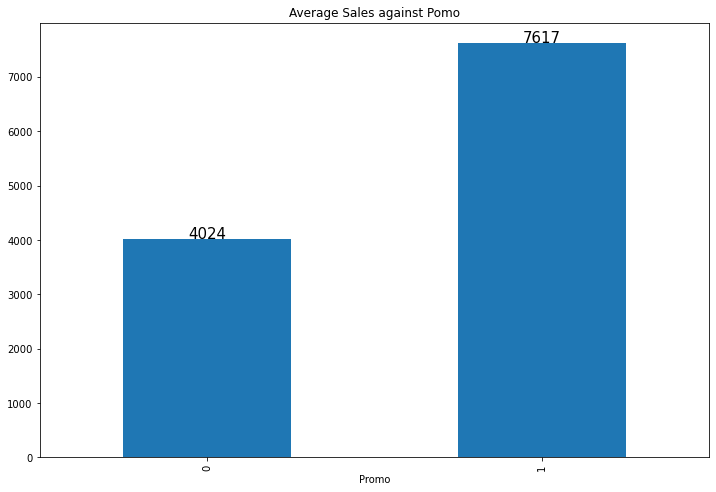

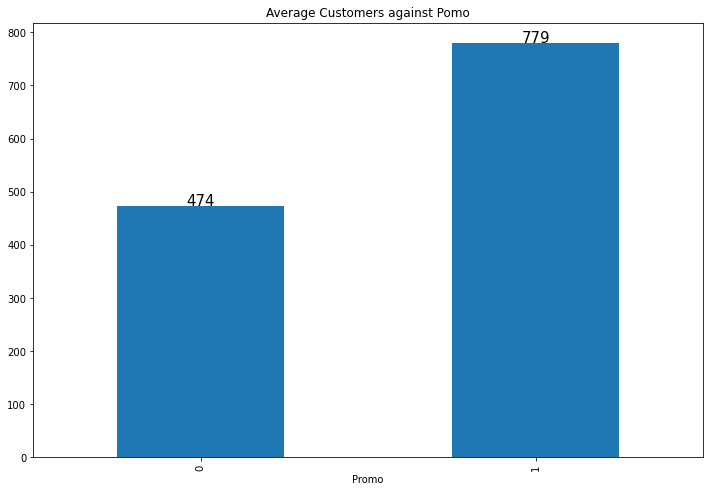

In [110]:
#mean sales - promo
promo = total_promo.groupby(by=['Promo'])['Sales'].mean()
plots =promo.plot.bar()
for bar in plots.patches:
 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
plt.title("Average Sales against Pomo")
plt.show()

promo_c = total_promo.groupby(by=['Promo'])['Customers'].mean()
plots =promo_c.plot.bar()
for bar in plots.patches:
 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
plt.title("Average Customers against Pomo")
plt.show()

- Promo has positive impact on both average sales as well as average customers


#### Finding OUTLIERS

store  1


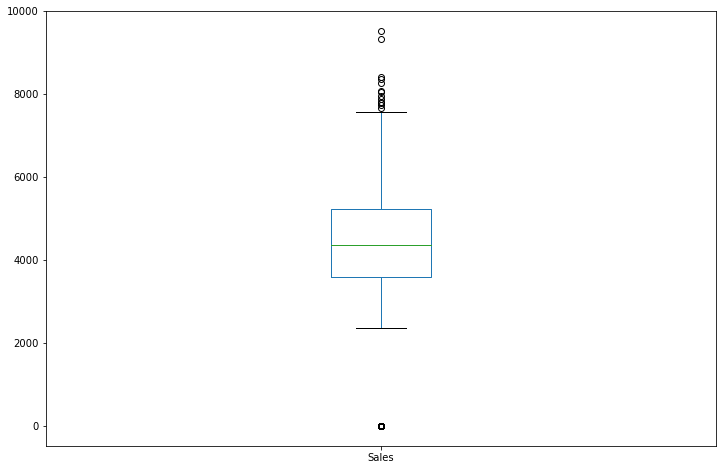

store  3


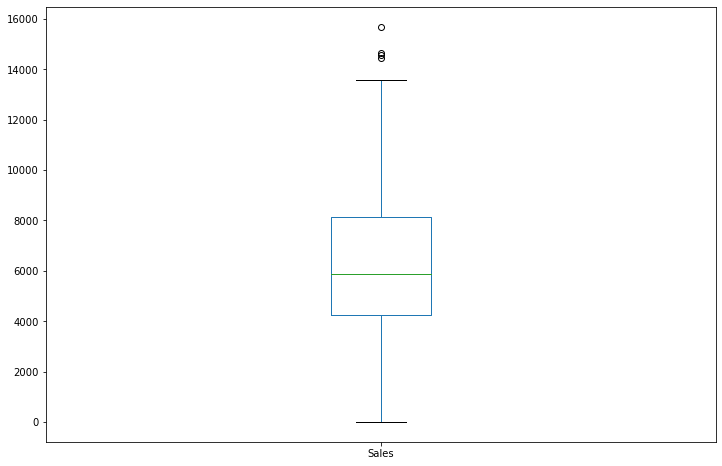

store  8


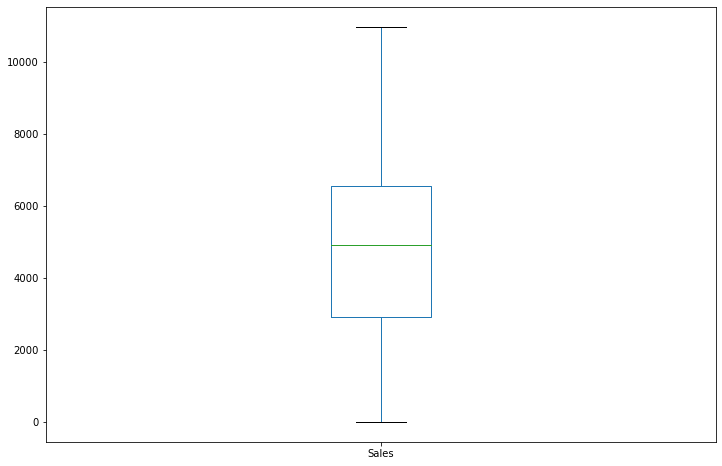

store  9


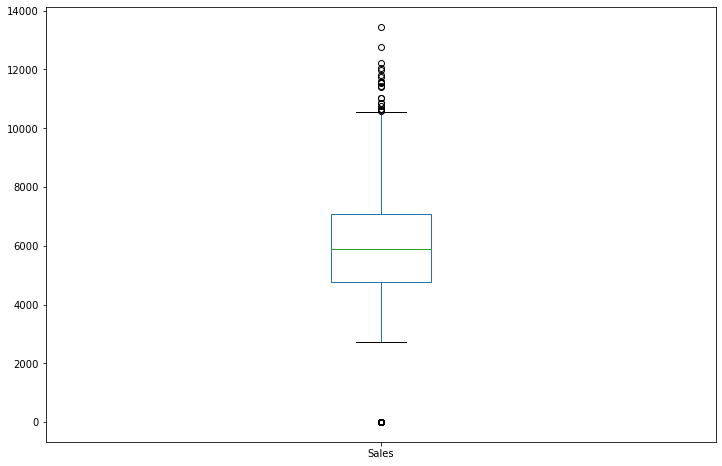

store  13


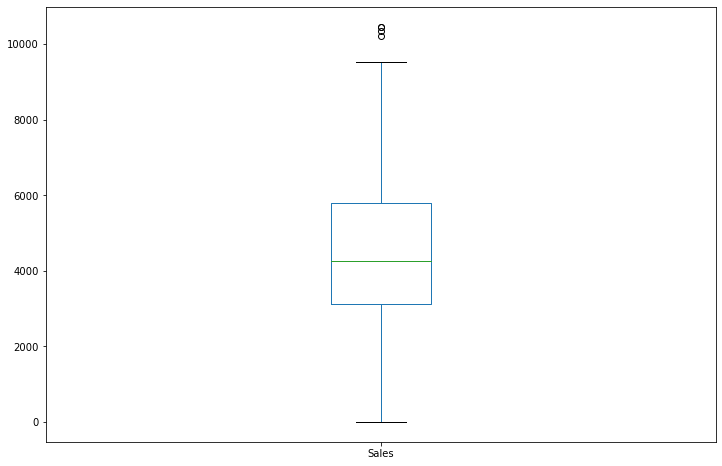

store  25


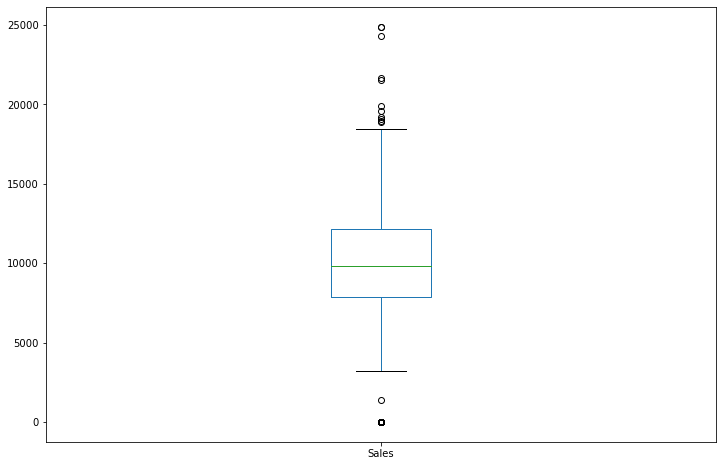

store  29


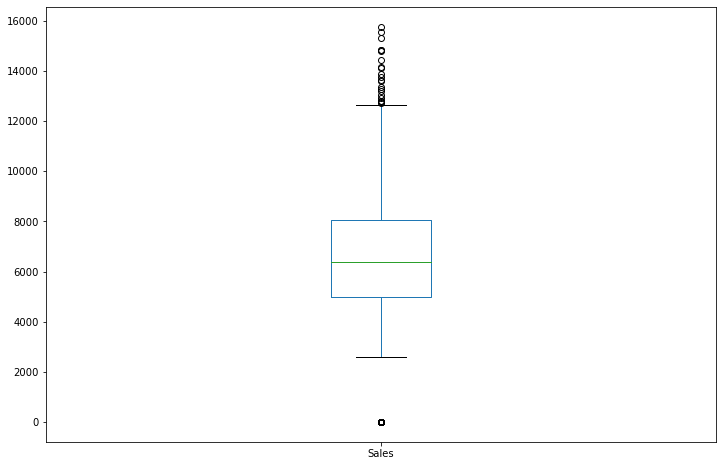

store  31


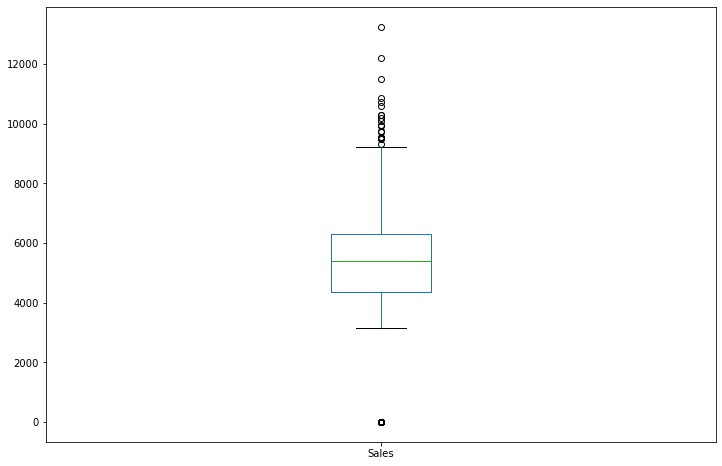

store  46


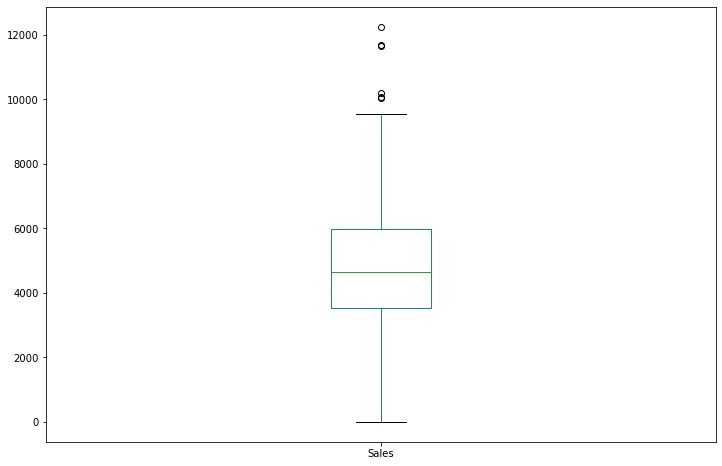

In [111]:
#plotting box plot for all the stores for the feature Sales
for i in store_list_df:
    print("store ",i['Store'][0])
    i['Sales'].plot.box()
    plt.show()

store  1


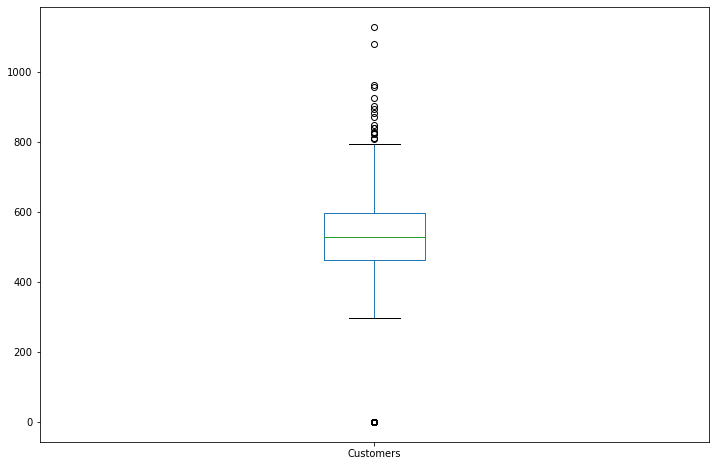

store  3


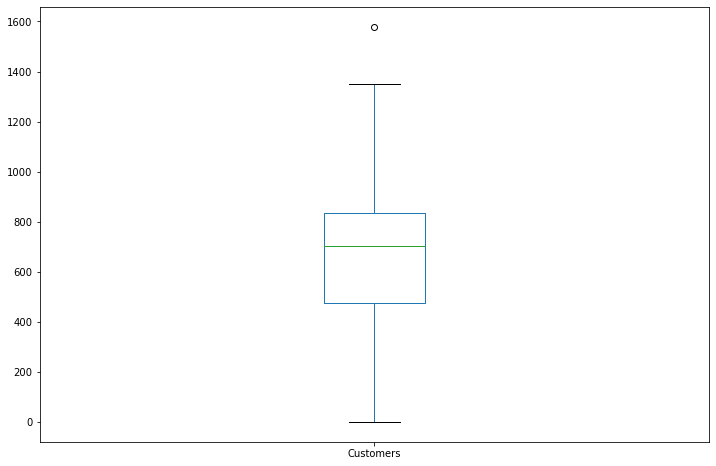

store  8


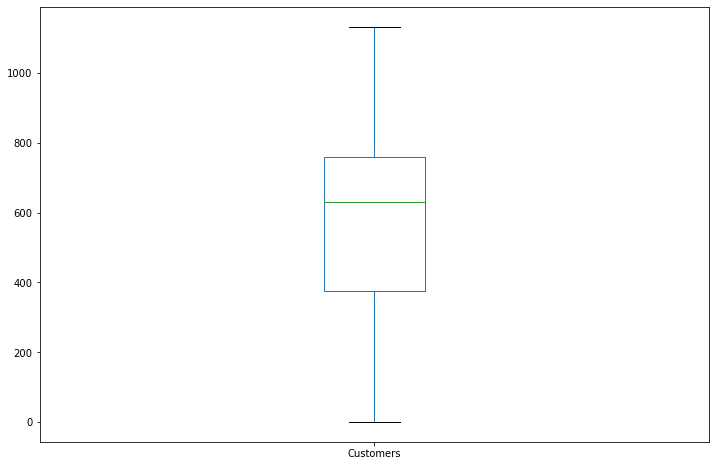

store  9


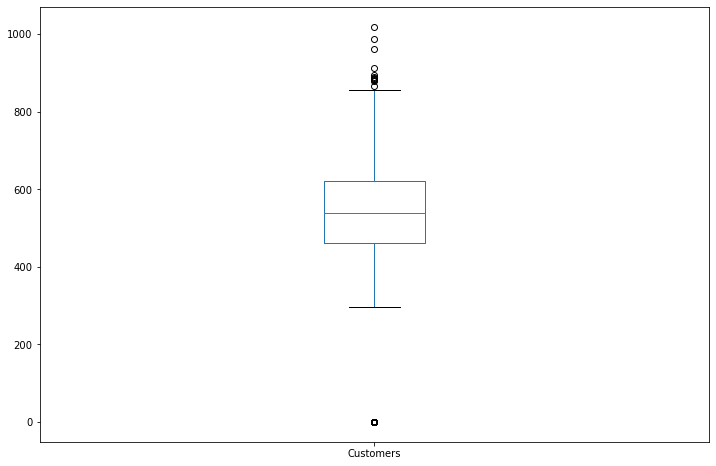

store  13


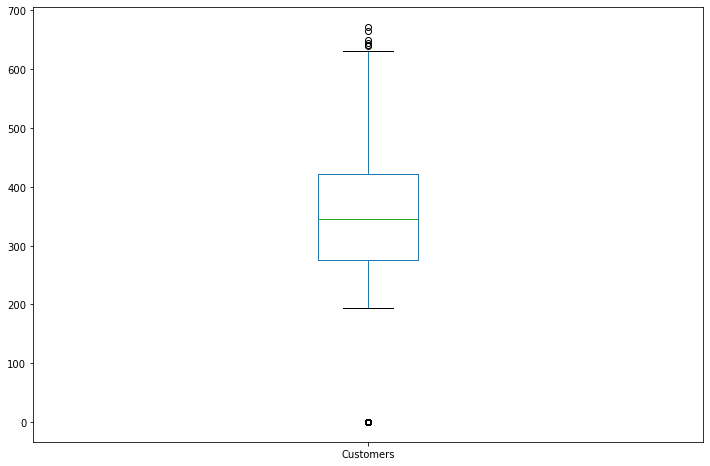

store  25


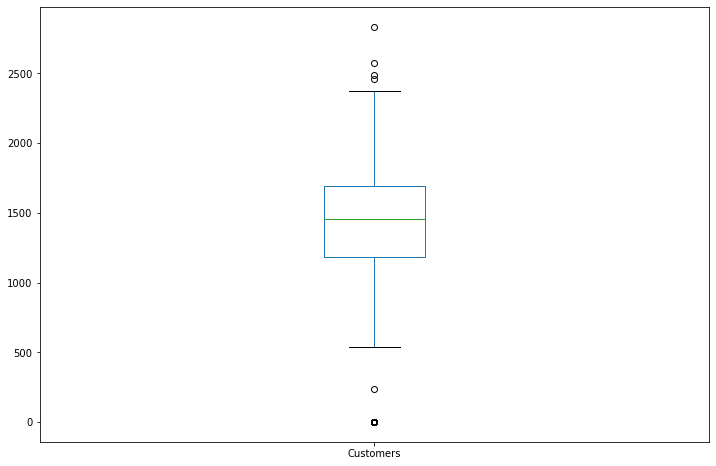

store  29


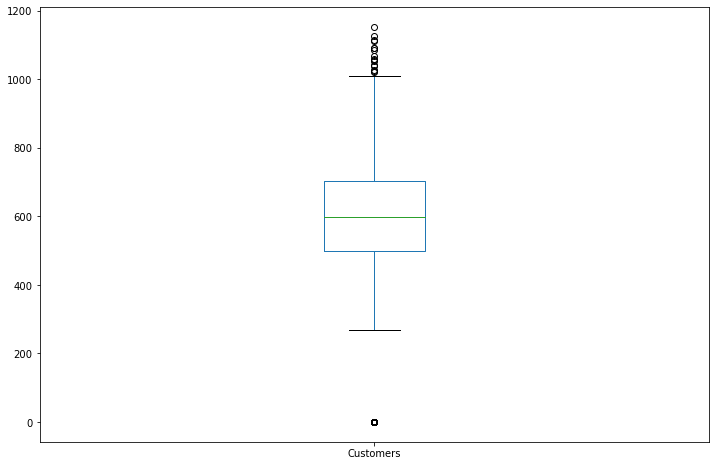

store  31


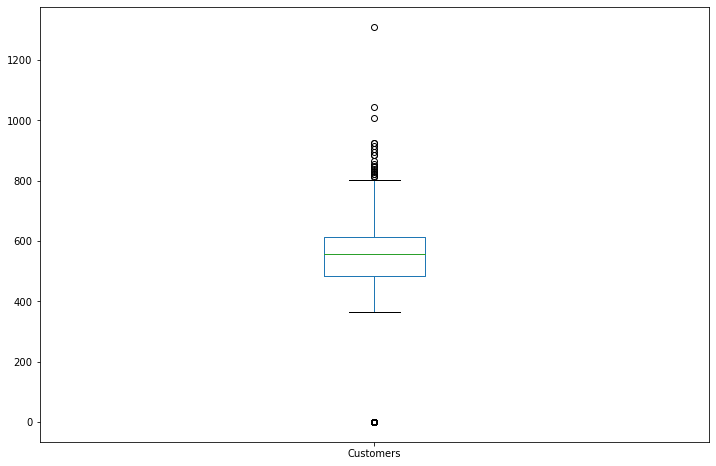

store  46


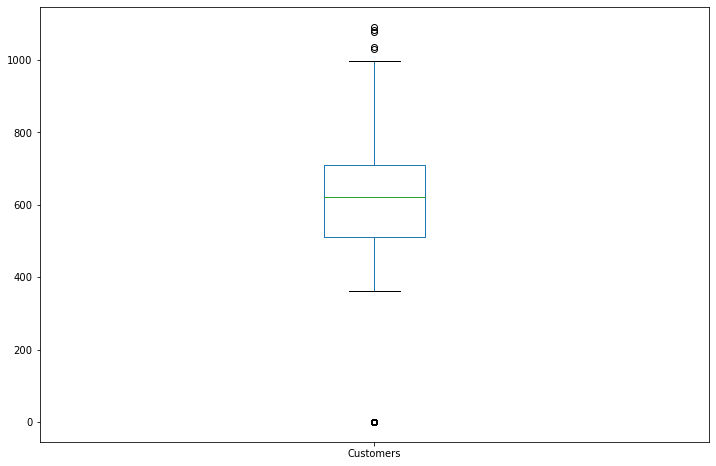

In [112]:
#plotting box plot for all the stores for the feature Customers
for i in store_list_df:
    print("store ",i['Store'][0])
    i['Customers'].plot.box()
    plt.show()

### Forecasting

In [113]:
# adf test:
from statsmodels.tsa.stattools import adfuller

#### Creating some common function that can be used for all the store forecast individaully

In [114]:
# pacf and acf ploting
def pacf_acf_val(data,lag):
    pacf, ci = sm.tsa.pacf(data, alpha=0.05,nlags=lag)
    interval_pacf=[]
    
    for i in range(len(pacf)):
        k = ci[i]-pacf[i]
        interval_pacf.append(k)
        
    count=0
    for i in range(len(pacf)):
        if (pacf[i] < interval_pacf[i][0] or pacf[i] > interval_pacf[i][1]):
            c=i

            flag = 1
            count = count+flag
    print("*"*4,"PACF","*"*4)
    print("pacf value : ",c)
    print("total pacf value that crossed interval : ",count)
    
    plt.figure(figsize=(10,5))
    pacf = plot_pacf(data,ax=plt.gca(),lags=lag)
    plt.title("PACF")
    plt.show()
    
    print("\n")    
    
    acf, ci = sm.tsa.acf(data, alpha=0.05,nlags=lag)
    
    interval_acf=[]
    
    for i in range(len(acf)):
        k = ci[i]-acf[i]
        interval_acf.append(k)
        
    count=0
    for i in range(len(acf)):
        if (acf[i] < interval_acf[i][0] or acf[i] > interval_acf[i][1]):
            c=i

            flag = 1
            count = count+flag
    print("*"*4,"ACF","*"*4)
    print("pacf value : ",c)
    print("total pacf value that crossed interval : ",count)
    
    plt.figure(figsize=(10,5))
    acf = plot_acf(data,ax=plt.gca(),lags=lag)
    plt.title("ACF")
    plt.show()
    
    
    

In [115]:
# function to find error values
def error(original_val,predicted_val):
    rmse = rmse = np.sqrt(mean_squared_error(original_val,predicted_val)).round(2)
    print("RMSE : ",rmse)
    mae = round(np.mean(np.abs(original_val-predicted_val)),2)
    print("MAE : ",mae)
    return rmse,mae
    

In [116]:
# function to remove outliers by using capping
def outliers_treatment(data,lower_capping,upper_capping):
   
    percentile = data.quantile([lower_capping,upper_capping]).values
    data[data <= percentile[0]] = percentile[0]
    data[data >= percentile[1]] = percentile[1]
   
    return data

In [117]:
# fuction to scale the features
def scaling(data,col):
    temp_data = data.copy()
    scaler = StandardScaler()
    temp_data[col] = scaler.fit_transform(data[col])
    return temp_data,scaler
    

In [118]:
#function to convert scaled values to its original form
def inverse_scaler(data,scaler):
    
    scaler=scaler
    inverse = scaler.inverse_transform(data)
    
    inverse = pd.DataFrame(inverse)
    inverse.columns = data.columns
    inverse.index = data.index
    return inverse

In [119]:
def visualisation(data):
    
    plt.figure(figsize= [20,4])
    
    sns.pairplot(data, x_vars= ['Customers','DayOfWeek', 'Promo', 'SchoolHoliday'],y_vars = ["Sales"])
    
    plt.suptitle("Relation between sales and other variables",y=1.08)
    plt.show()
    
    plt.figure(figsize= [10,5])
    data[data['Sales']!=0]['Sales'].hist(bins= 100)
    plt.title("Distibution of sale (0 are removed)")
    plt.show()
    
    plt.figure(figsize=[6,5])
    sns.heatmap(data.corr(),annot=True,fmt=".2f")
    plt.title("Correlation between variables",loc="center")
    plt.show()

In [120]:
def johnasen_test(data):
    john_model = coint_johansen(data,-1,1)
    trace = john_model.lr1
    cvts =  john_model.cvt
    
    for i in range(2):
        if trace[i]>cvts[i,1]:
            r = i+1
    print("Rank : ",r)        
    if r == 2:
        print("Both Series are stationary")
        print("No cointgeration")
    elif r == 1:
        print("Both Series are Cointegerated")
    else:
        print("Both series are not Stationary")
        print("Both series are not cointegertaed")

In [121]:
train_len = 900

In [122]:
def adf_test(sale,cust):
    adf_test_sale = adfuller(sale)
    print("adf sale statistics : ",adf_test_sale[0])
    print("sales data p-value: ",adf_test_sale[1])
    print("--"*5)
    adf_test_cust = adfuller(cust)
    print("adf cutomer statistics : ",adf_test_cust[0])
    print("customer data p-value: ",adf_test_cust[1])
    print("**"*5)
    if adf_test_sale[1] <= 0.5:
        print("sales data is STATIONARY")
    else:
        print("sales data is NOT STATIONARY")
    if adf_test_cust[1] <= 0.5:
        print("customer data is STATIONARY")
    else:
        print("customer data is NOT STATIONARY")
    print("**"*5)
    
    return     

# Checking Adffuller test for all the store to find the stionarity

for i in store_list_df:
    print("store ",i['Store'][0])
    adf_test(i['Sales'],i['Customers'])
    print("\n")

store  1
adf sale statistics :  -4.3681043681685034
sales data p-value:  0.000337883461414238
----------
adf cutomer statistics :  -3.6968421117345405
customer data p-value:  0.004157792561711031
**********
sales data is STATIONARY
customer data is STATIONARY
**********


store  3
adf sale statistics :  -5.911548396935853
sales data p-value:  2.6316169036390814e-07
----------
adf cutomer statistics :  -5.522482536287624
customer data p-value:  1.864147285071515e-06
**********
sales data is STATIONARY
customer data is STATIONARY
**********


store  8
adf sale statistics :  -3.5660367081916675
sales data p-value:  0.006444532313171282
----------
adf cutomer statistics :  -3.990325335482043
customer data p-value:  0.0014620265446040443
**********
sales data is STATIONARY
customer data is STATIONARY
**********


store  9
adf sale statistics :  -3.1663336605128194
sales data p-value:  0.02201801196662036
----------
adf cutomer statistics :  -3.2927505089142985
customer data p-value:  0.0152

- Both sales and customer features for all the stores are stationary

### Store 1 : Forecasting sales

In [123]:
train_len = 900

In [124]:
#spliting the data into train and test
store = "store 1"
store_1_train = store_1[:train_len]
store_1_test = store_1[train_len:]

print("Train data shape : ",store_1_train.shape)
print("test data shape : ",store_1_test.shape)

Train data shape :  (900, 8)
test data shape :  (42, 8)


<Figure size 1440x288 with 0 Axes>

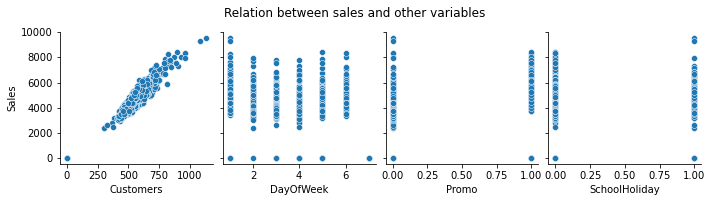

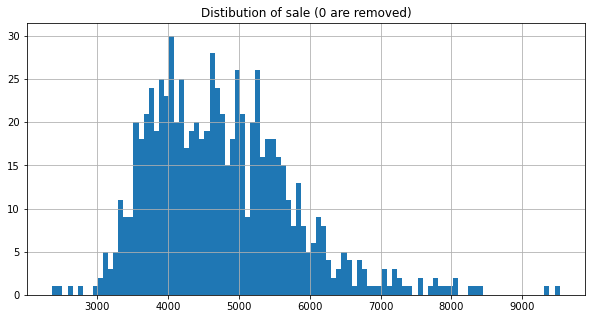

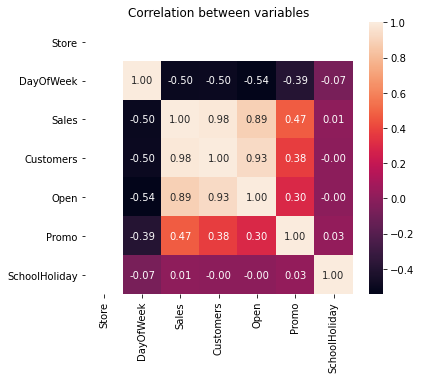

In [125]:
#visualization

visualisation(store_1)

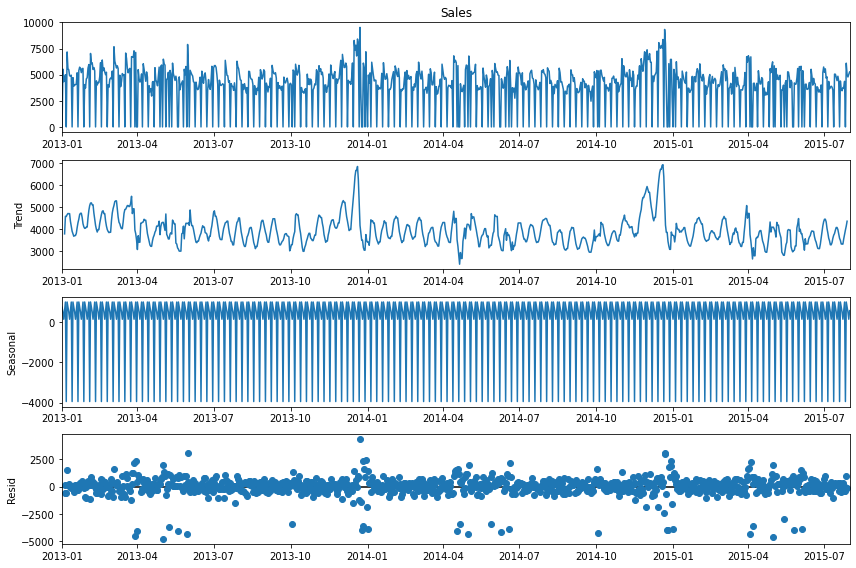

In [126]:
rcParams['figure.figsize']  =12,8
decomposition = sm.tsa.seasonal_decompose(store_1['Sales'],model = 'additive')
fig = decomposition.plot()
plt.show()

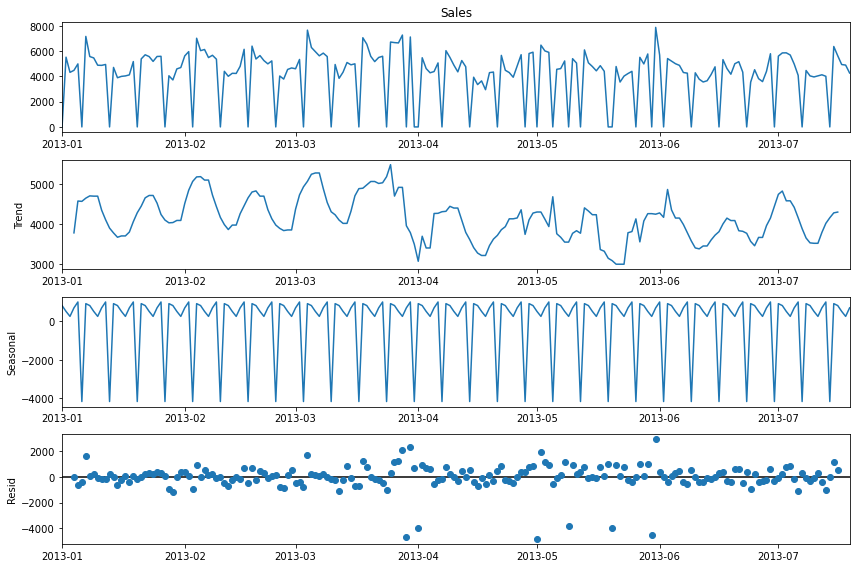

In [127]:
#reducing the size of dataset to see the seasonal pattern clearly
rcParams['figure.figsize']  =12,8
decomposition = sm.tsa.seasonal_decompose(store_1['Sales'][:200],model = 'additive')
fig = decomposition.plot()
plt.show()

In [128]:
# season = 7 days

In [129]:
# Johansen test to check wheather both series are cointegerated (Thogh we already know both the series are stationary from ADF test)
johnasen_test(store_1[["Sales","Customers"]])

Rank :  2
Both Series are stationary
No cointgeration


**** PACF ****
pacf value :  28
total pacf value that crossed interval :  15


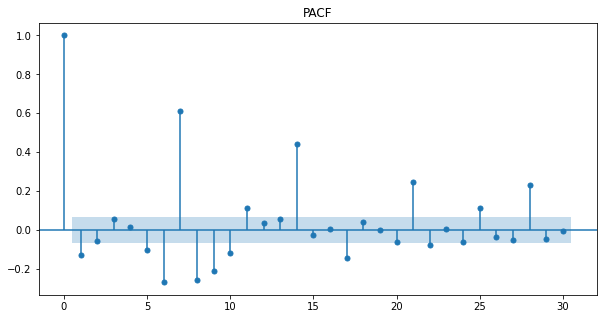



**** ACF ****
pacf value :  29
total pacf value that crossed interval :  17


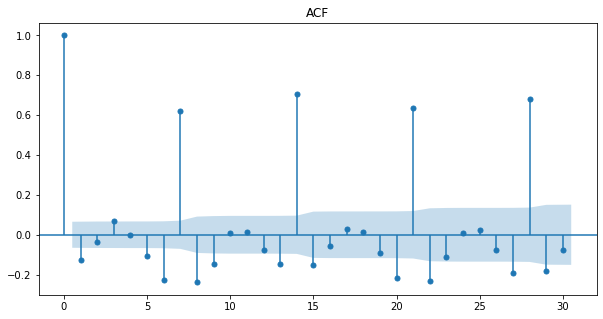

In [130]:
pacf_acf_val(store_1_train['Sales'],30)

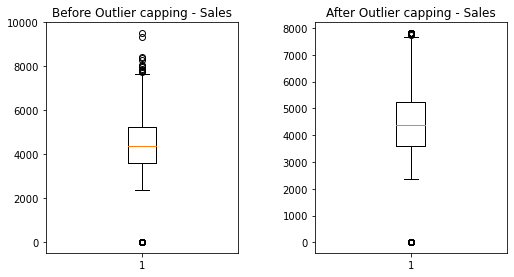

In [131]:
# outliers
store_1_train_no_outliers = store_1_train.copy()
store_1_train_no_outliers['Sales'] = outliers_treatment(store_1_train_no_outliers['Sales'],0,0.99)


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.boxplot(store_1_train['Sales'])
plt.title("Before Outlier capping - Sales")


plt.subplot(1,2,2)
plt.boxplot(store_1_train_no_outliers['Sales'])
plt.title("After Outlier capping - Sales")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 

plt.show()

In [132]:
#standardizing the SALES columns

standarization_column = ['Sales']
store_1_train_standardized,scaler = scaling(store_1_train_no_outliers,standarization_column)

In [133]:
# model building

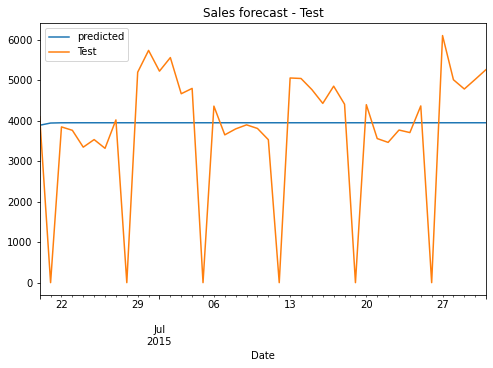

RMSE :  1688.37
MAE :  1150.2


In [134]:
# model 1:

#model building
model_s1_1 = ARIMA(store_1_train_standardized['Sales'],order =(1,0,1))
model_s1_1 = model_s1_1.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s1_1.predict(store_1_test.index.min(),store_1_test.index.max())

prediction = pd.DataFrame(prediction)
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

plt.figure(figsize=(8,5))
prediction[0].plot(label="predicted")
store_1_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

rmse , mae =error(store_1_test['Sales'],prediction[0])

In [135]:
result_store_1 = pd.DataFrame()

In [136]:
model = "model_s1_1"
model_type = "ARIMA"
model_para = (1,0,1)
exog = "None"

In [137]:
temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_1 = pd.concat([result_store_1,temp_result],axis=0)
result_store_1

store      model      Rmse     Mae model_type model_para exogenous var
0  store 1  model_s1_1  1688.37  1150.2      ARIMA  (1, 0, 1)          None

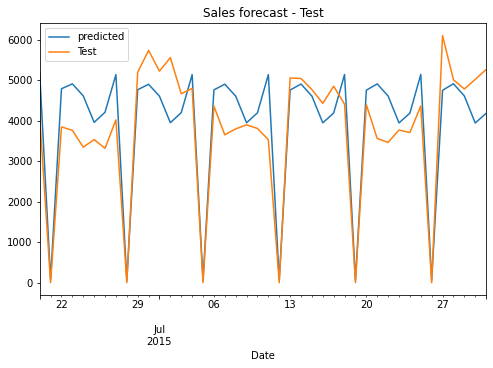

RMSE :  789.82
MAE :  632.99


In [138]:
# model 2

#model building
model_s1_2 = ARIMA(store_1_train_standardized['Sales'],order =(7,0,7))
model_s1_2 = model_s1_2.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s1_2.predict(store_1_test.index.min(),store_1_test.index.max())

prediction = pd.DataFrame(prediction)

# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#ploting
plt.figure(figsize=(8,5))
prediction[0].plot(label="predicted")
store_1_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

# error value
rmse , mae =error(store_1_test['Sales'],prediction[0])

In [139]:
model_s1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  900
Model:                     ARMA(7, 7)   Log Likelihood                -775.218
Method:                       css-mle   S.D. of innovations              0.564
Date:                Sun, 16 Jan 2022   AIC                           1582.436
Time:                        17:09:18   BIC                           1659.274
Sample:                    01-01-2013   HQIC                          1611.788
                         - 06-19-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0025      0.032     -0.076      0.939      -0.066       0.061
ar.L1.Sales    -0.3037        nan        nan        nan         nan         nan
ar.L2.Sales    -0.3051        nan        nan        nan         nan         nan
ar.L3.Sales    -0.3048        nan        nan        nan         nan         nan
ar.L4.Sales    -0.3041        nan        nan        nan         nan         nan
ar.L5.Sales    -0.3035        nan        nan        nan         nan         nan
ar.L6.Sales    -0.3044        nan        nan        nan         nan         nan
ar.L7.Sales     0.6956   1.83e-05   3.79e+04      0.000       0.696       0.696
ma.L1.Sales     0.5186      0.029     18.026      0.000       0.462       0.575
ma.L2.Sales     0.5273      0.030     17.795      0.000       0.469       0.585
ma.L3.Sales     0.5368      0.029     18.796      0.000       0.481       0.593
ma.L4.Sales     0.5162      0.028     18.202      0.000       0.461       0.572
ma.L5.Sales     0.5314      0.029     18.490      0.000       0.475       0.588
ma.L6.Sales     0.5183      0.029     17.585      0.000       0.461       0.576
ma.L7.Sales    -0.4658      0.029    -15.930      0.000      -0.523      -0.409
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9010           -0.4341j            1.0001           -0.4285
AR.2           -0.9010           +0.4341j            1.0001            0.4285
AR.3           -0.2222           -0.9750j            1.0000           -0.2857
AR.4           -0.2222           +0.9750j            1.0000            0.2857
AR.5            0.6233           -0.7820j            1.0000           -0.1429
AR.6            0.6233           +0.7820j            1.0000            0.1429
AR.7            1.4373           -0.0000j            1.4373           -0.0000
MA.1           -0.9076           -0.4324j            1.0054           -0.4292
MA.2           -0.9076           +0.4324j            1.0054            0.4292
MA.3           -0.2198           -0.9759j            1.0004           -0.2853
MA.4           -0.2198           +0.9759j            1.0004            0.2853
MA.5            0.6227           -0.7825j            1.0000           -0.1430
MA.6            0.6227           +0.7825j            1.0000            0.1430
MA.7            2.1221           -0.0000j            2.1221           -0.0000
-----------------------------------------------------------------------------
"""

In [140]:
model = "model_s1_2"
model_type = "ARIMA"
model_para = (7,0,7)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_1 = pd.concat([result_store_1,temp_result],axis=0)
result_store_1

store      model      Rmse      Mae model_type model_para exogenous var
0  store 1  model_s1_1  1688.37  1150.20      ARIMA  (1, 0, 1)          None
0  store 1  model_s1_2   789.82   632.99      ARIMA  (7, 0, 7)          None

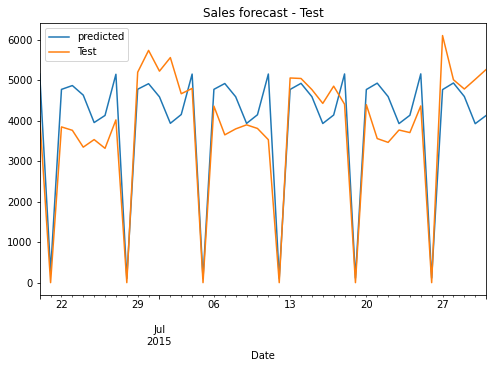

RMSE :  792.73
MAE :  643.1


In [141]:
# model 3

#model building
model_s1_3 = ARIMA(store_1_train_standardized['Sales'],order =(6,0,14))
model_s1_3 = model_s1_3.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s1_3.predict(store_1_test.index.min(),store_1_test.index.max())

prediction = pd.DataFrame(prediction)
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction[0].plot(label="predicted")
store_1_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_1_test['Sales'],prediction[0])

In [142]:
model_s1_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  900
Model:                    ARMA(6, 14)   Log Likelihood                -762.676
Method:                       css-mle   S.D. of innovations              0.557
Date:                Sun, 16 Jan 2022   AIC                           1569.352
Time:                        17:21:22   BIC                           1675.004
Sample:                    01-01-2013   HQIC                          1609.712
                         - 06-19-2015                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0011      0.029     -0.036      0.971      -0.059       0.057
ar.L1.Sales     -0.9997      0.001  -1985.420      0.000      -1.001      -0.999
ar.L2.Sales     -1.0010      0.001  -1213.510      0.000      -1.003      -0.999
ar.L3.Sales     -1.0015      0.001   -969.600      0.000      -1.004      -1.000
ar.L4.Sales     -1.0009      0.001  -1249.045      0.000      -1.002      -0.999
ar.L5.Sales     -0.9996      0.000  -2175.051      0.000      -1.001      -0.999
ar.L6.Sales     -0.9998        nan        nan        nan         nan         nan
ma.L1.Sales      1.1685      0.034     34.030      0.000       1.101       1.236
ma.L2.Sales      1.3526      0.052     25.838      0.000       1.250       1.455
ma.L3.Sales      1.5841      0.071     22.407      0.000       1.446       1.723
ma.L4.Sales      1.6056      0.092     17.500      0.000       1.426       1.785
ma.L5.Sales      1.6304      0.113     14.490      0.000       1.410       1.851
ma.L6.Sales      1.6608      0.131     12.715      0.000       1.405       1.917
ma.L7.Sales      0.6444      0.145      4.441      0.000       0.360       0.929
ma.L8.Sales      0.4243      0.143      2.961      0.003       0.143       0.705
ma.L9.Sales      0.2347      0.129      1.816      0.069      -0.019       0.488
ma.L10.Sales     0.0105      0.112      0.094      0.925      -0.209       0.230
ma.L11.Sales    -0.0252      0.090     -0.281      0.778      -0.201       0.150
ma.L12.Sales    -0.0411      0.066     -0.619      0.536      -0.171       0.089
ma.L13.Sales    -0.0675      0.048     -1.408      0.159      -0.161       0.026
ma.L14.Sales    -0.0408      0.033     -1.247      0.212      -0.105       0.023
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.6232           -0.7821j            1.0000           -0.1429
AR.2             0.6232           +0.7821j            1.0000            0.1429
AR.3            -0.9009           -0.4340j            1.0001           -0.4285
AR.4            -0.9009           +0.4340j            1.0001            0.4285
AR.5            -0.2222           -0.9750j            1.0000           -0.2857
AR.6            -0.2222           +0.9750j            1.0000            0.2857
MA.1             0.6265           -0.7803j            1.0007           -0.1423
MA.2             0.6265           +0.7803j            1.0007            0.1423
MA.3            -0.2191           -0.9769j            1.0012           -0.2851
MA.4            -0.2191           +0.9769j            1.0012            0.2851
MA.5             1.7134           -0.0000j            1.7134           -0.0000
MA.6             0.8364           -1.0952j            1.3781           -0.1462
MA.7             0.8364          

In [143]:
model = "model_s1_3"
model_type = "ARIMA"
model_para = (6,0,14)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_1 = pd.concat([result_store_1,temp_result],axis=0)
result_store_1

store      model      Rmse      Mae model_type  model_para exogenous var
0  store 1  model_s1_1  1688.37  1150.20      ARIMA   (1, 0, 1)          None
0  store 1  model_s1_2   789.82   632.99      ARIMA   (7, 0, 7)          None
0  store 1  model_s1_3   792.73   643.10      ARIMA  (6, 0, 14)          None

In [144]:
# model 4

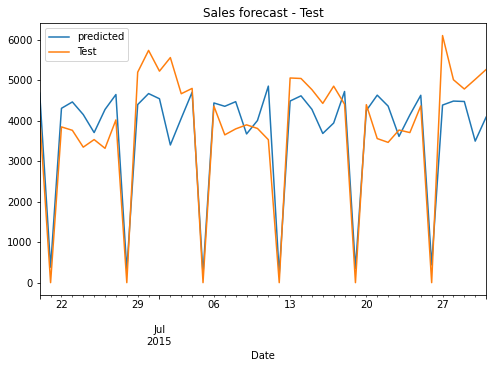

RMSE :  775.48
MAE :  630.7


In [145]:
#model building
model_s1_4 = SARIMAX(store_1_train_standardized['Sales'],order =(6,0,6),seasonal_order =(1,0,1,7))
model_s1_4 = model_s1_4.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s1_4.predict(store_1_test.index.min(),store_1_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_1_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_1_test['Sales'],prediction['Sales'])

In [146]:
model = "model_s1_4"
model_type = "SARIMA"
model_para = (6,0,6),(1,0,1,7)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_1 = pd.concat([result_store_1,temp_result],axis=0)
result_store_1

store      model      Rmse      Mae model_type  \
0  store 1  model_s1_1  1688.37  1150.20      ARIMA   
0  store 1  model_s1_2   789.82   632.99      ARIMA   
0  store 1  model_s1_3   792.73   643.10      ARIMA   
0  store 1  model_s1_4   775.48   630.70     SARIMA   

                  model_para exogenous var  
0                  (1, 0, 1)          None  
0                  (7, 0, 7)          None  
0                 (6, 0, 14)          None  
0  ((6, 0, 6), (1, 0, 1, 7))          None

In [147]:
#varmax

In [148]:
#standardizing the "Sales , Customers"  columns

standarization_column = ['Sales',"Customers"]
store_1_train_standardized,scaler = scaling(store_1_train_no_outliers,standarization_column)


In [149]:
#model 5

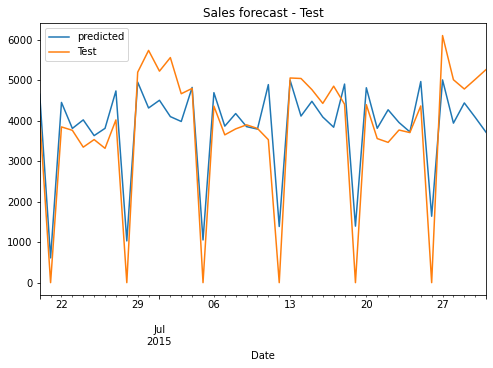

RMSE :  812.47
MAE :  657.35


In [150]:
#model building
model_s1_5 = sm.tsa.VARMAX(store_1_train_standardized[['Sales','Customers']],order =(7,7))
model_s1_5 = model_s1_5.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s1_5.predict(store_1_test.index.min(),store_1_test.index.max())



# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_1_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_1_test['Sales'],prediction['Sales'])

In [151]:
model = "model_s1_5"
model_type = "VARMAX"
model_para = (7,7)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_1 = pd.concat([result_store_1,temp_result],axis=0)
result_store_1.tail()

store      model      Rmse      Mae model_type  \
0  store 1  model_s1_1  1688.37  1150.20      ARIMA   
0  store 1  model_s1_2   789.82   632.99      ARIMA   
0  store 1  model_s1_3   792.73   643.10      ARIMA   
0  store 1  model_s1_4   775.48   630.70     SARIMA   
0  store 1  model_s1_5   812.47   657.35     VARMAX   

                  model_para exogenous var  
0                  (1, 0, 1)          None  
0                  (7, 0, 7)          None  
0                 (6, 0, 14)          None  
0  ((6, 0, 6), (1, 0, 1, 7))          None  
0                     (7, 7)          None

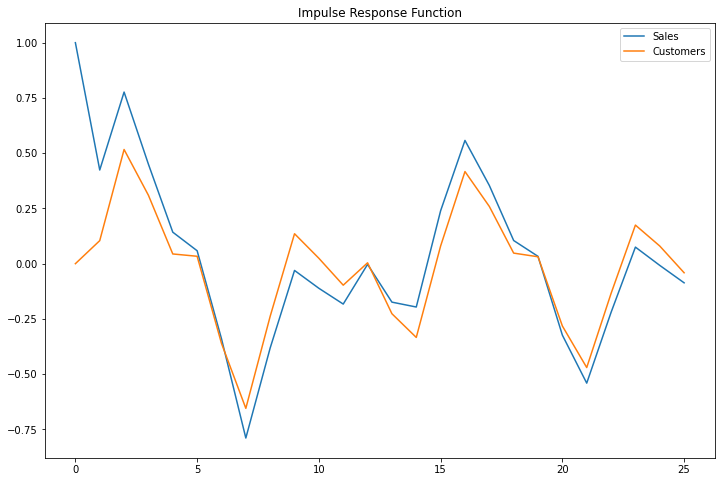

In [152]:
irf = model_s1_5.impulse_responses(steps = 25, orthogonalized= False)
irf.plot()
plt.title("Impulse Response Function")
plt.show()

In [153]:
# model 6

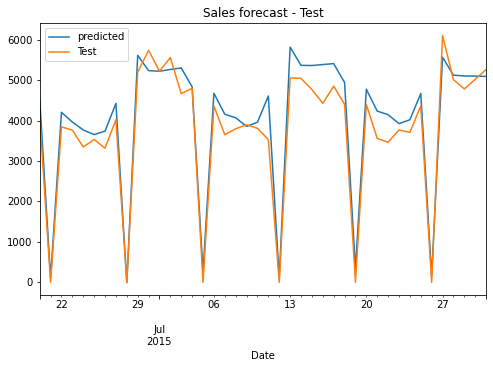

RMSE :  434.64
MAE :  358.36


In [154]:
#assigning exog varialbles
exog = store_1_train[["Open","SchoolHoliday","Promo"]]
test_exog = store_1_test[["Open","SchoolHoliday","Promo"]]

#model building
model_s1_6 = sm.tsa.VARMAX(store_1_train_standardized[['Sales','Customers']],order =(7,0,7),exog=exog)
model_s1_6 = model_s1_6.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s1_6.predict(store_1_test.index.min(),store_1_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_1_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_1_test['Sales'],prediction['Sales'])

In [155]:
model = "model_s1_6"
model_type = "VARMAX"
model_para = (7,0,7)
exog = ["Open","SchoolHoliday","Promo"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_1 = pd.concat([result_store_1,temp_result],axis=0)
result_store_1.tail()

store      model     Rmse     Mae model_type                 model_para  \
0  store 1  model_s1_2  789.82  632.99      ARIMA                  (7, 0, 7)   
0  store 1  model_s1_3  792.73  643.10      ARIMA                 (6, 0, 14)   
0  store 1  model_s1_4  775.48  630.70     SARIMA  ((6, 0, 6), (1, 0, 1, 7))   
0  store 1  model_s1_5  812.47  657.35     VARMAX                     (7, 7)   
0  store 1  model_s1_6  434.64  358.36     VARMAX                  (7, 0, 7)   

                  exogenous var  
0                          None  
0                          None  
0                          None  
0                          None  
0  [Open, SchoolHoliday, Promo]

In [156]:
# model 7

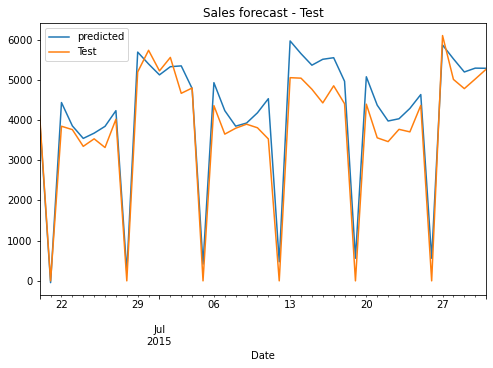

RMSE :  500.0
MAE :  419.8


In [157]:
#assigning exog varialbles
exog = store_1_train[["Open","SchoolHoliday","Promo","DayOfWeek"]]
test_exog = store_1_test[["Open","SchoolHoliday","Promo","DayOfWeek"]]

#model building
model_s1_7 = sm.tsa.VARMAX(store_1_train_standardized[['Sales','Customers']],order =(7,0,7),exog=exog)
model_s1_7 = model_s1_7.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s1_7.predict(store_1_test.index.min(),store_1_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_1_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_1_test['Sales'],prediction['Sales'])

In [158]:
model_s1_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                             
==================================================================================
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                            VARX(7)   Log Likelihood                  76.778
                              + intercept   AIC                            -71.556
Date:                    Sun, 16 Jan 2022   BIC                            125.343
Time:                            17:23:25   HQIC                             3.661
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
===================================================================================
Ljung-Box (L1) (Q):             0.95, 0.45   Jarque-Bera (JB):      480.32, 2346.43
Prob(Q):                        0.33, 0.50   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.17, 1.23   Skew:                      -0.53, 0.63
Prob(H) (two-sided):            0.18, 0.07   Kurtosis:                  6.42, 10.81
                              Results for equation Sales                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             -0.2376      0.105     -2.256      0.024      -0.444      -0.031
L1.Sales               0.1540      0.115      1.338      0.181      -0.072       0.380
L1.Customers          -0.0278      0.111     -0.251      0.802      -0.245       0.190
L2.Sales               0.1127      0.113      0.994      0.320      -0.110       0.335
L2.Customers           0.0587      0.111      0.529      0.597      -0.159       0.276
L3.Sales               0.3376      0.112      3.011      0.003       0.118       0.557
L3.Customers          -0.1428      0.110     -1.293      0.196      -0.359       0.074
L4.Sales              -0.3428      0.099     -3.463      0.001      -0.537      -0.149
L4.Customers           0.4212      0.096      4.384      0.000       0.233       0.610
L5.Sales              -0.3090      0.116     -2.662      0.008      -0.537      -0.081
L5.Customers           0.2591      0.114      2.279      0.023       0.036       0.482
L6.Sales              -0.2347      0.116     -2.015      0.044      -0.463      -0.006
L6.Customers           0.0325      0.113      0.287      0.774      -0.190       0.255
L7.Sales              -0.0295      0.113     -0.260      0.795      -0.252       0.193
L7.Customers           0.2998      0.111      2.689      0.007       0.081       0.518
beta.Open              0.8723      0.065     13.331      0.000       0.744       1.001
beta.SchoolHoliday    -0.0914      0.038     -2.423      0.015      -0.165      -0.017
beta.Promo             0.3927      0.053      7.350      0.000       0.288       0.497
beta.DayOfWeek        -0.1497      0.016     -9.413      0.000      -0.181      -0.119
                            Results for equation Customers                            
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             -0.5004      0.103     -4.858      0.000      -0.702      -0.299
L1.Sales              -0.0067      0.101     -0.067      0.947      -0.204       0.190
L1.Customers           0.1459      0.095      1.528      0.127      -0.041       0.333
L2.Sales               0.0855      0.096      0.886      0.375      -0.104       0.275
L2.Cu

In [159]:
model = "model_s1_7"
model_type = "VARMAX"
model_para = (7,0,7)
exog = ["Open","SchoolHoliday","Promo","DayOfWeek"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_1 = pd.concat([result_store_1,temp_result],axis=0)
result_store_1.tail()

store      model     Rmse     Mae model_type                 model_para  \
0  store 1  model_s1_3  792.73  643.10      ARIMA                 (6, 0, 14)   
0  store 1  model_s1_4  775.48  630.70     SARIMA  ((6, 0, 6), (1, 0, 1, 7))   
0  store 1  model_s1_5  812.47  657.35     VARMAX                     (7, 7)   
0  store 1  model_s1_6  434.64  358.36     VARMAX                  (7, 0, 7)   
0  store 1  model_s1_7  500.00  419.80     VARMAX                  (7, 0, 7)   

                             exogenous var  
0                                     None  
0                                     None  
0                                     None  
0             [Open, SchoolHoliday, Promo]  
0  [Open, SchoolHoliday, Promo, DayOfWeek]

In [160]:
# model 8:


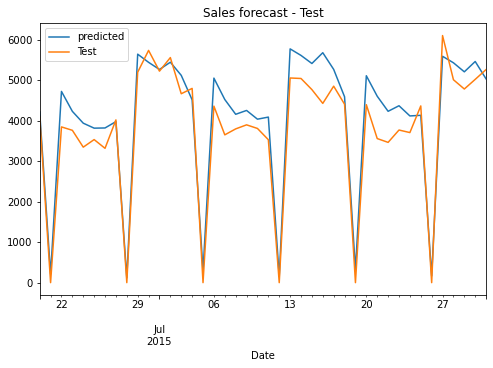

RMSE :  514.04
MAE :  438.63


In [161]:
#assigning exog varialbles
exog = store_1_train[["Open","SchoolHoliday","Promo","DayOfWeek"]]
test_exog = store_1_test[["Open","SchoolHoliday","Promo","DayOfWeek"]]

#model building
model_s1_8 = sm.tsa.VARMAX(store_1_train_standardized[['Sales','Customers']],order =(7,14),trend="n",exog=exog)
model_s1_8 = model_s1_8.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s1_8.predict(store_1_test.index.min(),store_1_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_1_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_1_test['Sales'],prediction['Sales'])

In [162]:
model_s1_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                             
==================================================================================
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                       VARMAX(7,14)   Log Likelihood                 -36.534
Date:                    Sun, 16 Jan 2022   AIC                            263.068
Time:                            17:26:51   BIC                            719.295
Sample:                        01-01-2013   HQIC                           437.350
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
===================================================================================
Ljung-Box (L1) (Q):             0.46, 0.58   Jarque-Bera (JB):       534.94, 780.03
Prob(Q):                        0.50, 0.45   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.13, 1.39   Skew:                      -0.58, 0.19
Prob(H) (two-sided):            0.29, 0.00   Kurtosis:                   6.60, 7.54
                              Results for equation Sales                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
L1.Sales               0.1813      0.556      0.326      0.744      -0.908       1.271
L1.Customers          -0.1350      0.520     -0.259      0.795      -1.155       0.885
L2.Sales               0.3463      0.651      0.532      0.595      -0.930       1.622
L2.Customers          -0.2643      0.631     -0.419      0.675      -1.501       0.972
L3.Sales               0.4901      0.507      0.966      0.334      -0.504       1.485
L3.Customers          -0.3724      0.493     -0.756      0.450      -1.338       0.593
L4.Sales              -0.0983      0.545     -0.180      0.857      -1.166       0.970
L4.Customers           0.1193      0.531      0.225      0.822      -0.921       1.159
L5.Sales              -0.1350      0.553     -0.244      0.807      -1.219       0.949
L5.Customers           0.0976      0.531      0.184      0.854      -0.944       1.139
L6.Sales              -0.3935      0.569     -0.691      0.489      -1.509       0.722
L6.Customers           0.2488      0.537      0.463      0.643      -0.804       1.302
L7.Sales              -0.5507      0.490     -1.125      0.261      -1.511       0.409
L7.Customers           0.8819      0.484      1.823      0.068      -0.066       1.830
L1.e(Sales)                 0      0.595          0      1.000      -1.167       1.167
L1.e(Customers)             0      0.571          0      1.000      -1.118       1.118
L2.e(Sales)                 0      0.619          0      1.000      -1.212       1.212
L2.e(Customers)             0      0.600          0      1.000      -1.176       1.176
L3.e(Sales)                 0      0.479          0      1.000      -0.939       0.939
L3.e(Customers)            -0      0.466         -0      1.000      -0.914       0.914
L4.e(Sales)                -0      0.525         -0      1.000      -1.029       1.029
L4.e(Customers)             0      0.504          0      1.000      -0.988       0.988
L5.e(Sales)                 0      0.536          0      1.000      -1.050       1.050
L5.e(Customers)             0      0.505          0      1.000      -0.990       0.990
L6.e(Sales)                 0      0.535          0      1.000      -1.049       1.049
L6.e(Customers)             0      0.510          0      1.000      -1.000       1.000
L7.e(Sales)                 0      0.398          0      1.000      -0.780       0.780
L7.e(Customers)            -0      0.391         -0      1.000      -0.766       0.766
L

In [163]:
model = "model_s1_8"
model_type = "VARMAX"
model_para = (7,14)
exog = ["Open","SchoolHoliday","Promo","DayOfWeek"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_1 = pd.concat([result_store_1,temp_result],axis=0)
result_store_1.tail()

store      model     Rmse     Mae model_type                 model_para  \
0  store 1  model_s1_4  775.48  630.70     SARIMA  ((6, 0, 6), (1, 0, 1, 7))   
0  store 1  model_s1_5  812.47  657.35     VARMAX                     (7, 7)   
0  store 1  model_s1_6  434.64  358.36     VARMAX                  (7, 0, 7)   
0  store 1  model_s1_7  500.00  419.80     VARMAX                  (7, 0, 7)   
0  store 1  model_s1_8  514.04  438.63     VARMAX                    (7, 14)   

                             exogenous var  
0                                     None  
0                                     None  
0             [Open, SchoolHoliday, Promo]  
0  [Open, SchoolHoliday, Promo, DayOfWeek]  
0  [Open, SchoolHoliday, Promo, DayOfWeek]

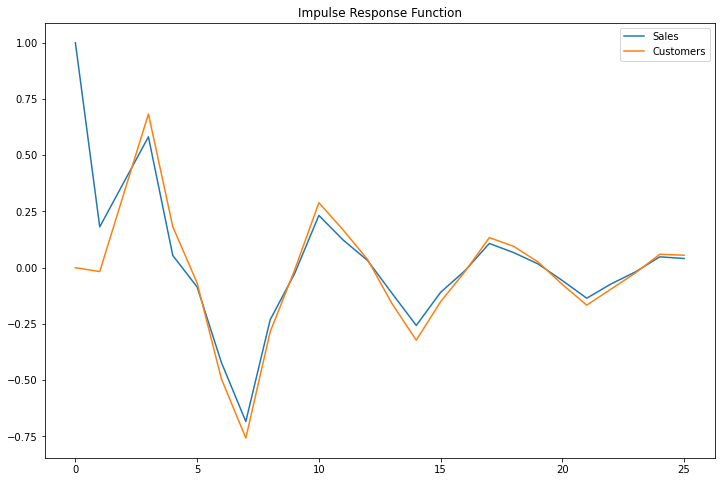

In [164]:
irf = model_s1_8.impulse_responses(steps = 25, orthogonalized= False)
irf.plot()
plt.title("Impulse Response Function")
plt.show()

### Store 3 : Forecasting sales

In [165]:
store = "store 3"
store_3_train = store_3[:train_len]
store_3_test = store_3[train_len:]

print("Train data shape : ",store_3_train.shape)
print("test data shape : ",store_3_test.shape)

Train data shape :  (900, 8)
test data shape :  (42, 8)


<Figure size 1440x288 with 0 Axes>

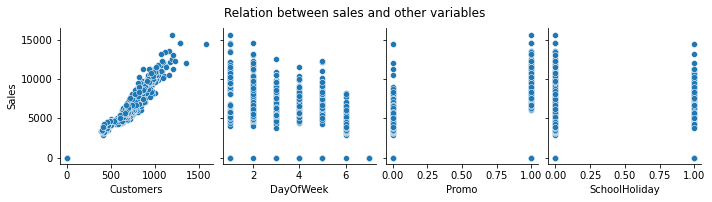

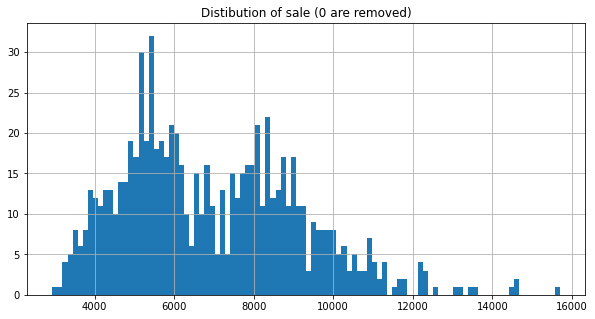

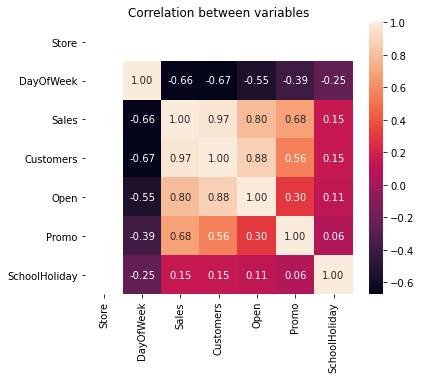

In [166]:
#visualization

visualisation(store_3)

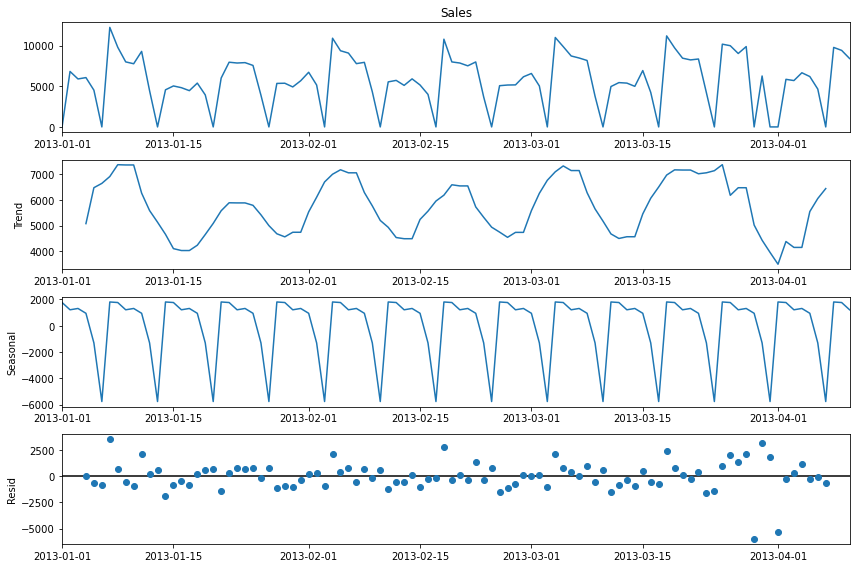

In [167]:
rcParams['figure.figsize']  =12,8
decomposition = sm.tsa.seasonal_decompose(store_3['Sales'][:100],model = 'additive')
fig = decomposition.plot()
plt.show()

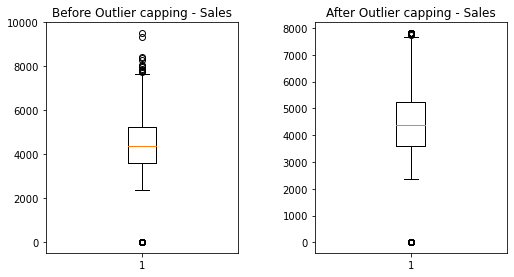

In [168]:
# outliers
store_3_train_no_outliers = store_3_train.copy()
store_3_train_no_outliers['Sales'] = outliers_treatment(store_3_train_no_outliers['Sales'],0,0.99)


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.boxplot(store_1_train['Sales'])
plt.title("Before Outlier capping - Sales")


plt.subplot(1,2,2)
plt.boxplot(store_1_train_no_outliers['Sales'])
plt.title("After Outlier capping - Sales")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 

plt.show()

In [169]:
# Johansen test to check wheather both series are cointegerated (Thogh we already know both the series are stationary from ADF test)
johnasen_test(store_3[["Sales","Customers"]])

Rank :  2
Both Series are stationary
No cointgeration


**** PACF ****
pacf value :  28
total pacf value that crossed interval :  16


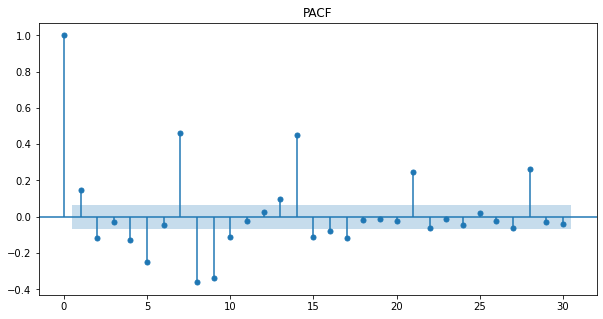



**** ACF ****
pacf value :  30
total pacf value that crossed interval :  21


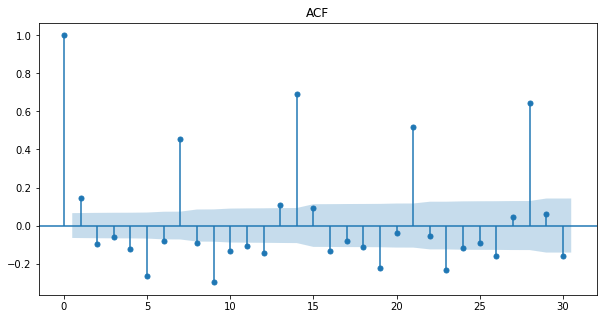

In [170]:
pacf_acf_val(store_3_train['Sales'],30)

In [171]:
# ARIMA MODEL

In [172]:
#standardizing the SALES columns

standarization_column = ['Sales']
store_3_train_standardized,scaler = scaling(store_3_train_no_outliers,standarization_column)

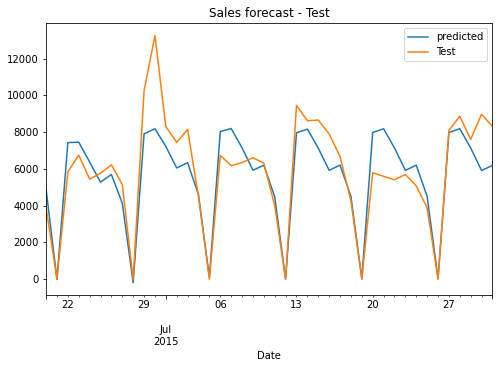

RMSE :  1471.19
MAE :  1069.74


In [173]:
#model building
model_s3_1 = ARIMA(store_3_train_standardized['Sales'],order =(9,0,7))
model_s3_1 = model_s3_1.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s3_1.predict(store_3_test.index.min(),store_3_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']

# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_3_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_3_test['Sales'],prediction['Sales'])

In [174]:
model_s3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  900
Model:                     ARMA(9, 7)   Log Likelihood                -785.102
Method:                       css-mle   S.D. of innovations              0.570
Date:                Sun, 16 Jan 2022   AIC                           1606.204
Time:                        17:28:57   BIC                           1692.647
Sample:                    01-01-2013   HQIC                          1639.226
                         - 06-19-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0026      0.017     -0.155      0.877      -0.036       0.031
ar.L1.Sales     0.0904      0.029      3.111      0.002       0.033       0.147
ar.L2.Sales     0.0854      0.015      5.865      0.000       0.057       0.114
ar.L3.Sales    -0.1955      0.001   -239.600      0.000      -0.197      -0.194
ar.L4.Sales    -0.1945      0.001   -248.371      0.000      -0.196      -0.193
ar.L5.Sales    -0.1943      0.001   -299.741      0.000      -0.196      -0.193
ar.L6.Sales    -0.1954      0.001   -227.951      0.000      -0.197      -0.194
ar.L7.Sales     0.8044      0.000   2390.683      0.000       0.804       0.805
ar.L8.Sales    -0.2853      0.029     -9.895      0.000      -0.342      -0.229
ar.L9.Sales    -0.2813      0.016    -17.870      0.000      -0.312      -0.250
ma.L1.Sales     0.1615      0.020      8.084      0.000       0.122       0.201
ma.L2.Sales     0.1533      0.019      8.141      0.000       0.116       0.190
ma.L3.Sales     0.1877      0.019     10.123      0.000       0.151       0.224
ma.L4.Sales     0.1699      0.019      8.719      0.000       0.132       0.208
ma.L5.Sales     0.1730      0.018      9.750      0.000       0.138       0.208
ma.L6.Sales     0.1813      0.020      8.942      0.000       0.142       0.221
ma.L7.Sales    -0.8127      0.018    -45.047      0.000      -0.848      -0.777
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6233           -0.7820j            1.0000           -0.1429
AR.2            0.6233           +0.7820j            1.0000            0.1429
AR.3            1.1583           -0.4279j            1.2348           -0.0563
AR.4            1.1583           +0.4279j            1.2348            0.0563
AR.5           -0.2223           -0.9750j            1.0001           -0.2857
AR.6           -0.2223           +0.9750j            1.0001            0.2857
AR.7           -0.9010           -0.4340j            1.0001           -0.4286
AR.8           -0.9010           +0.4340j            1.0001            0.4286
AR.9           -2.3307           -0.0000j            2.3307           -0.5000
MA.1           -0.9030           -0.4307j            1.0005           -0.4292
MA.2           -0.9030           +0.4307j            1.0005            0.4292
MA.3           -0.2196           -0.9817j            1.0060           -0.2850
MA.4           -0.2196           +0.9817j            1.0060            0.2850
MA.5            0.6269           -0.7793j            1.0002           -0.1422
MA.6            0.6269           +0.7793j            1.0002            0.1422
MA.7            1.2145           -0.0000j            1.2145           -0.0000
-----------------------------------------------------------------------------
"""

In [175]:
result_store_3 = pd.DataFrame()

In [176]:
model = "model_s3_1"
model_type = "ARIMA"
model_para = (9,0,7)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_3 = pd.concat([result_store_3,temp_result],axis=0)
result_store_3

store      model      Rmse      Mae model_type model_para exogenous var
0  store 3  model_s3_1  1471.19  1069.74      ARIMA  (9, 0, 7)          None

In [177]:
#model 2

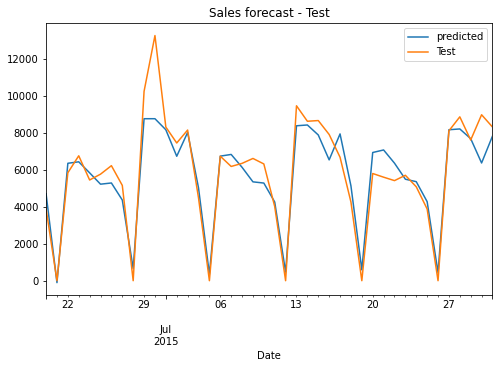

RMSE :  1079.46
MAE :  755.41


In [178]:
#model building
model_s3_2 = SARIMAX(store_3_train_standardized['Sales'],order =(7,0,7),seasonal_order =(1,0,1,14))
model_s3_2 = model_s3_2.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s3_2.predict(store_3_test.index.min(),store_3_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_3_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_3_test['Sales'],prediction['Sales'])


In [179]:
model = "model_s3_2"
model_type = "SARIMA"
model_para = (7,0,7),(1,0,1,14)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_3 = pd.concat([result_store_3,temp_result],axis=0)
result_store_3

store      model      Rmse      Mae model_type  \
0  store 3  model_s3_1  1471.19  1069.74      ARIMA   
0  store 3  model_s3_2  1079.46   755.41     SARIMA   

                   model_para exogenous var  
0                   (9, 0, 7)          None  
0  ((7, 0, 7), (1, 0, 1, 14))          None

In [180]:
#varmax

In [181]:
#standardizing the "Sales , Customers"  columns

standarization_column = ['Sales',"Customers"]
store_3_train_standardized,scaler = scaling(store_3_train_no_outliers,standarization_column)

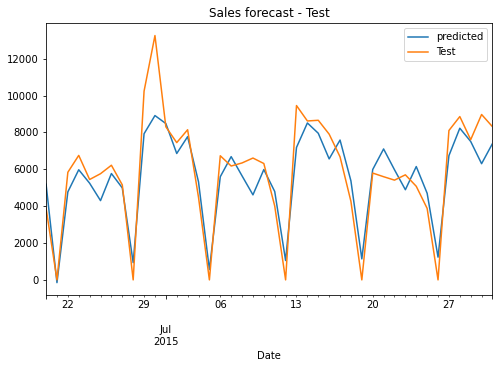

RMSE :  1272.76
MAE :  992.32


In [182]:
#model building
model_s3_3 = sm.tsa.VARMAX(store_3_train_standardized[['Sales','Customers']],order =(11,9))
model_s3_3 = model_s3_3.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s3_3.predict(store_3_test.index.min(),store_3_test.index.max())



# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_3_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_3_test['Sales'],prediction['Sales'])

In [183]:
model_s3_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                             
==================================================================================
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMA(11,9)   Log Likelihood                -269.574
                              + intercept   AIC                            709.148
Date:                    Sun, 16 Jan 2022   BIC                           1117.352
Time:                            17:30:40   HQIC                           865.085
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
===================================================================================
Ljung-Box (L1) (Q):             1.15, 0.00   Jarque-Bera (JB):      1261.59, 345.94
Prob(Q):                        0.28, 0.98   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.22, 1.24   Skew:                     -1.17, -0.39
Prob(H) (two-sided):            0.08, 0.06   Kurtosis:                   8.31, 5.94
                             Results for equation Sales                            
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -0.0060      0.052     -0.116      0.908      -0.108       0.096
L1.Sales            0.9887      5.943      0.166      0.868     -10.659      12.637
L1.Customers       -0.8981      5.478     -0.164      0.870     -11.636       9.839
L2.Sales            0.3312      4.923      0.067      0.946      -9.317       9.980
L2.Customers       -0.3179      4.113     -0.077      0.938      -8.379       7.743
L3.Sales           -0.1058      3.711     -0.029      0.977      -7.379       7.167
L3.Customers        0.0244      4.456      0.005      0.996      -8.708       8.757
L4.Sales           -0.1313      3.426     -0.038      0.969      -6.846       6.583
L4.Customers        0.0368      4.195      0.009      0.993      -8.186       8.259
L5.Sales           -0.1709      1.569     -0.109      0.913      -3.247       2.905
L5.Customers       -0.0144      2.080     -0.007      0.994      -4.092       4.063
L6.Sales           -0.4355      1.918     -0.227      0.820      -4.194       3.323
L6.Customers        0.3295      2.067      0.159      0.873      -3.722       4.381
L7.Sales           -0.8761      2.404     -0.364      0.716      -5.588       3.836
L7.Customers        1.5188      1.910      0.795      0.426      -2.224       5.261
L8.Sales            0.4159      4.743      0.088      0.930      -8.881       9.712
L8.Customers       -0.5960      6.223     -0.096      0.924     -12.794      11.602
L9.Sales           -0.3836      4.642     -0.083      0.934      -9.482       8.715
L9.Customers        0.2408      5.748      0.042      0.967     -11.024      11.506
L10.Sales           0.2109      1.814      0.116      0.907      -3.344       3.766
L10.Customers      -0.2421      1.678     -0.144      0.885      -3.532       3.047
L11.Sales          -0.2025      1.267     -0.160      0.873      -2.685       2.280
L11.Customers       0.2000      1.248      0.160      0.873      -2.246       2.646
L1.e(Sales)        -0.1507      5.954     -0.025      0.980     -11.820      11.518
L1.e(Customers)     0.1211      5.493      0.022      0.982     -10.646      10.888
L2.e(Sales)         0.0820      4.773      0.017      0.986      -9.274       9.438
L2.e(Customers)     0.0054      3.399      0.002      0.999      -6.657       6.668
L3.e(Sales)         0.0272      3.045      0.009      0.993      -5.941       5.995
L3.e(Customers

In [184]:
model = "model_s3_3"
model_type = "VARMAX"
model_para = (7,9)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_3 = pd.concat([result_store_3,temp_result],axis=0)
result_store_3

store      model      Rmse      Mae model_type  \
0  store 3  model_s3_1  1471.19  1069.74      ARIMA   
0  store 3  model_s3_2  1079.46   755.41     SARIMA   
0  store 3  model_s3_3  1272.76   992.32     VARMAX   

                   model_para exogenous var  
0                   (9, 0, 7)          None  
0  ((7, 0, 7), (1, 0, 1, 14))          None  
0                      (7, 9)          None

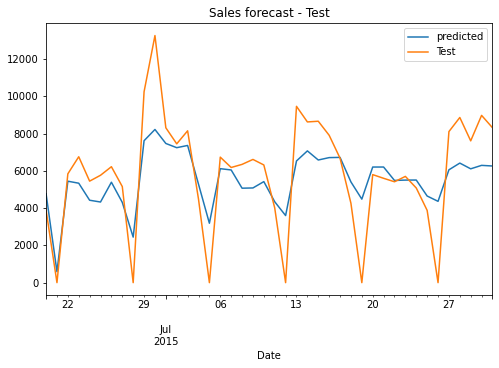

RMSE :  1945.41
MAE :  1494.27


In [185]:
#model building
model_s3_4 = sm.tsa.VARMAX(store_3_train_standardized[['Sales','Customers']],order =(7,14))
model_s3_4 = model_s3_4.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s3_4.predict(store_3_test.index.min(),store_3_test.index.max())



# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_3_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_3_test['Sales'],prediction['Sales'])

In [186]:
model_s3_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                             
==================================================================================
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMA(7,14)   Log Likelihood                -441.727
                              + intercept   AIC                           1061.453
Date:                    Sun, 16 Jan 2022   BIC                           1488.867
Time:                            17:32:12   HQIC                          1224.728
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
===================================================================================
Ljung-Box (L1) (Q):             1.02, 0.56   Jarque-Bera (JB):       419.57, 296.20
Prob(Q):                        0.31, 0.45   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.09, 1.23   Skew:                     -0.30, -0.18
Prob(H) (two-sided):            0.45, 0.08   Kurtosis:                   6.29, 5.79
                             Results for equation Sales                             
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -0.0033      0.033     -0.098      0.922      -0.069       0.062
L1.Sales             1.0128      6.405      0.158      0.874     -11.540      13.566
L1.Customers        -1.0903      5.720     -0.191      0.849     -12.302      10.122
L2.Sales             0.6470      4.796      0.135      0.893      -8.753      10.047
L2.Customers        -0.7071      4.415     -0.160      0.873      -9.361       7.947
L3.Sales             0.0868      5.324      0.016      0.987     -10.349      10.522
L3.Customers        -0.1436      4.903     -0.029      0.977      -9.753       9.466
L4.Sales             0.0198      5.257      0.004      0.997     -10.284      10.324
L4.Customers        -0.0707      4.911     -0.014      0.989      -9.696       9.555
L5.Sales            -0.1694      4.719     -0.036      0.971      -9.418       9.079
L5.Customers         0.0631      4.408      0.014      0.989      -8.576       8.702
L6.Sales            -0.5682      4.785     -0.119      0.905      -9.946       8.810
L6.Customers         0.5201      4.437      0.117      0.907      -8.177       9.217
L7.Sales            -0.8714      3.731     -0.234      0.815      -8.185       6.442
L7.Customers         1.3701      3.441      0.398      0.691      -5.374       8.114
L1.e(Sales)               0      6.409          0      1.000     -12.562      12.562
L1.e(Customers)          -0      5.720         -0      1.000     -11.211      11.211
L2.e(Sales)               0      4.979          0      1.000      -9.758       9.758
L2.e(Customers)           0      4.472          0      1.000      -8.765       8.765
L3.e(Sales)               0      4.620          0      1.000      -9.055       9.055
L3.e(Customers)          -0      4.154         -0      1.000      -8.142       8.142
L4.e(Sales)               0      4.175          0      1.000      -8.183       8.183
L4.e(Customers)          -0      3.762         -0      1.000      -7.374       7.374
L5.e(Sales)               0      3.859          0      1.000      -7.563       7.563
L5.e(Customers)          -0      3.460         -0      1.000      -6.782       6.782
L6.e(Sales)               0      2.937          0      1.000      -5.756       5.756
L6.e(Customers)           0      2.602          0      1.000      -5.099       5.099
L7.e(Sales)               0      2.407          0      1.000      -

In [187]:
model = "model_s3_4"
model_type = "VARMAX"
model_para = (7,14)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_3 = pd.concat([result_store_3,temp_result],axis=0)
result_store_3

store      model      Rmse      Mae model_type  \
0  store 3  model_s3_1  1471.19  1069.74      ARIMA   
0  store 3  model_s3_2  1079.46   755.41     SARIMA   
0  store 3  model_s3_3  1272.76   992.32     VARMAX   
0  store 3  model_s3_4  1945.41  1494.27     VARMAX   

                   model_para exogenous var  
0                   (9, 0, 7)          None  
0  ((7, 0, 7), (1, 0, 1, 14))          None  
0                      (7, 9)          None  
0                     (7, 14)          None

In [188]:
#varmax

In [189]:
#model 5

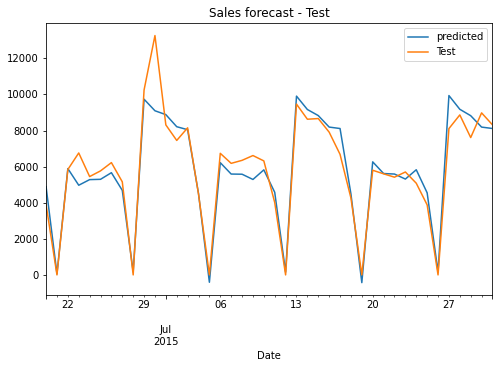

RMSE :  940.49
MAE :  623.09


In [190]:
#assigning exog varialbles
exog = store_3_train[["Open","SchoolHoliday","Promo"]]
test_exog = store_3_test[["Open","SchoolHoliday","Promo"]]

#model building
model_s3_5 = sm.tsa.VARMAX(store_3_train_standardized[['Sales','Customers']],order =(7,7),exog=exog)
model_s3_5 = model_s3_5.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s3_5.predict(store_3_test.index.min(),store_3_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_3_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_3_test['Sales'],prediction['Sales'])

In [191]:
model_s3_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                             
==================================================================================
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(7,7)   Log Likelihood                 371.869
                              + intercept   AIC                           -609.738
Date:                    Sun, 16 Jan 2022   BIC                           -287.978
Time:                            17:33:21   HQIC                          -486.823
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
===================================================================================
Ljung-Box (L1) (Q):             1.55, 0.07   Jarque-Bera (JB):       767.31, 855.61
Prob(Q):                        0.21, 0.79   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.20, 1.08   Skew:                      -0.24, 0.21
Prob(H) (two-sided):            0.12, 0.53   Kurtosis:                   7.50, 7.76
                              Results for equation Sales                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             -1.1501      0.049    -23.464      0.000      -1.246      -1.054
L1.Sales               0.4051      0.187      2.161      0.031       0.038       0.773
L1.Customers          -0.5184      0.173     -3.000      0.003      -0.857      -0.180
L2.Sales               0.2531      0.194      1.307      0.191      -0.126       0.633
L2.Customers          -0.2931      0.187     -1.566      0.117      -0.660       0.074
L3.Sales              -0.2135      0.166     -1.289      0.197      -0.538       0.111
L3.Customers           0.1573      0.163      0.963      0.335      -0.163       0.477
L4.Sales              -0.2886      0.166     -1.741      0.082      -0.613       0.036
L4.Customers           0.2543      0.161      1.579      0.114      -0.061       0.570
L5.Sales               0.2522      0.186      1.354      0.176      -0.113       0.617
L5.Customers          -0.2858      0.175     -1.637      0.102      -0.628       0.056
L6.Sales              -0.1285      0.181     -0.709      0.478      -0.484       0.227
L6.Customers           0.1207      0.167      0.723      0.469      -0.206       0.448
L7.Sales              -0.2986      0.153     -1.957      0.050      -0.597       0.000
L7.Customers           0.5667      0.150      3.768      0.000       0.272       0.861
L1.e(Sales)           -0.0477      0.189     -0.252      0.801      -0.419       0.323
L1.e(Customers)        0.1393      0.190      0.732      0.464      -0.234       0.512
L2.e(Sales)           -0.0154      0.182     -0.084      0.933      -0.373       0.342
L2.e(Customers)        0.2047      0.183      1.117      0.264      -0.155       0.564
L3.e(Sales)            0.3001      0.158      1.897      0.058      -0.010       0.610
L3.e(Customers)       -0.1352      0.169     -0.802      0.422      -0.466       0.195
L4.e(Sales)            0.2272      0.167      1.365      0.172      -0.099       0.554
L4.e(Customers)       -0.1648      0.175     -0.944      0.345      -0.507       0.177
L5.e(Sales)            0.1519      0.185      0.821      0.411      -0.211       0.514
L5.e(Customers)       -0.0033      0.183     -0.018      0.986      -0.361       0.355
L6.e(Sales)            0.0454      0.182      0.250      0.802      -0.310       0.401
L6.e(Customers)        0.1347      0.181      0.745      0.456      -0.220       0.489
L7.e(

In [192]:
model = "model_s3_5"
model_type = "VARMAX"
model_para = (7,7)
exog = ["Open","SchoolHoliday","Promo"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_3 = pd.concat([result_store_3,temp_result],axis=0)
result_store_3

store      model      Rmse      Mae model_type  \
0  store 3  model_s3_1  1471.19  1069.74      ARIMA   
0  store 3  model_s3_2  1079.46   755.41     SARIMA   
0  store 3  model_s3_3  1272.76   992.32     VARMAX   
0  store 3  model_s3_4  1945.41  1494.27     VARMAX   
0  store 3  model_s3_5   940.49   623.09     VARMAX   

                   model_para                 exogenous var  
0                   (9, 0, 7)                          None  
0  ((7, 0, 7), (1, 0, 1, 14))                          None  
0                      (7, 9)                          None  
0                     (7, 14)                          None  
0                      (7, 7)  [Open, SchoolHoliday, Promo]

In [193]:
#model 6

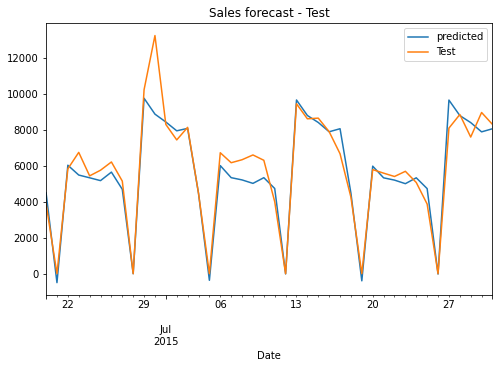

RMSE :  943.46
MAE :  596.26


In [194]:
#assigning exog varialbles
exog = store_3_train[["Open","SchoolHoliday","Promo"]]
test_exog = store_3_test[["Open","SchoolHoliday","Promo"]]

#model building
model_s3_6 = sm.tsa.VARMAX(store_3_train_standardized[['Sales','Customers']],order =(7,14),exog=exog)
model_s3_6 = model_s3_6.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s3_6.predict(store_3_test.index.min(),store_3_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_3_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_3_test['Sales'],prediction['Sales'])

In [195]:
model_s3_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                             
==================================================================================
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                       VARMAX(7,14)   Log Likelihood                 368.868
                              + intercept   AIC                           -547.736
Date:                    Sun, 16 Jan 2022   BIC                            -91.509
Time:                            17:37:28   HQIC                          -373.454
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
===================================================================================
Ljung-Box (L1) (Q):            54.14, 0.34   Jarque-Bera (JB):       714.80, 842.39
Prob(Q):                        0.00, 0.56   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.28, 1.12   Skew:                       0.76, 0.19
Prob(H) (two-sided):            0.03, 0.31   Kurtosis:                   7.09, 7.72
                              Results for equation Sales                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             -1.7291      0.056    -30.658      0.000      -1.840      -1.619
L1.Sales               0.2982      0.216      1.382      0.167      -0.125       0.721
L1.Customers          -0.3704      0.199     -1.862      0.063      -0.760       0.020
L2.Sales              -0.0336      0.249     -0.135      0.892      -0.521       0.454
L2.Customers           0.0300      0.237      0.127      0.899      -0.434       0.494
L3.Sales              -0.3605      0.212     -1.704      0.088      -0.775       0.054
L3.Customers           0.3436      0.203      1.692      0.091      -0.054       0.742
L4.Sales              -0.2023      0.223     -0.907      0.365      -0.640       0.235
L4.Customers           0.2376      0.211      1.128      0.260      -0.175       0.651
L5.Sales               0.2109      0.224      0.942      0.346      -0.228       0.650
L5.Customers          -0.1958      0.209     -0.935      0.350      -0.606       0.215
L6.Sales              -0.1580      0.232     -0.681      0.496      -0.613       0.297
L6.Customers           0.2736      0.214      1.276      0.202      -0.147       0.694
L7.Sales              -0.1976      0.195     -1.013      0.311      -0.580       0.185
L7.Customers           0.2739      0.190      1.445      0.149      -0.098       0.645
L1.e(Sales)                 0      0.249          0      1.000      -0.488       0.488
L1.e(Customers)             0      0.244          0      1.000      -0.479       0.479
L2.e(Sales)                -0      0.257         -0      1.000      -0.503       0.503
L2.e(Customers)             0      0.243          0      1.000      -0.477       0.477
L3.e(Sales)                 0      0.227          0      1.000      -0.444       0.444
L3.e(Customers)            -0      0.218         -0      1.000      -0.427       0.427
L4.e(Sales)                 0      0.234          0      1.000      -0.458       0.458
L4.e(Customers)            -0      0.225         -0      1.000      -0.442       0.442
L5.e(Sales)                 0      0.249          0      1.000      -0.488       0.488
L5.e(Customers)            -0      0.237         -0      1.000      -0.465       0.465
L6.e(Sales)                 0      0.232          0      1.000      -0.454       0.454
L6.e(Customers)            -0      0.208         -0      1.000      -0.408       0.408
L7.e(

In [196]:
model = "model_s3_6"
model_type = "VARMAX"
model_para = (7,14)
exog = ["Open","SchoolHoliday","Promo"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_3 = pd.concat([result_store_3,temp_result],axis=0)
result_store_3

store      model      Rmse      Mae model_type  \
0  store 3  model_s3_1  1471.19  1069.74      ARIMA   
0  store 3  model_s3_2  1079.46   755.41     SARIMA   
0  store 3  model_s3_3  1272.76   992.32     VARMAX   
0  store 3  model_s3_4  1945.41  1494.27     VARMAX   
0  store 3  model_s3_5   940.49   623.09     VARMAX   
0  store 3  model_s3_6   943.46   596.26     VARMAX   

                   model_para                 exogenous var  
0                   (9, 0, 7)                          None  
0  ((7, 0, 7), (1, 0, 1, 14))                          None  
0                      (7, 9)                          None  
0                     (7, 14)                          None  
0                      (7, 7)  [Open, SchoolHoliday, Promo]  
0                     (7, 14)  [Open, SchoolHoliday, Promo]

In [197]:
#model 7

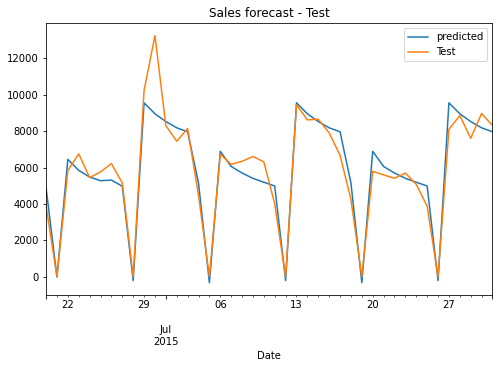

RMSE :  938.92
MAE :  629.32


In [198]:
#assigning exog varialbles
exog = store_3_train[["Open","SchoolHoliday","Promo","DayOfWeek"]]
test_exog = store_3_test[["Open","SchoolHoliday","Promo","DayOfWeek"]]

#model building
model_s3_7 = sm.tsa.VARMAX(store_3_train_standardized[['Sales','Customers']],order =(2,7),exog=exog)
model_s3_7 = model_s3_7.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s3_7.predict(store_3_test.index.min(),store_3_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_3_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_3_test['Sales'],prediction['Sales'])

In [199]:
model_s3_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                             
==================================================================================
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(2,7)   Log Likelihood                 335.495
                              + intercept   AIC                           -572.990
Date:                    Sun, 16 Jan 2022   BIC                           -337.673
Time:                            17:38:02   HQIC                          -483.098
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
===================================================================================
Ljung-Box (L1) (Q):             0.03, 0.03   Jarque-Bera (JB):       198.55, 475.55
Prob(Q):                        0.86, 0.86   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.05, 1.15   Skew:                       0.10, 0.05
Prob(H) (two-sided):            0.70, 0.22   Kurtosis:                   5.29, 6.56
                              Results for equation Sales                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             -1.1802      0.070    -16.846      0.000      -1.318      -1.043
L1.Sales               0.2802      0.136      2.067      0.039       0.014       0.546
L1.Customers          -0.3170      0.122     -2.595      0.009      -0.556      -0.078
L2.Sales              -0.0747      0.123     -0.606      0.545      -0.316       0.167
L2.Customers           0.0660      0.127      0.521      0.602      -0.182       0.314
L1.e(Sales)            0.1245      0.155      0.804      0.421      -0.179       0.428
L1.e(Customers)       -0.0426      0.144     -0.295      0.768      -0.326       0.241
L2.e(Sales)            0.1677      0.135      1.245      0.213      -0.096       0.432
L2.e(Customers)       -0.0271      0.135     -0.200      0.841      -0.292       0.238
L3.e(Sales)           -0.0255      0.082     -0.310      0.757      -0.187       0.136
L3.e(Customers)        0.1558      0.081      1.925      0.054      -0.003       0.314
L4.e(Sales)            0.1036      0.090      1.156      0.248      -0.072       0.279
L4.e(Customers)        0.0264      0.085      0.312      0.755      -0.139       0.192
L5.e(Sales)            0.2049      0.095      2.148      0.032       0.018       0.392
L5.e(Customers)        0.0173      0.091      0.189      0.850      -0.161       0.196
L6.e(Sales)            0.1644      0.093      1.768      0.077      -0.018       0.347
L6.e(Customers)       -0.1165      0.091     -1.280      0.201      -0.295       0.062
L7.e(Sales)           -0.4710      0.088     -5.326      0.000      -0.644      -0.298
L7.e(Customers)        0.5915      0.087      6.834      0.000       0.422       0.761
beta.Open              1.5159      0.040     38.342      0.000       1.438       1.593
beta.SchoolHoliday    -0.0051      0.038     -0.136      0.892      -0.079       0.069
beta.Promo             0.7994      0.040     19.840      0.000       0.720       0.878
beta.DayOfWeek        -0.0876      0.011     -7.736      0.000      -0.110      -0.065
                            Results for equation Customers                            
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
inter

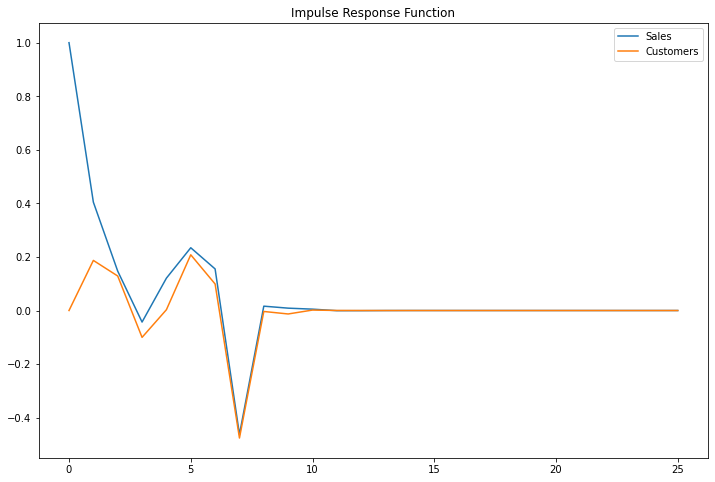

In [200]:
irf = model_s3_7.impulse_responses(steps = 25, orthogonalized= False)
irf.plot()
plt.title("Impulse Response Function")
plt.show()

### Store 8 : Forecasting sales

In [201]:
store_8.shape

(942, 8)

In [202]:
#spliting the data into train and test
store = "store 8"
store_8_train = store_8[:train_len]
store_8_test = store_8[train_len:]

print("Train data shape : ",store_8_train.shape)
print("test data shape : ",store_8_test.shape)

Train data shape :  (900, 8)
test data shape :  (42, 8)


<Figure size 1440x288 with 0 Axes>

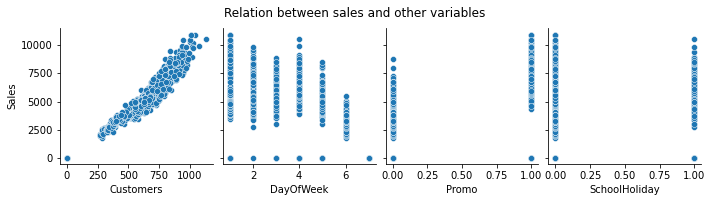

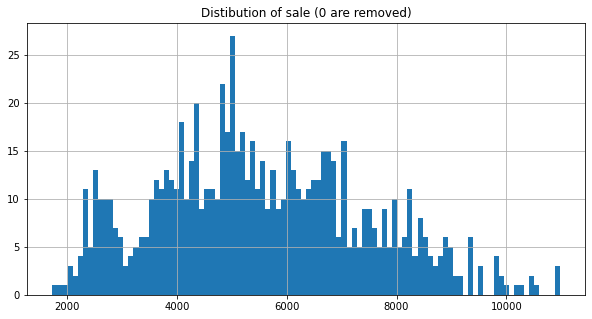

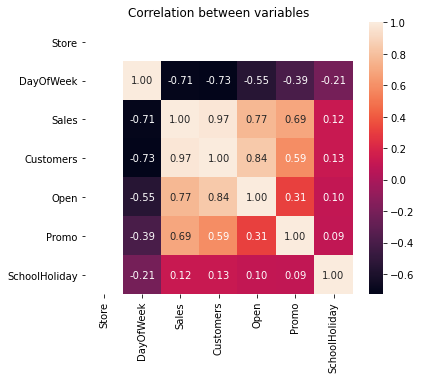

In [203]:
#visualization

visualisation(store_8)

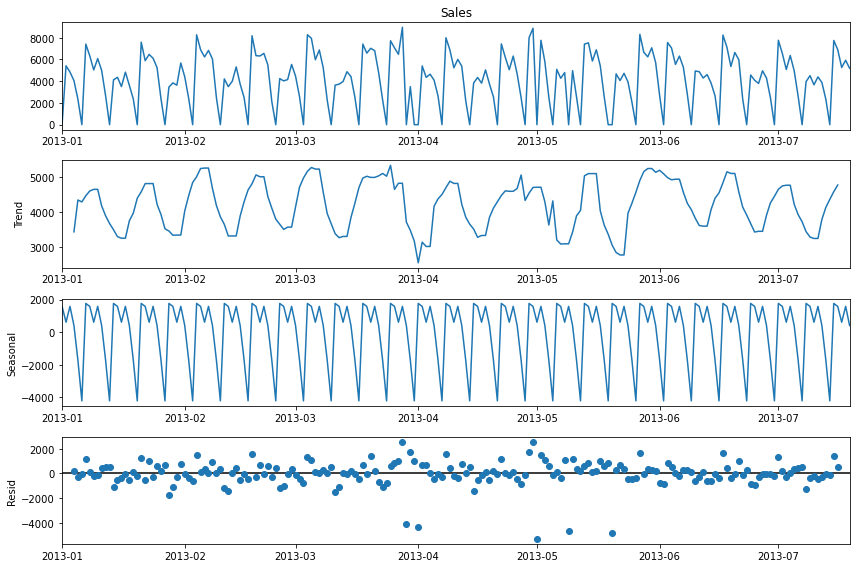

In [204]:
rcParams['figure.figsize']  =12,8
decomposition = sm.tsa.seasonal_decompose(store_8['Sales'][:200],model = 'additive')
fig = decomposition.plot()
plt.show()


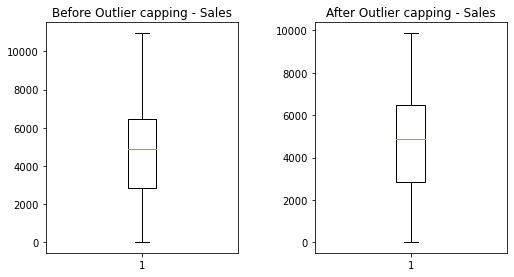

In [205]:
# outliers
store_8_train_no_outliers = store_8_train.copy()
store_8_train_no_outliers['Sales'] = outliers_treatment(store_8_train_no_outliers['Sales'],0,0.99)


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.boxplot(store_8_train['Sales'])
plt.title("Before Outlier capping - Sales")


plt.subplot(1,2,2)
plt.boxplot(store_8_train_no_outliers['Sales'])
plt.title("After Outlier capping - Sales")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 

plt.show()

In [206]:
#since there is no outlier in the actuall data itself, we can use the original data without capping
store_8_train_no_outliers = store_8_train.copy()

In [207]:
# Johansen test to check wheather both series are cointegerated (Thogh we already know both the series are stationary from ADF test)
johnasen_test(store_8[["Sales","Customers"]])

Rank :  2
Both Series are stationary
No cointgeration


**** PACF ****
pacf value :  29
total pacf value that crossed interval :  20


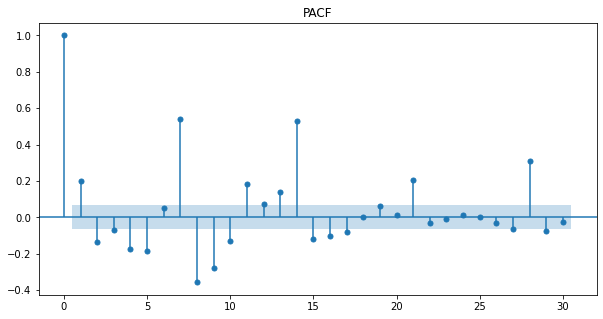



**** ACF ****
pacf value :  28
total pacf value that crossed interval :  24


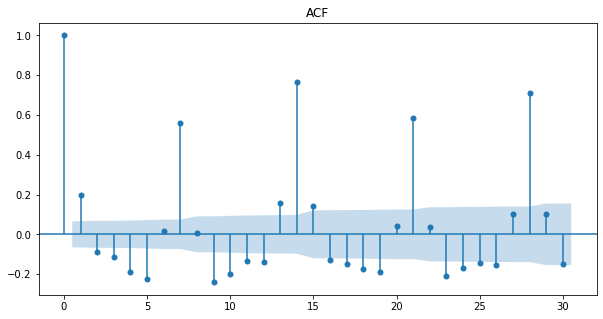

In [208]:
pacf_acf_val(store_8_train_no_outliers['Sales'],30)

In [209]:
#standardizing the SALES columns

standarization_column = ['Sales']
store_8_train_standardized,scaler = scaling(store_8_train_no_outliers,standarization_column)

In [210]:
#model 1

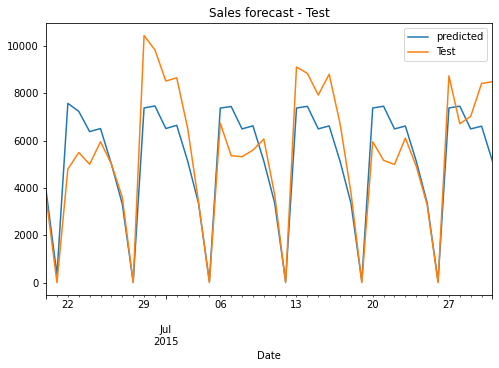

RMSE :  1447.29
MAE :  1126.03


In [211]:
#model building
model_s8_1 = ARIMA(store_8_train_standardized['Sales'],order =(11,0,7))
model_s8_1 = model_s8_1.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s8_1.predict(store_8_test.index.min(),store_8_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_8_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_8_test['Sales'],prediction['Sales'])

In [212]:
result_store_8 = pd.DataFrame()

In [213]:
model = "model_s8_1"
model_type = "ARIMA"
model_para = (10,0,7)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_8 = pd.concat([result_store_8,temp_result],axis=0)
result_store_8

store      model      Rmse      Mae model_type  model_para exogenous var
0  store 8  model_s8_1  1447.29  1126.03      ARIMA  (10, 0, 7)          None

In [214]:
#model 2

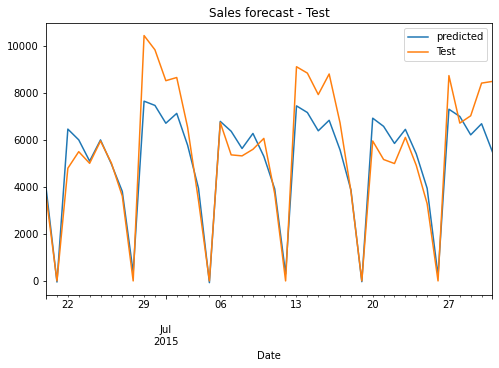

RMSE :  1174.97
MAE :  875.95


In [215]:
#model building
model_s8_2 = ARIMA(store_8_train_standardized['Sales'],order =(11,0,14))
model_s8_2 = model_s8_2.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s8_2.predict(store_8_test.index.min(),store_8_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_8_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_8_test['Sales'],prediction['Sales'])

In [216]:
model = "model_s8_2"
model_type = "ARIMA"
model_para = (11,0,14)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_8 = pd.concat([result_store_8,temp_result],axis=0)
result_store_8

store      model      Rmse      Mae model_type   model_para exogenous var
0  store 8  model_s8_1  1447.29  1126.03      ARIMA   (10, 0, 7)          None
0  store 8  model_s8_2  1174.97   875.95      ARIMA  (11, 0, 14)          None

In [217]:
#model 3

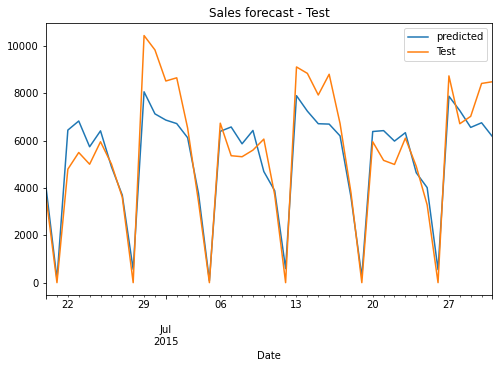

RMSE :  1131.58
MAE :  892.73


In [218]:
#model building
model_s8_3 = SARIMAX(store_8_train_standardized['Sales'],order =(7,0,7),seasonal_order =(1,0,1,14))
model_s8_3 = model_s8_3.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s8_3.predict(store_1_test.index.min(),store_1_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_8_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_8_test['Sales'],prediction['Sales'])

In [219]:
model = "model_s8_3"
model_type = "SARIMA"
model_para = (7,0,7),(1,0,1,14)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_8 = pd.concat([result_store_8,temp_result],axis=0)
result_store_8

store      model      Rmse      Mae model_type  \
0  store 8  model_s8_1  1447.29  1126.03      ARIMA   
0  store 8  model_s8_2  1174.97   875.95      ARIMA   
0  store 8  model_s8_3  1131.58   892.73     SARIMA   

                   model_para exogenous var  
0                  (10, 0, 7)          None  
0                 (11, 0, 14)          None  
0  ((7, 0, 7), (1, 0, 1, 14))          None

In [220]:
#varmax

In [221]:
#standardizing the "Sales , Customers"  columns

standarization_column = ['Sales',"Customers"]
store_8_train_standardized,scaler = scaling(store_8_train_no_outliers,standarization_column)

In [222]:
#model 4

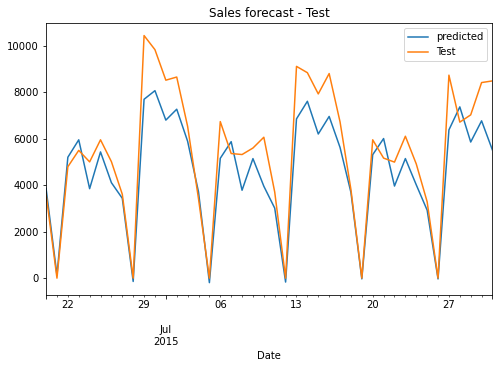

RMSE :  1258.46
MAE :  996.16


In [223]:
#model building
model_s8_4 = sm.tsa.VARMAX(store_8_train_standardized[['Sales','Customers']],order =(11,7),trend='n')
model_s8_4 = model_s8_4.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s8_4.predict(store_8_test.index.min(),store_8_test.index.max())



# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_8_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_8_test['Sales'],prediction['Sales'])

In [224]:
model_s8_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                             
==================================================================================
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMA(11,7)   Log Likelihood                -171.476
Date:                    Sun, 16 Jan 2022   AIC                            492.952
Time:                            17:55:50   BIC                            853.132
Sample:                        01-01-2013   HQIC                           630.543
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
===================================================================================
Ljung-Box (L1) (Q):             0.63, 0.06   Jarque-Bera (JB):      2196.42, 248.00
Prob(Q):                        0.43, 0.81   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.64, 1.47   Skew:                     -1.30, -0.61
Prob(H) (two-sided):            0.00, 0.00   Kurtosis:                  10.20, 5.27
                             Results for equation Sales                            
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
L1.Sales            0.8286      1.112      0.745      0.456      -1.351       3.008
L1.Customers       -0.7554      1.063     -0.711      0.477      -2.839       1.328
L2.Sales            0.3145      1.034      0.304      0.761      -1.713       2.342
L2.Customers       -0.4127      1.028     -0.402      0.688      -2.427       1.602
L3.Sales            0.8350      0.829      1.008      0.314      -0.789       2.459
L3.Customers       -0.7333      0.828     -0.885      0.376      -2.357       0.890
L4.Sales           -0.4636      0.906     -0.511      0.609      -2.240       1.313
L4.Customers        0.4364      0.923      0.473      0.636      -1.372       2.245
L5.Sales            0.1232      0.506      0.243      0.808      -0.869       1.115
L5.Customers       -0.2145      0.530     -0.404      0.686      -1.254       0.825
L6.Sales           -0.5670      0.463     -1.225      0.221      -1.474       0.340
L6.Customers        0.6778      0.433      1.564      0.118      -0.171       1.527
L7.Sales           -1.3144      0.450     -2.921      0.003      -2.196      -0.432
L7.Customers        1.9552      0.497      3.932      0.000       0.981       2.930
L8.Sales            0.5474      0.527      1.038      0.299      -0.486       1.581
L8.Customers       -0.5617      0.419     -1.342      0.180      -1.382       0.259
L9.Sales           -0.6406      0.437     -1.467      0.142      -1.496       0.215
L9.Customers        0.6384      0.395      1.618      0.106      -0.135       1.412
L10.Sales           0.5869      0.396      1.483      0.138      -0.189       1.363
L10.Customers      -0.6066      0.346     -1.756      0.079      -1.284       0.071
L11.Sales          -0.0710      0.481     -0.148      0.883      -1.013       0.871
L11.Customers       0.2512      0.421      0.597      0.550      -0.573       1.075
L1.e(Sales)        -0.0931      1.135     -0.082      0.935      -2.318       2.132
L1.e(Customers)     0.1235      1.080      0.114      0.909      -1.993       2.240
L2.e(Sales)         0.2062      0.771      0.267      0.789      -1.306       1.718
L2.e(Customers)     0.0295      0.780      0.038      0.970      -1.499       1.558
L3.e(Sales)        -0.4678      0.720     -0.649      0.516      -1.880       0.944
L3.e(Customers)     0.4557      0.699      0.652      0.514      -0.914       1.825
L4.e(Sales)         0.0238      0.671      0.035      0.972      -1.292       1.339
L4.e(Customer

In [225]:
model = "model_s8_4"
model_type = "VARIMAX"
model_para = (11,7)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_8 = pd.concat([result_store_8,temp_result],axis=0)
result_store_8

store      model      Rmse      Mae model_type  \
0  store 8  model_s8_1  1447.29  1126.03      ARIMA   
0  store 8  model_s8_2  1174.97   875.95      ARIMA   
0  store 8  model_s8_3  1131.58   892.73     SARIMA   
0  store 8  model_s8_4  1258.46   996.16    VARIMAX   

                   model_para exogenous var  
0                  (10, 0, 7)          None  
0                 (11, 0, 14)          None  
0  ((7, 0, 7), (1, 0, 1, 14))          None  
0                     (11, 7)          None

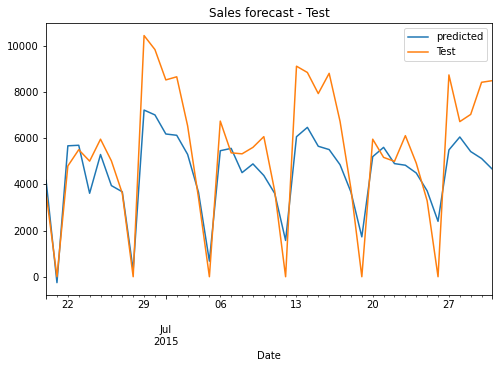

RMSE :  1764.08
MAE :  1382.14


In [226]:
#model building
model_s8_5 = sm.tsa.VARMAX(store_8_train_standardized[['Sales','Customers']],order =(11,14),trend='n')
model_s8_5 = model_s8_5.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s8_5.predict(store_8_test.index.min(),store_8_test.index.max())



# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_8_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_8_test['Sales'],prediction['Sales'])

In [227]:
model = "model_s8_5"
model_type = "VARIMAX"
model_para = (11,14)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_8 = pd.concat([result_store_8,temp_result],axis=0)
result_store_8

store      model      Rmse      Mae model_type  \
0  store 8  model_s8_1  1447.29  1126.03      ARIMA   
0  store 8  model_s8_2  1174.97   875.95      ARIMA   
0  store 8  model_s8_3  1131.58   892.73     SARIMA   
0  store 8  model_s8_4  1258.46   996.16    VARIMAX   
0  store 8  model_s8_5  1764.08  1382.14    VARIMAX   

                   model_para exogenous var  
0                  (10, 0, 7)          None  
0                 (11, 0, 14)          None  
0  ((7, 0, 7), (1, 0, 1, 14))          None  
0                     (11, 7)          None  
0                    (11, 14)          None

In [228]:
#model 6

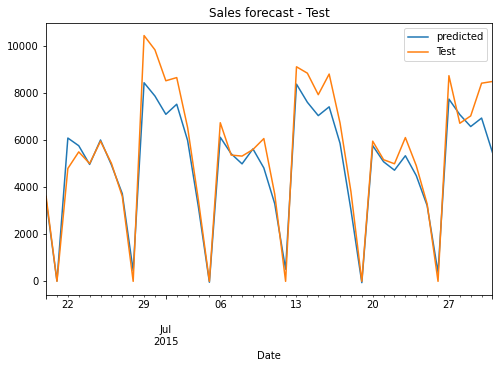

RMSE :  924.15
MAE :  654.38


In [229]:
#assigning exog varialbles
exog = store_8_train[["Open","SchoolHoliday","Promo"]]
test_exog = store_8_test[["Open","SchoolHoliday","Promo"]]

#model building
model_s8_6 = sm.tsa.VARMAX(store_8_train_standardized[['Sales','Customers']],order =(11,7),exog=exog)
model_s8_6 = model_s8_6.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s8_6.predict(store_8_test.index.min(),store_8_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_8_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_8_test['Sales'],prediction['Sales'])

In [230]:
model = "model_s8_6"
model_type = "VARIMAX"
model_para = (11,7)
exog = ["Open","SchoolHoliday","Promo"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_8 = pd.concat([result_store_8,temp_result],axis=0)
result_store_8

store      model      Rmse      Mae model_type  \
0  store 8  model_s8_1  1447.29  1126.03      ARIMA   
0  store 8  model_s8_2  1174.97   875.95      ARIMA   
0  store 8  model_s8_3  1131.58   892.73     SARIMA   
0  store 8  model_s8_4  1258.46   996.16    VARIMAX   
0  store 8  model_s8_5  1764.08  1382.14    VARIMAX   
0  store 8  model_s8_6   924.15   654.38    VARIMAX   

                   model_para                 exogenous var  
0                  (10, 0, 7)                          None  
0                 (11, 0, 14)                          None  
0  ((7, 0, 7), (1, 0, 1, 14))                          None  
0                     (11, 7)                          None  
0                    (11, 14)                          None  
0                     (11, 7)  [Open, SchoolHoliday, Promo]

In [231]:
# model 7

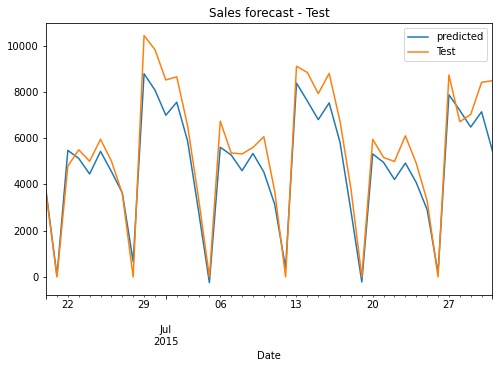

RMSE :  962.24
MAE :  772.48


In [232]:
#assigning exog varialbles
exog = store_8_train[["Open","SchoolHoliday","Promo","DayOfWeek"]]
test_exog = store_8_test[["Open","SchoolHoliday","Promo","DayOfWeek"]]

#model building
model_s8_7 = sm.tsa.VARMAX(store_8_train_standardized[['Sales','Customers']],order =(11,10),exog=exog)
model_s8_7 = model_s8_7.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s8_7.predict(store_1_test.index.min(),store_1_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_8_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_8_test['Sales'],prediction['Sales'])

In [233]:
model = "model_s8_7"
model_type = "VARIMAX"
model_para = (11,10)
exog = ["Open","SchoolHoliday","Promo","DayOfWeek"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_8 = pd.concat([result_store_8,temp_result],axis=0)
result_store_8

store      model      Rmse      Mae model_type  \
0  store 8  model_s8_1  1447.29  1126.03      ARIMA   
0  store 8  model_s8_2  1174.97   875.95      ARIMA   
0  store 8  model_s8_3  1131.58   892.73     SARIMA   
0  store 8  model_s8_4  1258.46   996.16    VARIMAX   
0  store 8  model_s8_5  1764.08  1382.14    VARIMAX   
0  store 8  model_s8_6   924.15   654.38    VARIMAX   
0  store 8  model_s8_7   962.24   772.48    VARIMAX   

                   model_para                            exogenous var  
0                  (10, 0, 7)                                     None  
0                 (11, 0, 14)                                     None  
0  ((7, 0, 7), (1, 0, 1, 14))                                     None  
0                     (11, 7)                                     None  
0                    (11, 14)                                     None  
0                     (11, 7)             [Open, SchoolHoliday, Promo]  
0                    (11, 10)  [Open, SchoolHoliday, Promo, DayOfWeek]

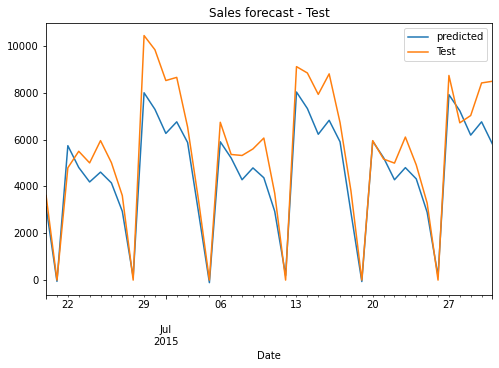

RMSE :  1188.58
MAE :  947.63


In [234]:
#assigning exog varialbles
exog = store_8_train[["Open","SchoolHoliday","Promo","DayOfWeek"]]
test_exog = store_8_test[["Open","SchoolHoliday","Promo","DayOfWeek"]]

#model building
model_s8_8 = sm.tsa.VARMAX(store_8_train_standardized[['Sales','Customers']],order =(7,7),exog=exog)
model_s8_8 = model_s8_8.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s8_8.predict(store_1_test.index.min(),store_1_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_8_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_8_test['Sales'],prediction['Sales'])

In [235]:
model = "model_s8_8"
model_type = "VARIMAX"
model_para = (7,7)
exog = ["Open","SchoolHoliday","Promo","DayOfWeek"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_8 = pd.concat([result_store_8,temp_result],axis=0)
result_store_8

store      model      Rmse      Mae model_type  \
0  store 8  model_s8_1  1447.29  1126.03      ARIMA   
0  store 8  model_s8_2  1174.97   875.95      ARIMA   
0  store 8  model_s8_3  1131.58   892.73     SARIMA   
0  store 8  model_s8_4  1258.46   996.16    VARIMAX   
0  store 8  model_s8_5  1764.08  1382.14    VARIMAX   
0  store 8  model_s8_6   924.15   654.38    VARIMAX   
0  store 8  model_s8_7   962.24   772.48    VARIMAX   
0  store 8  model_s8_8  1188.58   947.63    VARIMAX   

                   model_para                            exogenous var  
0                  (10, 0, 7)                                     None  
0                 (11, 0, 14)                                     None  
0  ((7, 0, 7), (1, 0, 1, 14))                                     None  
0                     (11, 7)                                     None  
0                    (11, 14)                                     None  
0                     (11, 7)             [Open, SchoolHoliday, Promo]  
0                    (11, 10)  [Open, SchoolHoliday, Promo, DayOfWeek]  
0                      (7, 7)  [Open, SchoolHoliday, Promo, DayOfWeek]

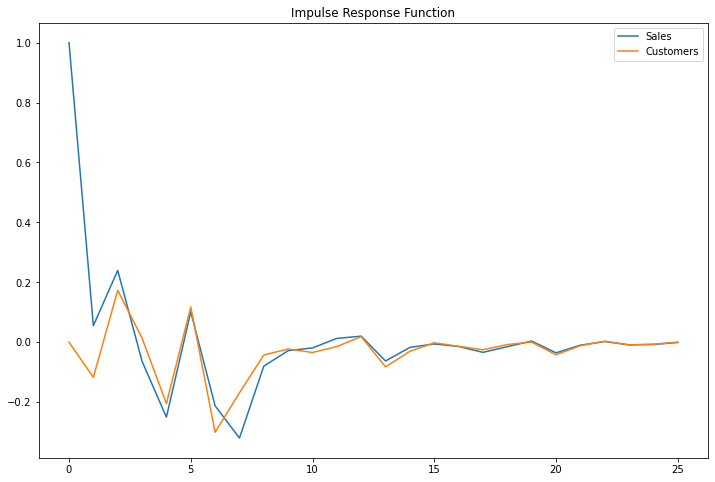

In [236]:
irf = model_s8_8.impulse_responses(steps = 25, orthogonalized= False)
irf.plot()
plt.title("Impulse Response Function")
plt.show()

### Store 9 : Forecasting sales

In [237]:
#spliting the data into train and test
store = "store 9"
store_9_train = store_9[:train_len]
store_9_test = store_9[train_len:]

print("Train data shape : ",store_9_train.shape)
print("test data shape : ",store_9_test.shape)

Train data shape :  (900, 8)
test data shape :  (42, 8)


<Figure size 1440x288 with 0 Axes>

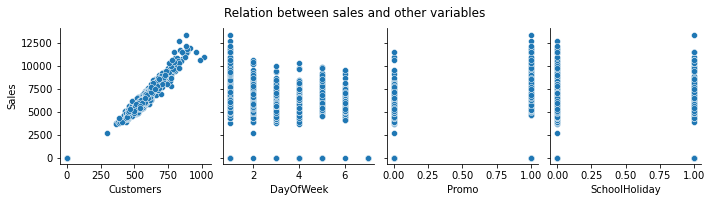

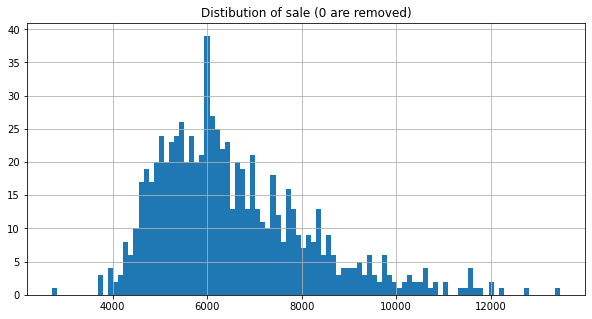

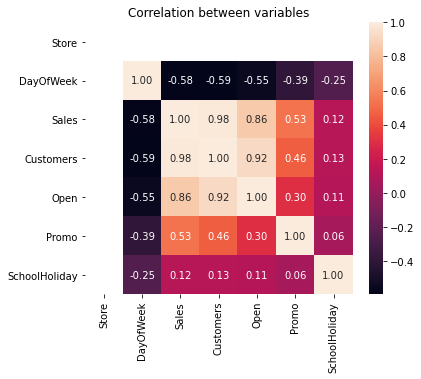

In [238]:
#visualization

visualisation(store_9)

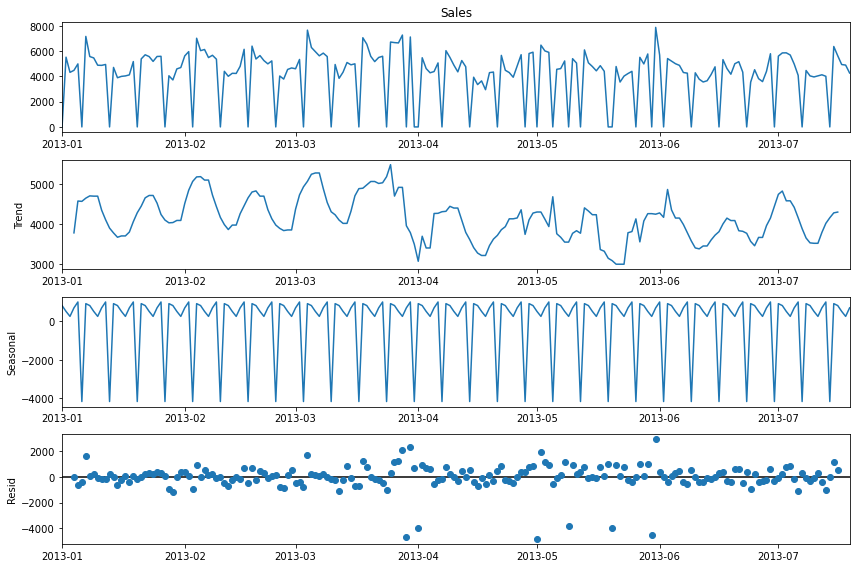

In [239]:
rcParams['figure.figsize']  =12,8
decomposition = sm.tsa.seasonal_decompose(store_1['Sales'][:200],model = 'additive')
fig = decomposition.plot()
plt.show()

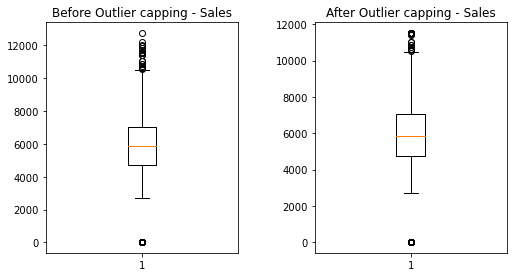

In [240]:
# outliers
store_9_train_no_outliers = store_9_train.copy()
store_9_train_no_outliers['Sales'] = outliers_treatment(store_9_train_no_outliers['Sales'],0,0.99)


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.boxplot(store_9_train['Sales'])
plt.title("Before Outlier capping - Sales")


plt.subplot(1,2,2)
plt.boxplot(store_9_train_no_outliers['Sales'])
plt.title("After Outlier capping - Sales")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 

plt.show()

In [241]:
# Johansen test to check wheather both series are cointegerated (Thogh we already know both the series are stationary from ADF test)
johnasen_test(store_9[["Sales","Customers"]])

Rank :  2
Both Series are stationary
No cointgeration


**** PACF ****
pacf value :  28
total pacf value that crossed interval :  17


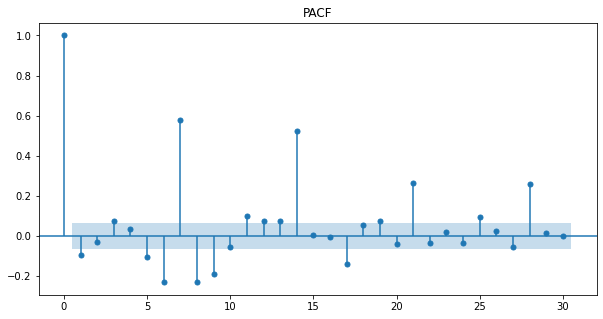



**** ACF ****
pacf value :  28
total pacf value that crossed interval :  15


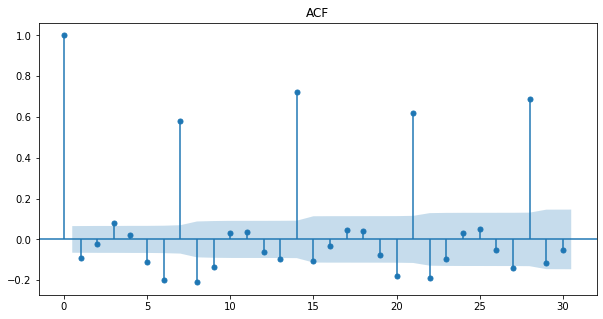

In [242]:
pacf_acf_val(store_9_train['Sales'],30)

In [243]:
#standardizing the SALES columns

standarization_column = ['Sales']
store_9_train_standardized,scaler = scaling(store_9_train_no_outliers,standarization_column)

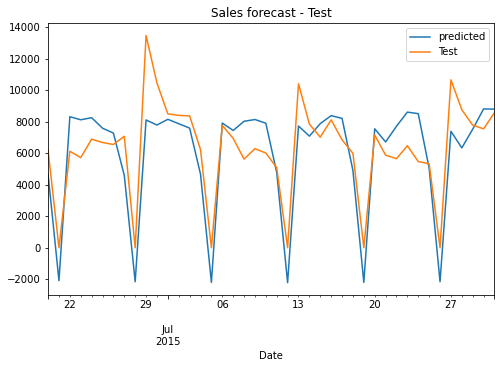

RMSE :  1898.9
MAE :  1573.44


In [244]:
#model building
model_s9_1 = ARIMA(store_9_train_standardized['Sales'],order =(7,0,8))
model_s9_1 = model_s9_1.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s9_1.predict(store_9_test.index.min(),store_9_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_9_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_9_test['Sales'],prediction['Sales'])

In [245]:
result_store_9 = pd.DataFrame()

In [246]:
model = "model_s9_1"
model_type = "ARIMA"
model_para = (7,0,8)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_9 = pd.concat([result_store_9,temp_result],axis=0)
result_store_9

store      model     Rmse      Mae model_type model_para exogenous var
0  store 9  model_s9_1  1898.9  1573.44      ARIMA  (7, 0, 8)          None

In [247]:
#model 2

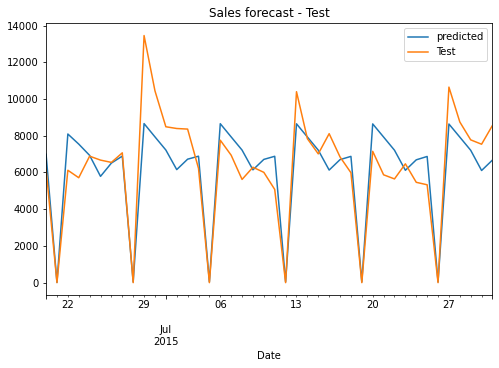

RMSE :  1441.72
MAE :  1077.42


In [248]:
#model building
model_s9_2 = ARIMA(store_9_train_standardized['Sales'],order =(7,0,14))
model_s9_2 = model_s9_2.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s9_2.predict(store_9_test.index.min(),store_9_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_9_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_9_test['Sales'],prediction['Sales'])

In [249]:
model = "model_s9_2"
model_type = "ARIMA"
model_para = (7,0,14)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_9 = pd.concat([result_store_9,temp_result],axis=0)
result_store_9

store      model      Rmse      Mae model_type  model_para exogenous var
0  store 9  model_s9_1  1898.90  1573.44      ARIMA   (7, 0, 8)          None
0  store 9  model_s9_2  1441.72  1077.42      ARIMA  (7, 0, 14)          None

In [250]:
#model 3

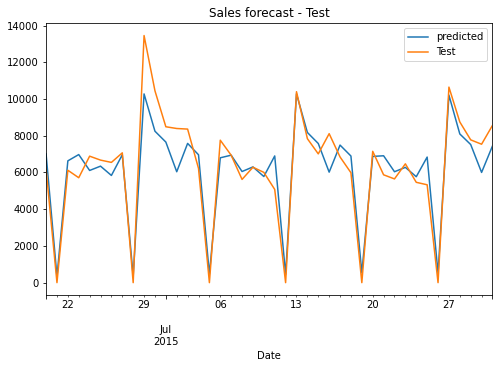

RMSE :  1045.28
MAE :  788.19


In [251]:
#model building
model_s9_3 = SARIMAX(store_9_train_standardized['Sales'],order =(7,0,7),seasonal_order =(1,0,1,14))
model_s9_3 = model_s9_3.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s9_3.predict(store_9_test.index.min(),store_9_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_9_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_9_test['Sales'],prediction['Sales'])

In [252]:
model = "model_s9_3"
model_type = "SARIMA"
model_para = (7,0,7),(1,0,1,14)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_9 = pd.concat([result_store_9,temp_result],axis=0)
result_store_9

store      model      Rmse      Mae model_type  \
0  store 9  model_s9_1  1898.90  1573.44      ARIMA   
0  store 9  model_s9_2  1441.72  1077.42      ARIMA   
0  store 9  model_s9_3  1045.28   788.19     SARIMA   

                   model_para exogenous var  
0                   (7, 0, 8)          None  
0                  (7, 0, 14)          None  
0  ((7, 0, 7), (1, 0, 1, 14))          None

In [253]:
#model 4

In [254]:
#standardizing the "Sales , Customers"  columns

standarization_column = ['Sales',"Customers"]
store_9_train_standardized,scaler = scaling(store_9_train_no_outliers,standarization_column)


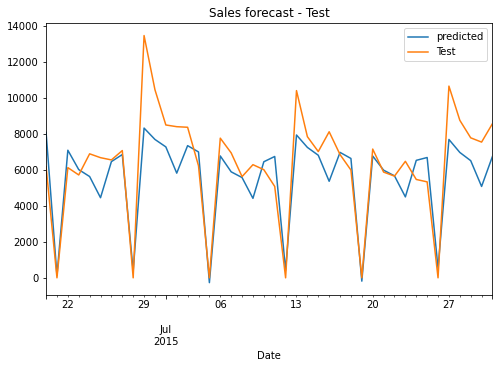

RMSE :  1609.16
MAE :  1200.18


In [255]:
#model building
model_s9_4 = sm.tsa.VARMAX(store_9_train_standardized[['Sales','Customers']],order =(9,9))
model_s9_4 = model_s9_4.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s9_4.predict(store_9_test.index.min(),store_9_test.index.max())



# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_9_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_9_test['Sales'],prediction['Sales'])

In [256]:
model = "model_s9_4"
model_type = "VARMAX"
model_para = (9,9)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_9 = pd.concat([result_store_9,temp_result],axis=0)
result_store_9

store      model      Rmse      Mae model_type  \
0  store 9  model_s9_1  1898.90  1573.44      ARIMA   
0  store 9  model_s9_2  1441.72  1077.42      ARIMA   
0  store 9  model_s9_3  1045.28   788.19     SARIMA   
0  store 9  model_s9_4  1609.16  1200.18     VARMAX   

                   model_para exogenous var  
0                   (7, 0, 8)          None  
0                  (7, 0, 14)          None  
0  ((7, 0, 7), (1, 0, 1, 14))          None  
0                      (9, 9)          None

In [257]:
# model 5

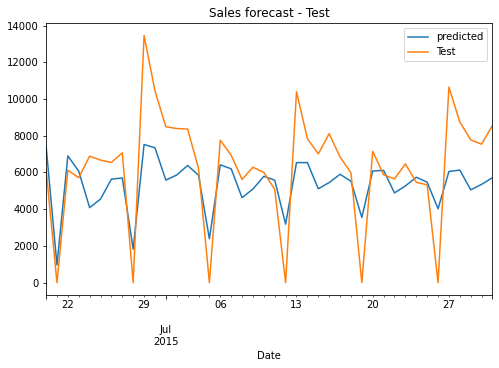

RMSE :  2263.42
MAE :  1837.13


In [258]:
#model building
model_s9_5 = sm.tsa.VARMAX(store_9_train_standardized[['Sales','Customers']],order =(10,14))
model_s9_5 = model_s9_5.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s9_5.predict(store_9_test.index.min(),store_9_test.index.max())



# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_9_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_9_test['Sales'],prediction['Sales'])

In [259]:
model_s9_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                             
==================================================================================
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                       VARMA(10,14)   Log Likelihood                -320.576
                              + intercept   AIC                            843.152
Date:                    Sun, 16 Jan 2022   BIC                           1328.194
Time:                            18:19:20   HQIC                          1028.441
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
===================================================================================
Ljung-Box (L1) (Q):             0.02, 0.00   Jarque-Bera (JB):        712.52, 39.99
Prob(Q):                        0.89, 0.99   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.79, 1.73   Skew:                     -0.45, -0.25
Prob(H) (two-sided):            0.00, 0.00   Kurtosis:                   7.27, 3.91
                             Results for equation Sales                             
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -0.0013      1.201     -0.001      0.999      -2.355       2.353
L1.Sales             1.0656   1345.860      0.001      0.999   -2636.772    2638.904
L1.Customers        -1.1815   1221.454     -0.001      0.999   -2395.188    2392.825
L2.Sales             0.8476    585.002      0.001      0.999   -1145.735    1147.430
L2.Customers        -0.8111    182.287     -0.004      0.996    -358.086     356.464
L3.Sales             0.4488    615.891      0.001      0.999   -1206.674    1207.572
L3.Customers        -0.3990    503.387     -0.001      0.999    -987.020     986.222
L4.Sales             0.0456    342.307      0.000      1.000    -670.864     670.955
L4.Customers        -0.0498    581.308  -8.57e-05      1.000   -1139.392    1139.292
L5.Sales             0.1295    588.577      0.000      1.000   -1153.460    1153.719
L5.Customers        -0.1915    772.172     -0.000      1.000   -1513.620    1513.237
L6.Sales            -0.8398    671.160     -0.001      0.999   -1316.288    1314.609
L6.Customers         0.7157    703.499      0.001      0.999   -1378.116    1379.548
L7.Sales            -1.0891    379.246     -0.003      0.998    -744.399     742.220
L7.Customers         1.6137    418.593      0.004      0.997    -818.813     822.040
L8.Sales             0.3258   1026.081      0.000      1.000   -2010.756    2011.408
L8.Customers        -0.3400   1067.677     -0.000      1.000   -2092.948    2092.268
L9.Sales             0.2438    290.919      0.001      0.999    -569.947     570.435
L9.Customers        -0.2623     15.954     -0.016      0.987     -31.532      31.007
L10.Sales            0.0791   1257.018   6.29e-05      1.000   -2463.632    2463.790
L10.Customers       -0.0562   1921.059  -2.93e-05      1.000   -3765.262    3765.150
L1.e(Sales)              -0   1345.836         -0      1.000   -2637.791    2637.791
L1.e(Customers)           0   1221.425          0      1.000   -2393.949    2393.949
L2.e(Sales)              -0   1139.840         -0      1.000   -2234.046    2234.046
L2.e(Customers)           0    712.479          0      1.000   -1396.434    1396.434
L3.e(Sales)               0    388.761          0      1.000    -761.959     761.959
L3.e(Customers)          -0   1493.944         -0      1.000   -2928.076    2928.076
L4.e(Sales)               0    170.277          0      1.000    -33

In [260]:
model = "model_s9_5"
model_type = "VARMAX"
model_para = (10,14)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_9 = pd.concat([result_store_9,temp_result],axis=0)
result_store_9

store      model      Rmse      Mae model_type  \
0  store 9  model_s9_1  1898.90  1573.44      ARIMA   
0  store 9  model_s9_2  1441.72  1077.42      ARIMA   
0  store 9  model_s9_3  1045.28   788.19     SARIMA   
0  store 9  model_s9_4  1609.16  1200.18     VARMAX   
0  store 9  model_s9_5  2263.42  1837.13     VARMAX   

                   model_para exogenous var  
0                   (7, 0, 8)          None  
0                  (7, 0, 14)          None  
0  ((7, 0, 7), (1, 0, 1, 14))          None  
0                      (9, 9)          None  
0                    (10, 14)          None

In [261]:
# model 6

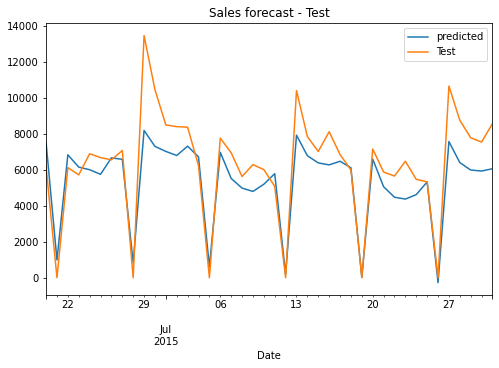

RMSE :  1562.87
MAE :  1191.54


In [262]:
#assigning exog varialbles
exog = store_9_train[["Open","SchoolHoliday","Promo"]]
test_exog = store_9_test[["Open","SchoolHoliday","Promo"]]

#model building
model_s9_6 = sm.tsa.VARMAX(store_9_train_standardized[['Sales','Customers']],order =(7,7),exog=exog)
model_s9_6 = model_s9_6.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s9_6.predict(store_9_test.index.min(),store_9_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_9_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_9_test['Sales'],prediction['Sales'])

In [263]:
model_s9_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                             
==================================================================================
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(7,7)   Log Likelihood                 295.033
                              + intercept   AIC                           -456.066
Date:                    Sun, 16 Jan 2022   BIC                           -134.305
Time:                            18:20:23   HQIC                          -333.151
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
===================================================================================
Ljung-Box (L1) (Q):             2.00, 0.62   Jarque-Bera (JB):       959.56, 351.67
Prob(Q):                        0.16, 0.43   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.82, 1.31   Skew:                     -0.86, -0.16
Prob(H) (two-sided):            0.00, 0.02   Kurtosis:                   7.76, 6.04
                              Results for equation Sales                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             -0.6610      0.060    -10.958      0.000      -0.779      -0.543
L1.Sales               0.8517      0.196      4.336      0.000       0.467       1.237
L1.Customers          -0.8590      0.187     -4.585      0.000      -1.226      -0.492
L2.Sales               0.2937      0.239      1.229      0.219      -0.175       0.762
L2.Customers          -0.2129      0.232     -0.920      0.358      -0.667       0.241
L3.Sales              -0.0820      0.192     -0.426      0.670      -0.459       0.295
L3.Customers           0.1646      0.185      0.890      0.374      -0.198       0.527
L4.Sales               0.0457      0.217      0.211      0.833      -0.380       0.471
L4.Customers           0.0250      0.207      0.121      0.904      -0.380       0.430
L5.Sales               0.0826      0.232      0.356      0.722      -0.372       0.537
L5.Customers          -0.0327      0.220     -0.149      0.882      -0.463       0.398
L6.Sales              -0.2969      0.256     -1.158      0.247      -0.799       0.206
L6.Customers           0.2418      0.250      0.966      0.334      -0.249       0.732
L7.Sales               0.0392      0.205      0.191      0.848      -0.363       0.441
L7.Customers           0.5690      0.206      2.766      0.006       0.166       0.972
L1.e(Sales)            0.0175      0.203      0.086      0.931      -0.381       0.416
L1.e(Customers)       -0.0167      0.228     -0.073      0.942      -0.464       0.431
L2.e(Sales)            0.0228      0.245      0.093      0.926      -0.458       0.504
L2.e(Customers)       -0.0546      0.270     -0.202      0.840      -0.585       0.476
L3.e(Sales)            0.1056      0.200      0.527      0.599      -0.287       0.498
L3.e(Customers)       -0.1472      0.228     -0.646      0.518      -0.594       0.299
L4.e(Sales)           -0.0358      0.210     -0.170      0.865      -0.448       0.376
L4.e(Customers)        0.0087      0.239      0.036      0.971      -0.459       0.476
L5.e(Sales)           -0.0279      0.231     -0.121      0.904      -0.481       0.425
L5.e(Customers)        0.0279      0.255      0.110      0.913      -0.471       0.527
L6.e(Sales)            0.0211      0.236      0.089      0.929      -0.441       0.484
L6.e(Customers)        0.0711      0.264      0.269      0.788      -0.446       0.588
L7.e(

In [264]:
model = "model_s9_6"
model_type = "VARMAX"
model_para = (7,7)
exog = ["Open","SchoolHoliday","Promo"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_9 = pd.concat([result_store_9,temp_result],axis=0)
result_store_9

store      model      Rmse      Mae model_type  \
0  store 9  model_s9_1  1898.90  1573.44      ARIMA   
0  store 9  model_s9_2  1441.72  1077.42      ARIMA   
0  store 9  model_s9_3  1045.28   788.19     SARIMA   
0  store 9  model_s9_4  1609.16  1200.18     VARMAX   
0  store 9  model_s9_5  2263.42  1837.13     VARMAX   
0  store 9  model_s9_6  1562.87  1191.54     VARMAX   

                   model_para                 exogenous var  
0                   (7, 0, 8)                          None  
0                  (7, 0, 14)                          None  
0  ((7, 0, 7), (1, 0, 1, 14))                          None  
0                      (9, 9)                          None  
0                    (10, 14)                          None  
0                      (7, 7)  [Open, SchoolHoliday, Promo]

In [265]:
#model 7

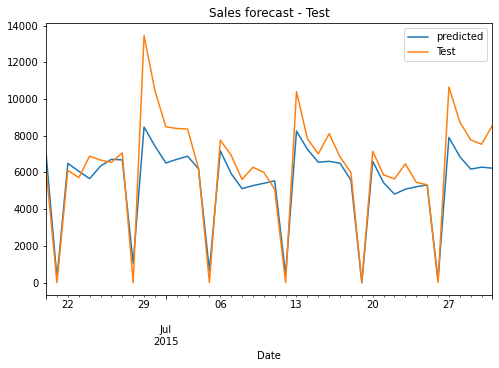

RMSE :  1396.23
MAE :  1003.8


In [266]:
#assigning exog varialbles
exog = store_9_train[["Open","SchoolHoliday","Promo","DayOfWeek"]]
test_exog = store_9_test[["Open","SchoolHoliday","Promo","DayOfWeek"]]

#model building
model_s9_7 = sm.tsa.VARMAX(store_9_train_standardized[['Sales','Customers']],order =(10,7),exog=exog)
model_s9_7 = model_s9_7.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s9_7.predict(store_9_test.index.min(),store_9_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_9_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_9_test['Sales'],prediction['Sales'])

In [267]:
model = "model_s9_7"
model_type = "VARMAX"
model_para = (10,7)
exog = ["Open","SchoolHoliday","Promo","DayOfWeek"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_9 = pd.concat([result_store_9,temp_result],axis=0)
result_store_9

store      model      Rmse      Mae model_type  \
0  store 9  model_s9_1  1898.90  1573.44      ARIMA   
0  store 9  model_s9_2  1441.72  1077.42      ARIMA   
0  store 9  model_s9_3  1045.28   788.19     SARIMA   
0  store 9  model_s9_4  1609.16  1200.18     VARMAX   
0  store 9  model_s9_5  2263.42  1837.13     VARMAX   
0  store 9  model_s9_6  1562.87  1191.54     VARMAX   
0  store 9  model_s9_7  1396.23  1003.80     VARMAX   

                   model_para                            exogenous var  
0                   (7, 0, 8)                                     None  
0                  (7, 0, 14)                                     None  
0  ((7, 0, 7), (1, 0, 1, 14))                                     None  
0                      (9, 9)                                     None  
0                    (10, 14)                                     None  
0                      (7, 7)             [Open, SchoolHoliday, Promo]  
0                     (10, 7)  [Open, SchoolHoliday, Promo, DayOfWeek]

### Store 13 : Forecasting sales

In [268]:
#spliting the data into train and test
store = "store 13"
store_13_train = store_13[:-42]
store_13_test = store_13[-42:]

print("Train data shape : ",store_13_train.shape)
print("test data shape : ",store_13_test.shape)

Train data shape :  (716, 8)
test data shape :  (42, 8)


In [269]:

store_13_train.reset_index(inplace=True)
store_13_test.reset_index(inplace=True)

<Figure size 1440x288 with 0 Axes>

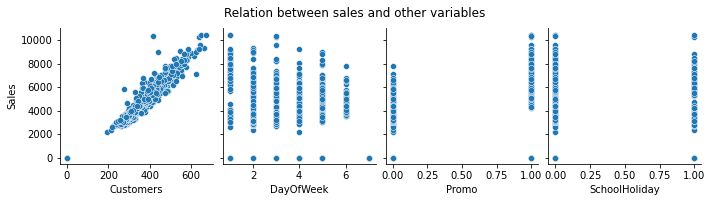

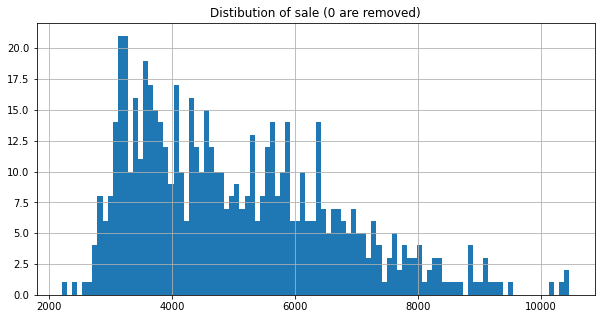

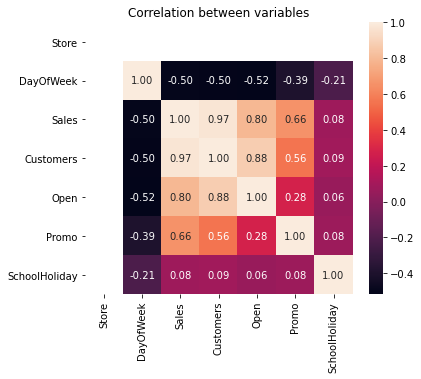

In [270]:
visualisation(store_13)

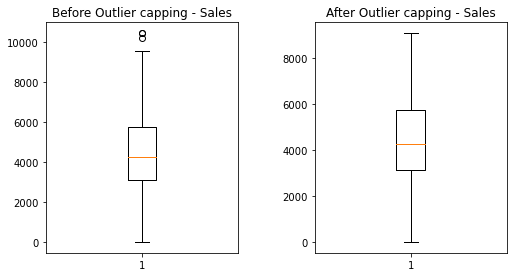

In [271]:
# outliers
store_13_train_no_outliers = store_13_train.copy()
store_13_train_no_outliers['Sales'] = outliers_treatment(store_13_train_no_outliers['Sales'],0,0.99)


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.boxplot(store_13_train['Sales'])
plt.title("Before Outlier capping - Sales")


plt.subplot(1,2,2)
plt.boxplot(store_13_train_no_outliers['Sales'])
plt.title("After Outlier capping - Sales")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 

plt.show()



In [272]:
# Johansen test to check wheather both series are cointegerated (Thogh we already know both the series are stationary from ADF test)
johnasen_test(store_13[["Sales","Customers"]])

Rank :  2
Both Series are stationary
No cointgeration


**** PACF ****
pacf value :  28
total pacf value that crossed interval :  15


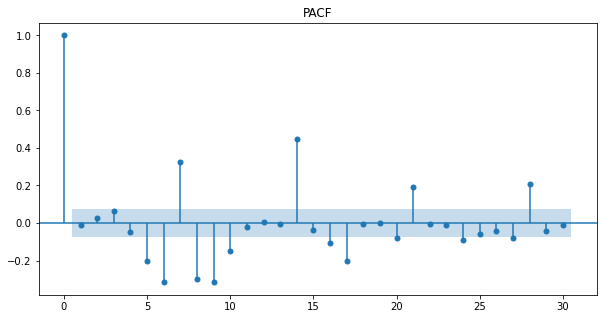



**** ACF ****
pacf value :  28
total pacf value that crossed interval :  13


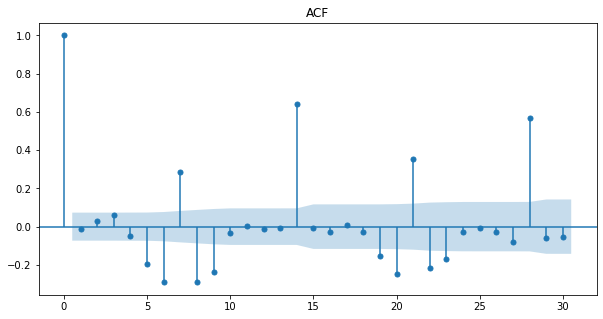

In [273]:
pacf_acf_val(store_13_train['Sales'],30)

In [274]:
result_store_13 = pd.DataFrame()

#standardizing the "Sales , Customers"  columns

standarization_column = ['Sales',"Customers"]
store_13_train_standardized,scaler = scaling(store_13_train_no_outliers,standarization_column)

In [275]:
# model 1

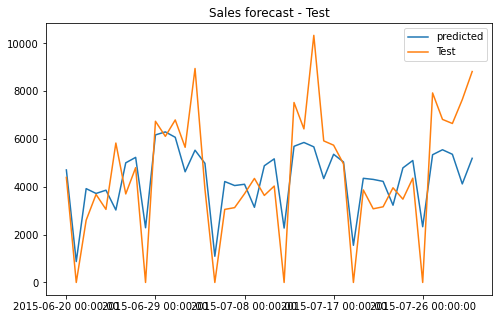

RMSE :  1712.25
MAE :  1367.83


In [276]:

#model building
model_s13_1 = sm.tsa.VARMAX(store_13_train_standardized[['Sales','Customers']],order =(10,9))
model_s13_1 = model_s13_1.fit(maxiter=50,disp=False)

#prediction for the next 6 week
prediction = model_s13_1.forecast(42)

prediction = pd.DataFrame(prediction)

# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)
prediction.reset_index(inplace=True)

#plotting
xticks = store_13_test.index

plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_13_test['Sales'].plot(label="Test")
plt.xticks(xticks,store_13_test['Date'])
plt.legend(loc='best')
plt.locator_params(axis='x', nbins=5)
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_13_test['Sales'],prediction['Sales'])



In [277]:
model = "model_s13_1"
model_type = "VARMAX"
model_para = (10,9)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_13 = pd.concat([result_store_13,temp_result],axis=0)
result_store_13

store       model      Rmse      Mae model_type model_para exogenous var
0  store 13  model_s13_1  1712.25  1367.83     VARMAX    (10, 9)          None

In [278]:
# model 2

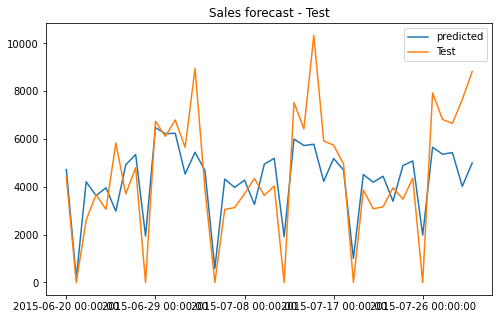

RMSE :  1668.98
MAE :  1311.17


In [279]:

#model building
model_s13_2 = sm.tsa.VARMAX(store_13_train_standardized[['Sales','Customers']],order =(9,8))
model_s13_2 = model_s13_2.fit(maxiter=50,disp=False)

#prediction for the next 6 week
prediction = model_s13_2.forecast(42)

prediction = pd.DataFrame(prediction)

# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)
prediction.reset_index(inplace=True)

#plotting
xticks = store_13_test.index

plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_13_test['Sales'].plot(label="Test")
plt.xticks(xticks,store_13_test['Date'])
plt.legend(loc='best')
plt.locator_params(axis='x', nbins=5)
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_13_test['Sales'],prediction['Sales'])



In [280]:
model = "model_s13_2"
model_type = "VARMAX"
model_para = (9,8)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_13 = pd.concat([result_store_13,temp_result],axis=0)
result_store_13

store       model      Rmse      Mae model_type model_para exogenous var
0  store 13  model_s13_1  1712.25  1367.83     VARMAX    (10, 9)          None
0  store 13  model_s13_2  1668.98  1311.17     VARMAX     (9, 8)          None

In [281]:
# model 3

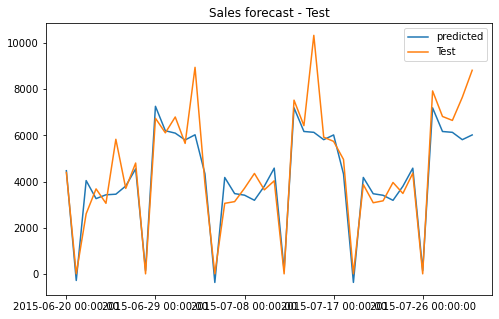

RMSE :  1123.45
MAE :  703.14


In [282]:
#assigning exog varialbles
exog = store_13_train[["Open","SchoolHoliday","Promo"]]
test_exog = store_13_test[["Open","SchoolHoliday","Promo"]]

#model building
model_s13_3 = sm.tsa.VARMAX(store_13_train_standardized[['Sales','Customers']],order =(9,9),exog=exog)
model_s13_3 = model_s13_3.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s13_3.forecast(42,exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)
prediction.reset_index(inplace=True)

#plotting
xticks = store_13_test.index

plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_13_test['Sales'].plot(label="Test")
plt.xticks(xticks,store_13_test['Date'])
plt.legend(loc='best')
plt.locator_params(axis='x', nbins=5)
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_13_test['Sales'],prediction['Sales'])




In [283]:
model = "model_s13_3"
model_type = "VARMAX"
model_para = (9,9)
exog = ["Open","SchoolHoliday","Promo"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_13 = pd.concat([result_store_13,temp_result],axis=0)
result_store_13

store       model      Rmse      Mae model_type model_para  \
0  store 13  model_s13_1  1712.25  1367.83     VARMAX    (10, 9)   
0  store 13  model_s13_2  1668.98  1311.17     VARMAX     (9, 8)   
0  store 13  model_s13_3  1123.45   703.14     VARMAX     (9, 9)   

                  exogenous var  
0                          None  
0                          None  
0  [Open, SchoolHoliday, Promo]

In [284]:
#model 4

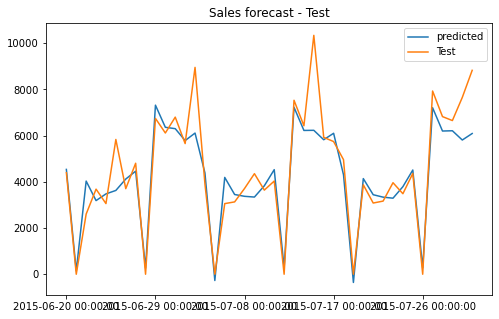

RMSE :  1092.91
MAE :  697.57


In [285]:
#assigning exog varialbles
exog = store_13_train[["Open","SchoolHoliday","Promo","DayOfWeek"]]
test_exog = store_13_test[["Open","SchoolHoliday","Promo","DayOfWeek"]]

#model building
model_s13_4 = sm.tsa.VARMAX(store_13_train_standardized[['Sales','Customers']],order =(10,9),exog=exog)
model_s13_4 = model_s13_4.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s13_4.forecast(42,exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)
prediction.reset_index(inplace=True)

#plotting
xticks = store_13_test.index

plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_13_test['Sales'].plot(label="Test")
plt.xticks(xticks,store_13_test['Date'])
plt.legend(loc='best')
plt.locator_params(axis='x', nbins=5)
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_13_test['Sales'],prediction['Sales'])



In [286]:
model = "model_s13_4"
model_type = "VARMAX"
model_para = (10,9)
exog = ["Open","SchoolHoliday","Promo","DayOfWeek"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_13 = pd.concat([result_store_13,temp_result],axis=0)
result_store_13

store       model      Rmse      Mae model_type model_para  \
0  store 13  model_s13_1  1712.25  1367.83     VARMAX    (10, 9)   
0  store 13  model_s13_2  1668.98  1311.17     VARMAX     (9, 8)   
0  store 13  model_s13_3  1123.45   703.14     VARMAX     (9, 9)   
0  store 13  model_s13_4  1092.91   697.57     VARMAX    (10, 9)   

                             exogenous var  
0                                     None  
0                                     None  
0             [Open, SchoolHoliday, Promo]  
0  [Open, SchoolHoliday, Promo, DayOfWeek]

In [287]:
# model 5

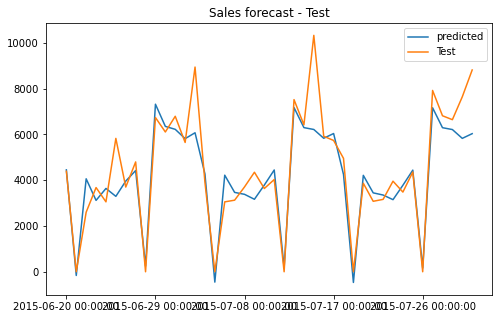

RMSE :  1124.35
MAE :  713.75


In [288]:
#assigning exog varialbles
exog = store_13_train[["Open","SchoolHoliday","Promo","DayOfWeek"]]
test_exog = store_13_test[["Open","SchoolHoliday","Promo","DayOfWeek"]]

#model building
model_s13_5 = sm.tsa.VARMAX(store_13_train_standardized[['Sales','Customers']],order =(9,8),exog=exog)
model_s13_5 = model_s13_5.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s13_5.forecast(42,exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)
prediction.reset_index(inplace=True)

#plotting
xticks = store_13_test.index

plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_13_test['Sales'].plot(label="Test")
plt.xticks(xticks,store_13_test['Date'])
plt.legend(loc='best')
plt.locator_params(axis='x', nbins=5)
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_13_test['Sales'],prediction['Sales'])



In [289]:
model = "model_s13_5"
model_type = "VARMAX"
model_para = (9,8)
exog = ["Open","SchoolHoliday","Promo","DayOfWeek"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_13 = pd.concat([result_store_13,temp_result],axis=0)
result_store_13

store       model      Rmse      Mae model_type model_para  \
0  store 13  model_s13_1  1712.25  1367.83     VARMAX    (10, 9)   
0  store 13  model_s13_2  1668.98  1311.17     VARMAX     (9, 8)   
0  store 13  model_s13_3  1123.45   703.14     VARMAX     (9, 9)   
0  store 13  model_s13_4  1092.91   697.57     VARMAX    (10, 9)   
0  store 13  model_s13_5  1124.35   713.75     VARMAX     (9, 8)   

                             exogenous var  
0                                     None  
0                                     None  
0             [Open, SchoolHoliday, Promo]  
0  [Open, SchoolHoliday, Promo, DayOfWeek]  
0  [Open, SchoolHoliday, Promo, DayOfWeek]

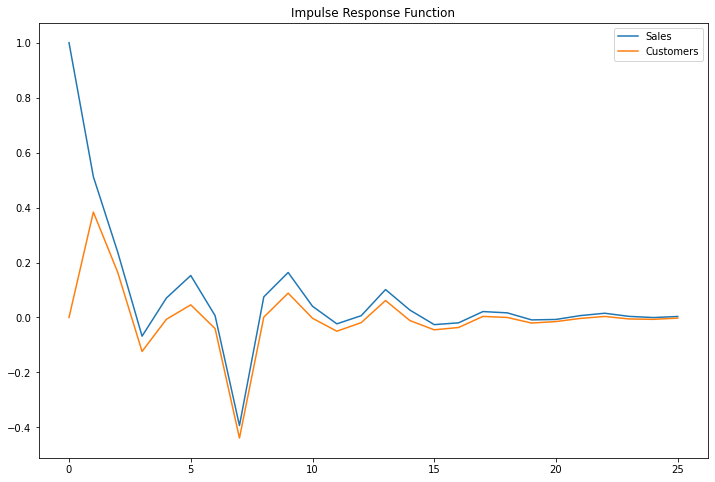

In [290]:
irf = model_s13_5.impulse_responses(steps = 25, orthogonalized= False)
irf.plot()
plt.title("Impulse Response Function")
plt.show()

### Store 25 : Forecasting sales

In [291]:
#spliting the data into train and test
store = "store 25"
store_25_train = store_25[:train_len]
store_25_test = store_25[train_len:]

print("Train data shape : ",store_25_train.shape)
print("test data shape : ",store_25_test.shape)

Train data shape :  (900, 8)
test data shape :  (42, 8)


<Figure size 1440x288 with 0 Axes>

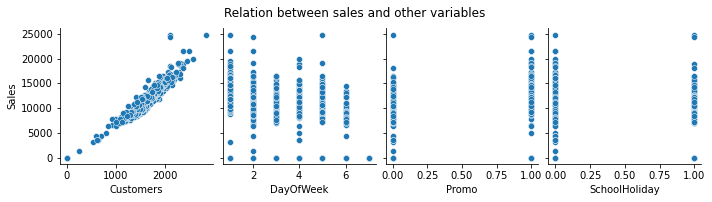

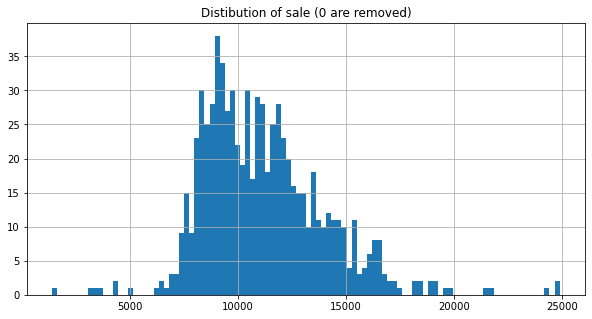

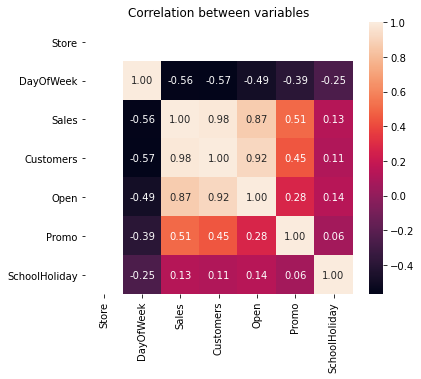

In [292]:
#visualization

visualisation(store_25)

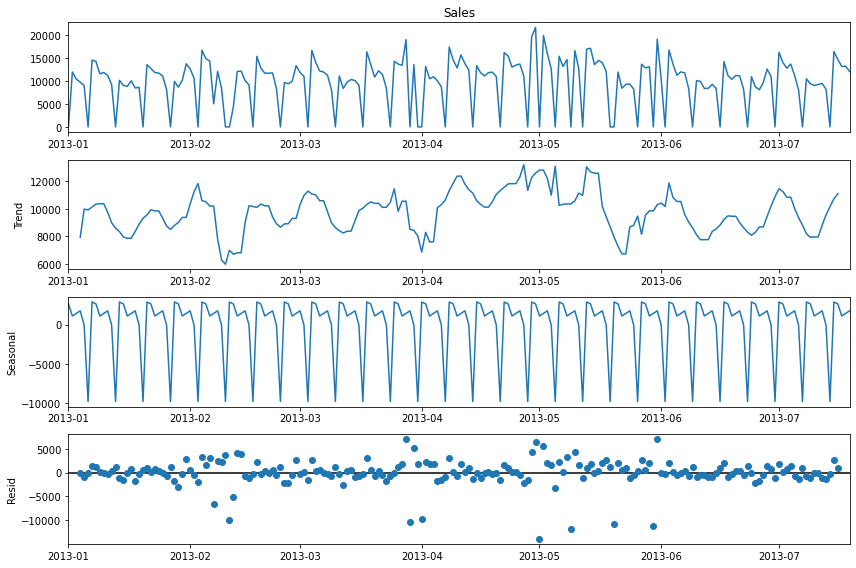

In [293]:
rcParams['figure.figsize']  =12,8
decomposition = sm.tsa.seasonal_decompose(store_25['Sales'][:200],model = 'additive')
fig = decomposition.plot()
plt.show()


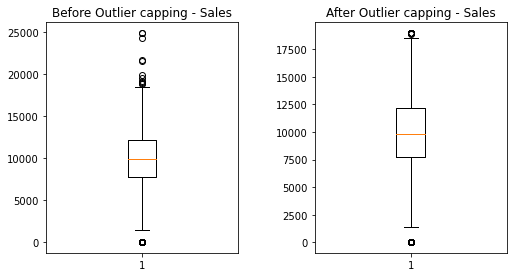

In [294]:
# outliers
store_25_train_no_outliers = store_25_train.copy()
store_25_train_no_outliers['Sales'] = outliers_treatment(store_25_train_no_outliers['Sales'],0,0.99)


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.boxplot(store_25_train['Sales'])
plt.title("Before Outlier capping - Sales")


plt.subplot(1,2,2)
plt.boxplot(store_25_train_no_outliers['Sales'])
plt.title("After Outlier capping - Sales")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 

plt.show()

In [295]:
# Johansen test to check wheather both series are cointegerated (Thogh we already know both the series are stationary from ADF test)
johnasen_test(store_25[["Sales","Customers"]])

Rank :  2
Both Series are stationary
No cointgeration


**** PACF ****
pacf value :  29
total pacf value that crossed interval :  16


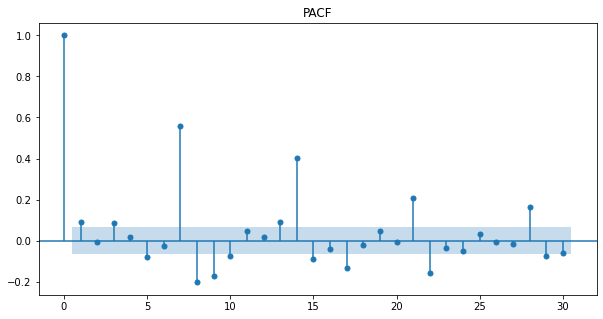



**** ACF ****
pacf value :  30
total pacf value that crossed interval :  12


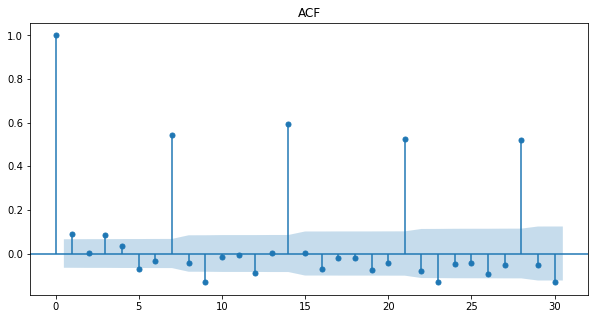

In [296]:
pacf_acf_val(store_25_train['Sales'],30)

In [297]:
#standardizing the SALES columns

standarization_column = ['Sales']
store_25_train_standardized,scaler = scaling(store_25_train_no_outliers,standarization_column)

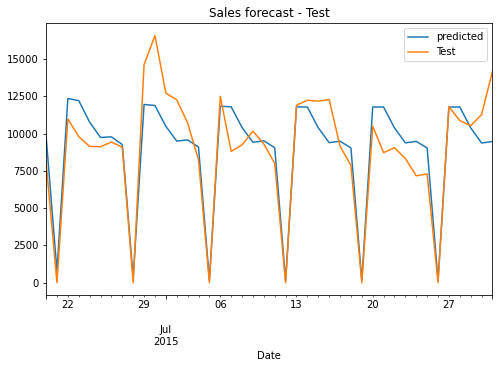

RMSE :  1781.59
MAE :  1342.96


In [298]:
#model building
model_s25_1 = ARIMA(store_25_train_standardized['Sales'],order =(7,0,7))
model_s25_1 = model_s25_1.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s25_1.predict(store_25_test.index.min(),store_25_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_25_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_25_test['Sales'],prediction['Sales'])

In [299]:
result_store_25 = pd.DataFrame()

In [300]:
model = "model_s25_1"
model_type = "ARIMA"
model_para = (7,0,7)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_25 = pd.concat([result_store_25,temp_result],axis=0)
result_store_25

store       model      Rmse      Mae model_type model_para exogenous var
0  store 25  model_s25_1  1781.59  1342.96      ARIMA  (7, 0, 7)          None

In [301]:
# model 2

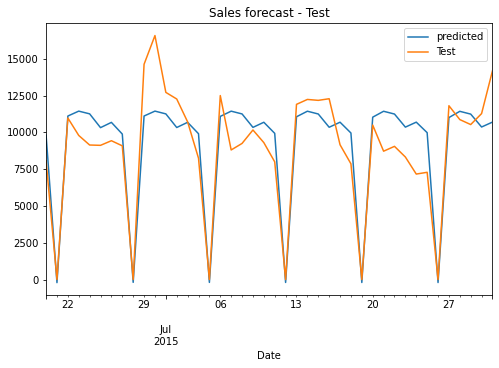

RMSE :  1848.3
MAE :  1467.91


In [302]:
#model building
model_s25_2 = ARIMA(store_25_train_standardized['Sales'],order =(7,0,9))
model_s25_2 = model_s25_2.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s25_2.predict(store_25_test.index.min(),store_25_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_25_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_25_test['Sales'],prediction['Sales'])

In [303]:
model_s25_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  900
Model:                     ARMA(7, 9)   Log Likelihood                -906.982
Method:                       css-mle   S.D. of innovations                nan
Date:                Sun, 16 Jan 2022   AIC                           1849.963
Time:                        18:31:53   BIC                           1936.406
Sample:                    01-01-2013   HQIC                          1882.985
                         - 06-19-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0681        nan        nan        nan         nan         nan
ar.L1.Sales    -0.8357   8.89e-06   -9.4e+04      0.000      -0.836      -0.836
ar.L2.Sales    -0.8358   2.55e-06  -3.28e+05      0.000      -0.836      -0.836
ar.L3.Sales    -0.8352   1.07e-06  -7.84e+05      0.000      -0.835      -0.835
ar.L4.Sales    -0.8359        nan        nan        nan         nan         nan
ar.L5.Sales    -0.8361   3.48e-06   -2.4e+05      0.000      -0.836      -0.836
ar.L6.Sales    -0.8383        nan        nan        nan         nan         nan
ar.L7.Sales     0.1621   8.08e-07   2.01e+05      0.000       0.162       0.162
ma.L1.Sales     1.0304      0.029     35.865      0.000       0.974       1.087
ma.L2.Sales     1.1818      0.043     27.440      0.000       1.097       1.266
ma.L3.Sales     1.3858      0.049     28.295      0.000       1.290       1.482
ma.L4.Sales     1.3818      0.046     29.789      0.000       1.291       1.473
ma.L5.Sales     1.4020      0.047     29.551      0.000       1.309       1.495
ma.L6.Sales     1.4040      0.042     33.627      0.000       1.322       1.486
ma.L7.Sales     0.4519      0.051      8.849      0.000       0.352       0.552
ma.L8.Sales     0.3824      0.040      9.579      0.000       0.304       0.461
ma.L9.Sales     0.2055      0.031      6.710      0.000       0.145       0.266
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9008           -0.4342j            1.0000           -0.4285
AR.2           -0.9008           +0.4342j            1.0000            0.4285
AR.3           -0.2221           -0.9750j            1.0000           -0.2856
AR.4           -0.2221           +0.9750j            1.0000            0.2856
AR.5            0.6240           -0.7814j            1.0000           -0.1428
AR.6            0.6240           +0.7814j            1.0000            0.1428
AR.7            6.1695           -0.0000j            6.1695           -0.0000
MA.1            0.6342           -0.7734j            1.0002           -0.1407
MA.2            0.6342           +0.7734j            1.0002            0.1407
MA.3           -0.2230           -0.9841j            1.0091           -0.2855
MA.4           -0.2230           +0.9841j            1.0091            0.2855
MA.5           -0.9123           -0.4373j            1.0117           -0.4289
MA.6           -0.9123           +0.4373j            1.0117            0.4289
MA.7            0.5342           -1.4616j            1.5562           -0.1942
MA.8            0.5342           +1.4616j            1.5562            0.1942
MA.9           -1.9270           -0.0000j            1.9270           -0.5000
-----------------------------------------------------------------------------
"""

In [304]:
model = "model_s25_2"
model_type = "ARIMA"
model_para = (10,0,9)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_25 = pd.concat([result_store_25,temp_result],axis=0)
result_store_25

store       model      Rmse      Mae model_type  model_para  \
0  store 25  model_s25_1  1781.59  1342.96      ARIMA   (7, 0, 7)   
0  store 25  model_s25_2  1848.30  1467.91      ARIMA  (10, 0, 9)   

  exogenous var  
0          None  
0          None

In [305]:
# model 3

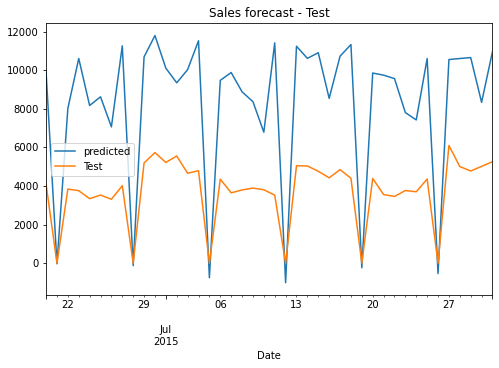

RMSE :  5089.5
MAE :  4669.18


In [306]:
#model building
model_s25_3 = SARIMAX(store_1_train_standardized['Sales'],order =(9,0,10),seasonal_order =(1,0,1,14))
model_s25_3 = model_s25_3.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s25_3.predict(store_1_test.index.min(),store_1_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_1_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_1_test['Sales'],prediction['Sales'])



In [307]:
model = "model_s25_3"
model_type = "SARIMA"
model_para = (9,0,10),(1,0,1,14)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_25 = pd.concat([result_store_25,temp_result],axis=0)
result_store_25

store       model      Rmse      Mae model_type  \
0  store 25  model_s25_1  1781.59  1342.96      ARIMA   
0  store 25  model_s25_2  1848.30  1467.91      ARIMA   
0  store 25  model_s25_3  5089.50  4669.18     SARIMA   

                    model_para exogenous var  
0                    (7, 0, 7)          None  
0                   (10, 0, 9)          None  
0  ((9, 0, 10), (1, 0, 1, 14))          None

In [308]:
# model 4

In [309]:
#standardizing the "Sales , Customers"  columns

standarization_column = ['Sales',"Customers"]
store_25_train_standardized,scaler = scaling(store_25_train_no_outliers,standarization_column)


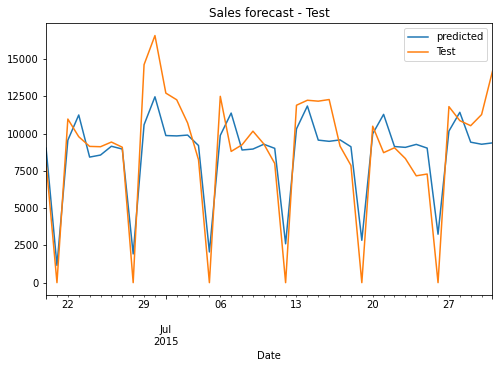

RMSE :  2015.52
MAE :  1647.54


In [310]:
#model building
model_s25_4 = sm.tsa.VARMAX(store_25_train_standardized[['Sales','Customers']],order =(7,7))
model_s25_4 = model_s25_4.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s25_4.predict(store_25_test.index.min(),store_25_test.index.max())



# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_25_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_25_test['Sales'],prediction['Sales'])

In [311]:
model = "model_s25_4"
model_type = "VARMAX"
model_para = (7,7)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_25 = pd.concat([result_store_25,temp_result],axis=0)
result_store_25

store       model      Rmse      Mae model_type  \
0  store 25  model_s25_1  1781.59  1342.96      ARIMA   
0  store 25  model_s25_2  1848.30  1467.91      ARIMA   
0  store 25  model_s25_3  5089.50  4669.18     SARIMA   
0  store 25  model_s25_4  2015.52  1647.54    VARIMAX   

                    model_para exogenous var  
0                    (7, 0, 7)          None  
0                   (10, 0, 9)          None  
0  ((9, 0, 10), (1, 0, 1, 14))          None  
0                       (7, 7)          None

In [312]:
# model 5

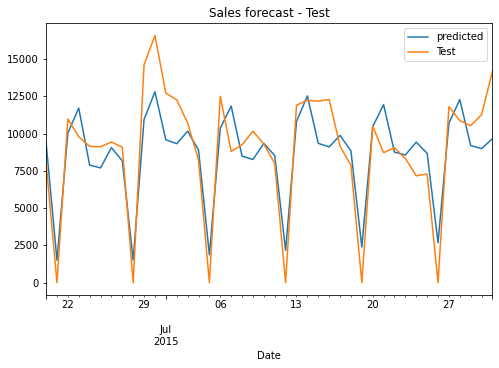

RMSE :  2015.9
MAE :  1679.78


In [313]:
#model building
model_s25_5 = sm.tsa.VARMAX(store_25_train_standardized[['Sales','Customers']],order =(9,10))
model_s25_5 = model_s25_5.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s25_5.predict(store_25_test.index.min(),store_25_test.index.max())



# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_25_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_25_test['Sales'],prediction['Sales'])

In [314]:
model = "model_s25_5"
model_type = "VARMAX"
model_para = (9,10)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_25 = pd.concat([result_store_25,temp_result],axis=0)
result_store_25

store       model      Rmse      Mae model_type  \
0  store 25  model_s25_1  1781.59  1342.96      ARIMA   
0  store 25  model_s25_2  1848.30  1467.91      ARIMA   
0  store 25  model_s25_3  5089.50  4669.18     SARIMA   
0  store 25  model_s25_4  2015.52  1647.54    VARIMAX   
0  store 25  model_s25_5  2015.90  1679.78    VARIMAX   

                    model_para exogenous var  
0                    (7, 0, 7)          None  
0                   (10, 0, 9)          None  
0  ((9, 0, 10), (1, 0, 1, 14))          None  
0                       (7, 7)          None  
0                      (9, 10)          None

In [315]:
# model

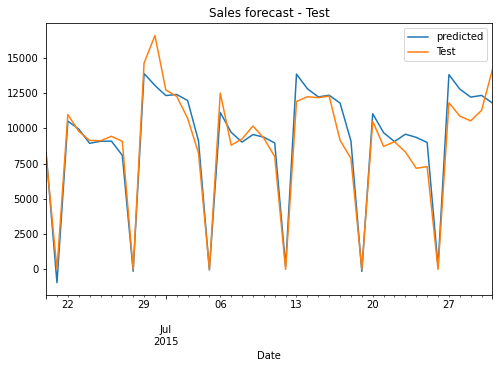

RMSE :  1220.35
MAE :  890.51


In [316]:
#assigning exog varialbles
exog = store_25_train[["Open","SchoolHoliday","Promo"]]
test_exog = store_25_test[["Open","SchoolHoliday","Promo"]]

#model building
model_s25_6 = sm.tsa.VARMAX(store_25_train_standardized[['Sales','Customers']],order =(9,10),exog=exog)
model_s25_6 = model_s25_6.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s25_6.predict(store_25_test.index.min(),store_25_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_25_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_25_test['Sales'],prediction['Sales'])

In [317]:
model = "model_s25_6"
model_type = "VARMAX"
model_para = (9,10)
exog = ["Open","SchoolHoliday","Promo"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_25 = pd.concat([result_store_25,temp_result],axis=0)
result_store_25

store       model      Rmse      Mae model_type  \
0  store 25  model_s25_1  1781.59  1342.96      ARIMA   
0  store 25  model_s25_2  1848.30  1467.91      ARIMA   
0  store 25  model_s25_3  5089.50  4669.18     SARIMA   
0  store 25  model_s25_4  2015.52  1647.54    VARIMAX   
0  store 25  model_s25_5  2015.90  1679.78    VARIMAX   
0  store 25  model_s25_6  1220.35   890.51    VARIMAX   

                    model_para                 exogenous var  
0                    (7, 0, 7)                          None  
0                   (10, 0, 9)                          None  
0  ((9, 0, 10), (1, 0, 1, 14))                          None  
0                       (7, 7)                          None  
0                      (9, 10)                          None  
0                      (9, 10)  [Open, SchoolHoliday, Promo]

In [318]:
# model 7

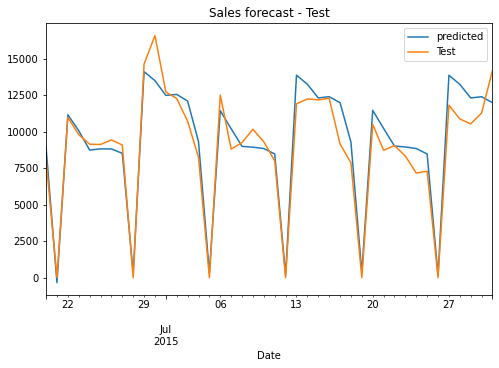

RMSE :  1214.92
MAE :  933.67


In [319]:
#assigning exog varialbles
exog = store_25_train[["Open","SchoolHoliday","Promo","DayOfWeek"]]
test_exog = store_25_test[["Open","SchoolHoliday","Promo","DayOfWeek"]]

#model building
model_s25_7 = sm.tsa.VARMAX(store_25_train_standardized[['Sales','Customers']],order =(7,14),exog=exog)
model_s25_7 = model_s25_7.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s25_7.predict(store_25_test.index.min(),store_25_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_25_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_25_test['Sales'],prediction['Sales'])

In [320]:
model = "model_s25_7"
model_type = "VARMAX"
model_para = (7,14)
exog = ["Open","SchoolHoliday","Promo","DayOfWeek"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_25 = pd.concat([result_store_25,temp_result],axis=0)
result_store_25

store       model      Rmse      Mae model_type  \
0  store 25  model_s25_1  1781.59  1342.96      ARIMA   
0  store 25  model_s25_2  1848.30  1467.91      ARIMA   
0  store 25  model_s25_3  5089.50  4669.18     SARIMA   
0  store 25  model_s25_4  2015.52  1647.54    VARIMAX   
0  store 25  model_s25_5  2015.90  1679.78    VARIMAX   
0  store 25  model_s25_6  1220.35   890.51    VARIMAX   
0  store 25  model_s25_7  1214.92   933.67    VARIMAX   

                    model_para                            exogenous var  
0                    (7, 0, 7)                                     None  
0                   (10, 0, 9)                                     None  
0  ((9, 0, 10), (1, 0, 1, 14))                                     None  
0                       (7, 7)                                     None  
0                      (9, 10)                                     None  
0                      (9, 10)             [Open, SchoolHoliday, Promo]  
0                    (7, 0, 7)  [Open, SchoolHoliday, Promo, DayOfWeek]

In [321]:
# model 8

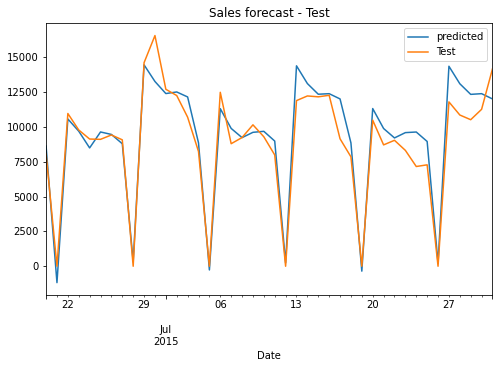

RMSE :  1295.27
MAE :  963.74


In [322]:
#assigning exog varialbles
exog = store_25_train[["Open","SchoolHoliday","Promo","DayOfWeek"]]
test_exog = store_25_test[["Open","SchoolHoliday","Promo","DayOfWeek"]]

#model building
model_s25_8 = sm.tsa.VARMAX(store_25_train_standardized[['Sales','Customers']],order =(10,9),exog=exog)
model_s25_8 = model_s25_8.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s25_8.predict(store_25_test.index.min(),store_25_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_25_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_25_test['Sales'],prediction['Sales'])

In [323]:
model = "model_s25_8"
model_type = "VARMAX"
model_para = (10,9)
exog = ["Open","SchoolHoliday","Promo","DayOfWeek"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_25 = pd.concat([result_store_25,temp_result],axis=0)
result_store_25

store       model      Rmse      Mae model_type  \
0  store 25  model_s25_1  1781.59  1342.96      ARIMA   
0  store 25  model_s25_2  1848.30  1467.91      ARIMA   
0  store 25  model_s25_3  5089.50  4669.18     SARIMA   
0  store 25  model_s25_4  2015.52  1647.54    VARIMAX   
0  store 25  model_s25_5  2015.90  1679.78    VARIMAX   
0  store 25  model_s25_6  1220.35   890.51    VARIMAX   
0  store 25  model_s25_7  1214.92   933.67    VARIMAX   
0  store 25  model_s25_8  1295.27   963.74    VARIMAX   

                    model_para                            exogenous var  
0                    (7, 0, 7)                                     None  
0                   (10, 0, 9)                                     None  
0  ((9, 0, 10), (1, 0, 1, 14))                                     None  
0                       (7, 7)                                     None  
0                      (9, 10)                                     None  
0                      (9, 10)             [Open, SchoolHoliday, Promo]  
0                    (7, 0, 7)  [Open, SchoolHoliday, Promo, DayOfWeek]  
0                    (7, 0, 7)  [Open, SchoolHoliday, Promo, DayOfWeek]

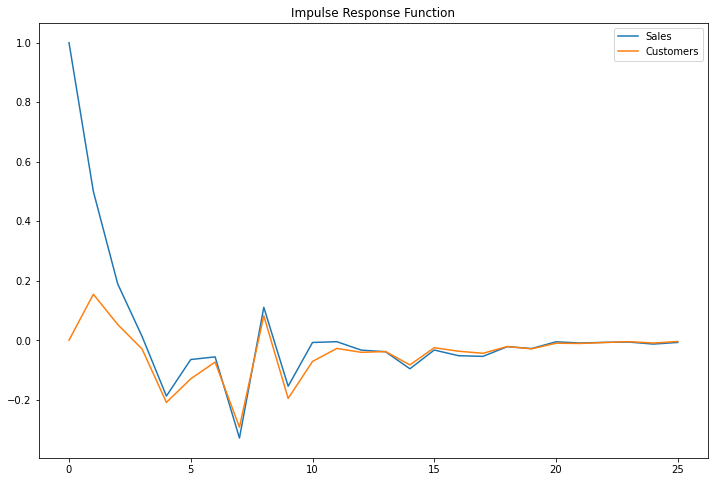

In [324]:
irf = model_s25_8.impulse_responses(steps = 25, orthogonalized= False)
irf.plot()
plt.title("Impulse Response Function")
plt.show()

### Store 29 : Forecasting sales

In [325]:
#spliting the data into train and test
store = "store 29"
store_29_train = store_29[:train_len]
store_29_test = store_29[train_len:]

print("Train data shape : ",store_29_train.shape)
print("test data shape : ",store_29_test.shape)

Train data shape :  (900, 8)
test data shape :  (42, 8)


In [326]:
adf_test(store_29['Sales'],store_29['Customers'])

adf sale statistics :  -3.4244922070734214
sales data p-value:  0.010151736806426821
----------
adf cutomer statistics :  -3.2662799157211166
customer data p-value:  0.016454712815192906
**********
sales data is STATIONARY
customer data is STATIONARY
**********


<Figure size 1440x288 with 0 Axes>

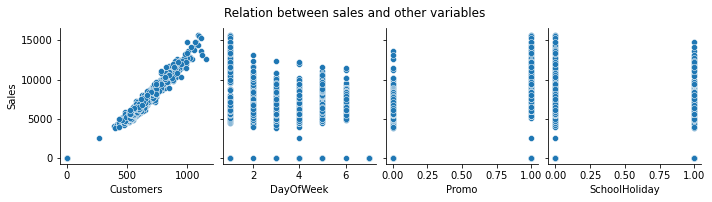

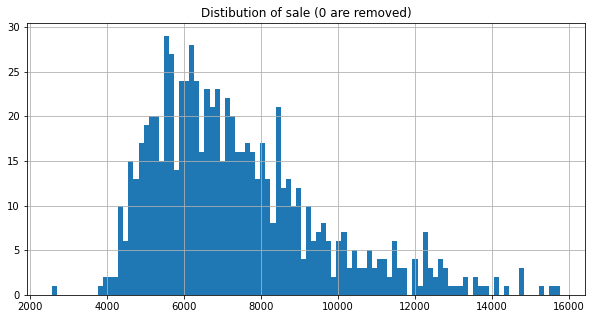

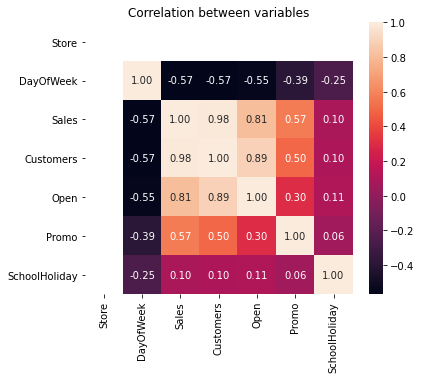

In [327]:
#visualization

visualisation(store_29)

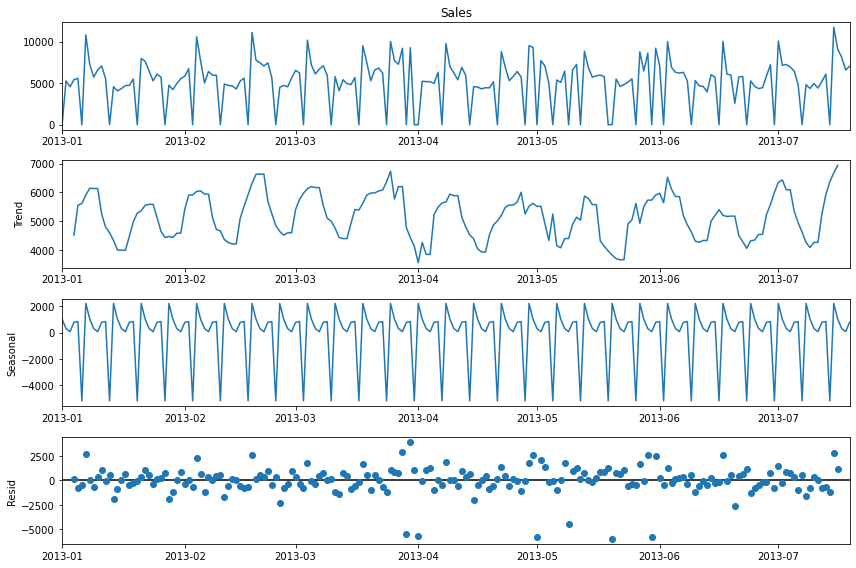

In [328]:
rcParams['figure.figsize']  =12,8
decomposition = sm.tsa.seasonal_decompose(store_29['Sales'][:200],model = 'additive')
fig = decomposition.plot()
plt.show()

#reducing the size of dataset to see the seasonal pattern clearly

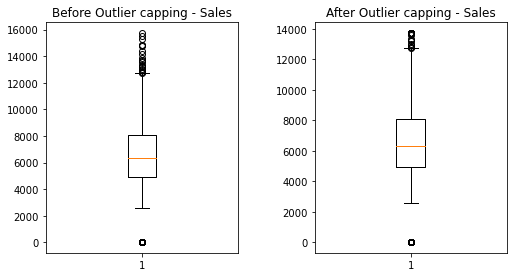

In [329]:
# outliers
store_29_train_no_outliers = store_29_train.copy()
store_29_train_no_outliers['Sales'] = outliers_treatment(store_29_train_no_outliers['Sales'],0,0.99)


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.boxplot(store_29_train['Sales'])
plt.title("Before Outlier capping - Sales")


plt.subplot(1,2,2)
plt.boxplot(store_29_train_no_outliers['Sales'])
plt.title("After Outlier capping - Sales")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 

plt.show()

In [330]:
# Johansen test to check wheather both series are cointegerated (Thogh we already know both the series are stationary from ADF test)
johnasen_test(store_29[["Sales","Customers"]])

Rank :  2
Both Series are stationary
No cointgeration


**** PACF ****
pacf value :  28
total pacf value that crossed interval :  16


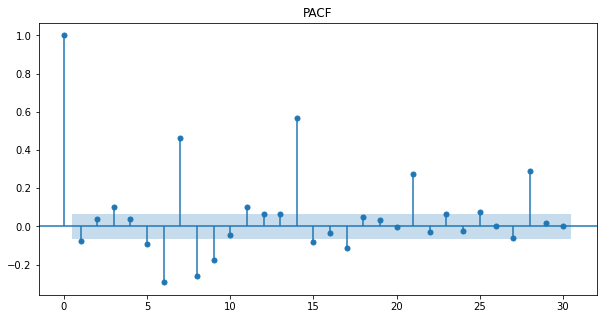



**** ACF ****
pacf value :  28
total pacf value that crossed interval :  16


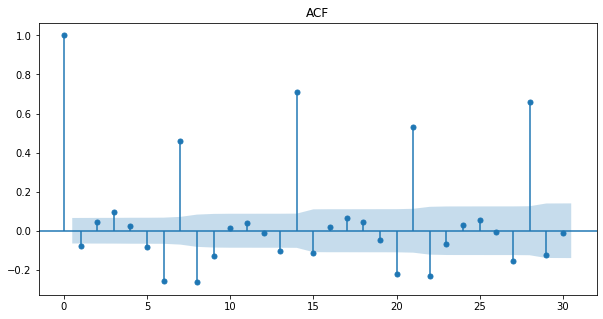

In [331]:
pacf_acf_val(store_29_train['Sales'],30)

In [332]:
#standardizing the SALES columns

standarization_column = ['Sales']
store_29_train_standardized,scaler = scaling(store_29_train_no_outliers,standarization_column)

In [333]:
#m model 1

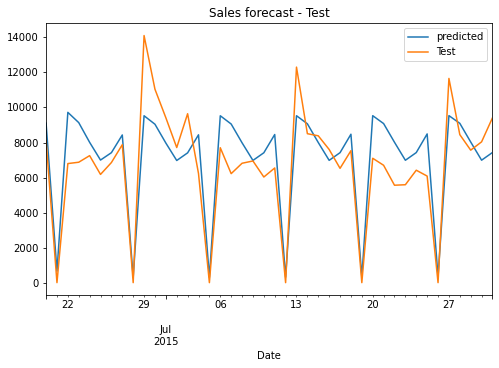

RMSE :  1690.11
MAE :  1380.49


In [334]:
#model building
model_s29_1 = ARIMA(store_29_train_standardized['Sales'],order =(9,0,7))
model_s29_1 = model_s29_1.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s29_1.predict(store_29_test.index.min(),store_29_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_29_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_29_test['Sales'],prediction['Sales'])

In [335]:
result_store_29 = pd.DataFrame()

In [336]:
model = "model_s29_1"
model_type = "ARIMA"
model_para = (9,0,7)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_29 = pd.concat([result_store_29,temp_result],axis=0)
result_store_29

store       model      Rmse      Mae model_type model_para exogenous var
0  store 29  model_s29_1  1690.11  1380.49      ARIMA  (9, 0, 7)          None

In [337]:
# model 2

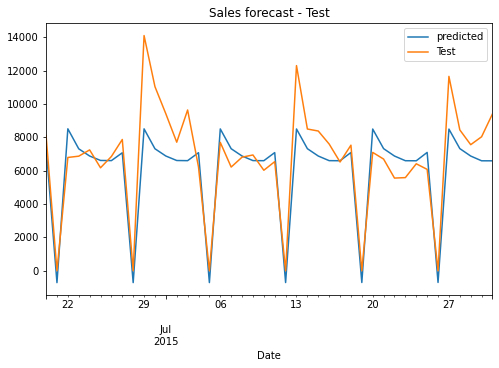

RMSE :  1690.8
MAE :  1236.3


In [338]:
#model building
model_s29_2 = ARIMA(store_29_train_standardized['Sales'],order =(7,0,8))
model_s29_2 = model_s29_2.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s29_2.predict(store_29_test.index.min(),store_29_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_29_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_29_test['Sales'],prediction['Sales'])

In [339]:
model = "model_s29_2"
model_type = "ARIMA"
model_para = (7,0,8)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_29 = pd.concat([result_store_29,temp_result],axis=0)
result_store_29

store       model      Rmse      Mae model_type model_para exogenous var
0  store 29  model_s29_1  1690.11  1380.49      ARIMA  (9, 0, 7)          None
0  store 29  model_s29_2  1690.80  1236.30      ARIMA  (7, 0, 8)          None

In [340]:
# model 3

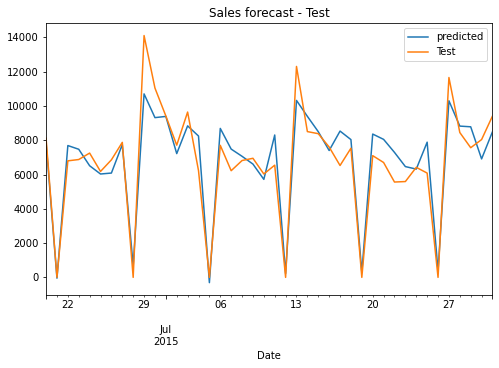

RMSE :  1131.07
MAE :  872.06


In [341]:
#model building
model_s29_3 = SARIMAX(store_29_train_standardized['Sales'],order =(11,0,9),seasonal_order =(1,0,1,14))
model_s29_3 = model_s29_3.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s29_3.predict(store_29_test.index.min(),store_29_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_29_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_29_test['Sales'],prediction['Sales'])

In [342]:
model = "model_s29_3"
model_type = "SARIMA"
model_para = (11,0,9),(1,0,1,14)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_29 = pd.concat([result_store_29,temp_result],axis=0)
result_store_29

store       model      Rmse      Mae model_type  \
0  store 29  model_s29_1  1690.11  1380.49      ARIMA   
0  store 29  model_s29_2  1690.80  1236.30      ARIMA   
0  store 29  model_s29_3  1131.07   872.06     SARIMA   

                    model_para exogenous var  
0                    (9, 0, 7)          None  
0                    (7, 0, 8)          None  
0  ((11, 0, 9), (1, 0, 1, 14))          None

In [343]:
# model 4

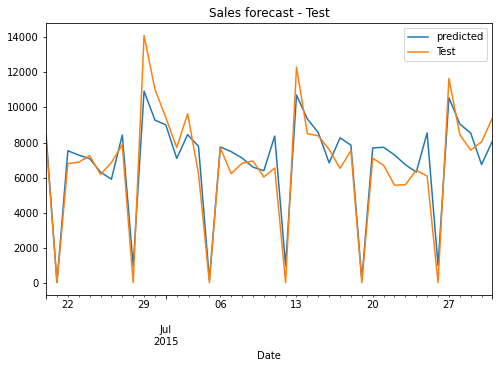

RMSE :  1117.76
MAE :  884.98


In [344]:
#model building
model_s29_4 = SARIMAX(store_29_train_standardized['Sales'],order =(9,0,9),seasonal_order =(1,0,1,14))
model_s29_4 = model_s29_4.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s29_4.predict(store_29_test.index.min(),store_29_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_29_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_29_test['Sales'],prediction['Sales'])

In [345]:
model = "model_s29_4"
model_type = "SARIMA"
model_para = (9,0,9),(1,0,1,14)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_29 = pd.concat([result_store_29,temp_result],axis=0)
result_store_29

store       model      Rmse      Mae model_type  \
0  store 29  model_s29_1  1690.11  1380.49      ARIMA   
0  store 29  model_s29_2  1690.80  1236.30      ARIMA   
0  store 29  model_s29_3  1131.07   872.06     SARIMA   
0  store 29  model_s29_4  1117.76   884.98     SARIMA   

                    model_para exogenous var  
0                    (9, 0, 7)          None  
0                    (7, 0, 8)          None  
0  ((11, 0, 9), (1, 0, 1, 14))          None  
0   ((9, 0, 9), (1, 0, 1, 14))          None

In [346]:
# model 5

In [347]:
#standardizing the "Sales , Customers"  columns

standarization_column = ['Sales',"Customers"]
store_29_train_standardized,scaler = scaling(store_29_train_no_outliers,standarization_column)


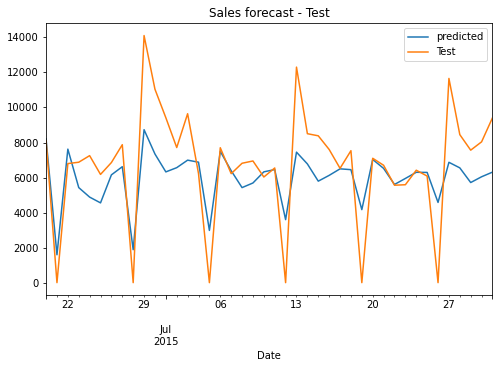

RMSE :  2311.05
MAE :  1750.07


In [348]:
#model building
model_s29_5 = sm.tsa.VARMAX(store_29_train_standardized[['Sales','Customers']],order =(10,14))
model_s29_5 = model_s29_5.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s29_5.predict(store_29_test.index.min(),store_29_test.index.max())



# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_29_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_29_test['Sales'],prediction['Sales'])

In [349]:
model_s29_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                             
==================================================================================
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                       VARMA(10,14)   Log Likelihood                -308.576
                              + intercept   AIC                            819.152
Date:                    Sun, 16 Jan 2022   BIC                           1304.193
Time:                            18:47:51   HQIC                          1004.441
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
===================================================================================
Ljung-Box (L1) (Q):             0.00, 0.03   Jarque-Bera (JB):        356.92, 40.39
Prob(Q):                        0.96, 0.87   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.80, 1.60   Skew:                     -0.36, -0.36
Prob(H) (two-sided):            0.00, 0.00   Kurtosis:                   6.00, 3.75
                             Results for equation Sales                             
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -0.0013      3.587     -0.000      1.000      -7.031       7.029
L1.Sales             1.7449   3268.086      0.001      1.000   -6403.587    6407.076
L1.Customers        -1.9096   2583.696     -0.001      0.999   -5065.860    5062.041
L2.Sales             0.7504   4999.506      0.000      1.000   -9798.102    9799.603
L2.Customers        -0.7112   5942.919     -0.000      1.000   -1.16e+04    1.16e+04
L3.Sales             0.3995   3733.921      0.000      1.000   -7317.951    7318.750
L3.Customers        -0.3407   4240.735  -8.03e-05      1.000   -8312.029    8311.347
L4.Sales             0.0604   1351.445   4.47e-05      1.000   -2648.722    2648.843
L4.Customers        -0.0102   1962.416  -5.21e-06      1.000   -3846.276    3846.255
L5.Sales             0.0564   1836.601   3.07e-05      1.000   -3599.616    3599.729
L5.Customers        -0.0628   2269.532  -2.77e-05      1.000   -4448.263    4448.137
L6.Sales            -0.6879   2168.262     -0.000      1.000   -4250.404    4249.028
L6.Customers         0.5737   2367.621      0.000      1.000   -4639.878    4641.026
L7.Sales            -1.9209   2212.714     -0.001      0.999   -4338.760    4334.918
L7.Customers         2.2328   2188.613      0.001      0.999   -4287.370    4291.836
L8.Sales             0.5878   1897.679      0.000      1.000   -3718.795    3719.971
L8.Customers        -0.6217   2406.705     -0.000      1.000   -4717.676    4716.433
L9.Sales             0.4742   3282.112      0.000      1.000   -6432.348    6433.296
L9.Customers        -0.4748   4327.742     -0.000      1.000   -8482.693    8481.744
L10.Sales            0.0013   3976.125   3.27e-07      1.000   -7793.060    7793.063
L10.Customers        0.0160   4909.584   3.25e-06      1.000   -9622.592    9622.624
L1.e(Sales)               0   3268.075          0      1.000   -6405.309    6405.309
L1.e(Customers)          -0   2583.675         -0      1.000   -5063.910    5063.910
L2.e(Sales)              -0   7703.140         -0      1.000   -1.51e+04    1.51e+04
L2.e(Customers)           0   8793.772          0      1.000   -1.72e+04    1.72e+04
L3.e(Sales)               0   3324.762          0      1.000   -6516.413    6516.413
L3.e(Customers)          -0   4691.532         -0      1.000   -9195.233    9195.233
L4.e(Sales)               0   1101.658          0      1.000   -215

In [350]:
model = "model_s29_5"
model_type = "VARMAX"
model_para = (10,14)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_29 = pd.concat([result_store_29,temp_result],axis=0)
result_store_29

store       model      Rmse      Mae model_type  \
0  store 29  model_s29_1  1690.11  1380.49      ARIMA   
0  store 29  model_s29_2  1690.80  1236.30      ARIMA   
0  store 29  model_s29_3  1131.07   872.06     SARIMA   
0  store 29  model_s29_4  1117.76   884.98     SARIMA   
0  store 29  model_s29_5  2311.05  1750.07     VARMAX   

                    model_para exogenous var  
0                    (9, 0, 7)          None  
0                    (7, 0, 8)          None  
0  ((11, 0, 9), (1, 0, 1, 14))          None  
0   ((9, 0, 9), (1, 0, 1, 14))          None  
0                     (10, 14)          None

In [351]:
#model 6

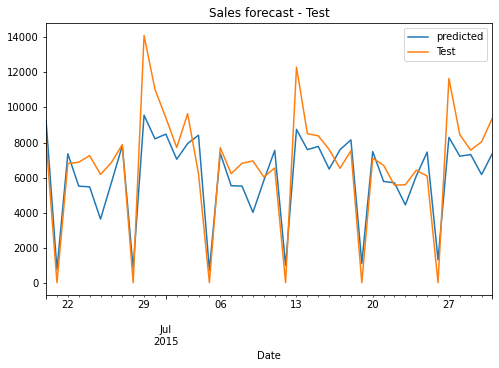

RMSE :  1626.49
MAE :  1296.98


In [352]:
#model building
model_s29_6 = sm.tsa.VARMAX(store_29_train_standardized[['Sales','Customers']],order =(10,9))
model_s29_6 = model_s29_6.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s29_6.predict(store_29_test.index.min(),store_29_test.index.max())



# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_29_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_29_test['Sales'],prediction['Sales'])

In [353]:
model = "model_s29_6"
model_type = "VARMAX"
model_para = (10,9)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_29 = pd.concat([result_store_29,temp_result],axis=0)
result_store_29

store       model      Rmse      Mae model_type  \
0  store 29  model_s29_1  1690.11  1380.49      ARIMA   
0  store 29  model_s29_2  1690.80  1236.30      ARIMA   
0  store 29  model_s29_3  1131.07   872.06     SARIMA   
0  store 29  model_s29_4  1117.76   884.98     SARIMA   
0  store 29  model_s29_5  2311.05  1750.07     VARMAX   
0  store 29  model_s29_6  1626.49  1296.98     VARMAX   

                    model_para exogenous var  
0                    (9, 0, 7)          None  
0                    (7, 0, 8)          None  
0  ((11, 0, 9), (1, 0, 1, 14))          None  
0   ((9, 0, 9), (1, 0, 1, 14))          None  
0                     (10, 14)          None  
0                      (10, 9)          None

In [354]:
#model 7

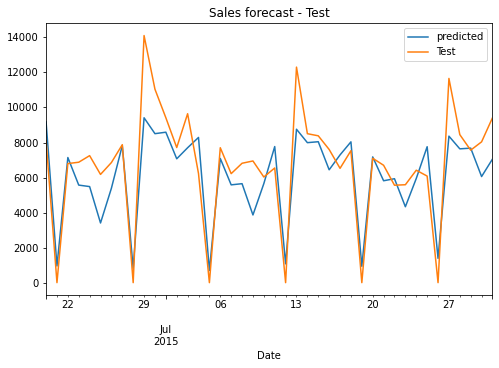

RMSE :  1651.16
MAE :  1299.07


In [355]:
#model building
model_s29_7 = sm.tsa.VARMAX(store_29_train_standardized[['Sales','Customers']],order =(9,9))
model_s29_7 = model_s29_7.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s29_7.predict(store_29_test.index.min(),store_29_test.index.max())



# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_29_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_29_test['Sales'],prediction['Sales'])

In [356]:
model = "model_s29_7"
model_type = "VARMAX"
model_para = (9,9)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_29 = pd.concat([result_store_29,temp_result],axis=0)
result_store_29

store       model      Rmse      Mae model_type  \
0  store 29  model_s29_1  1690.11  1380.49      ARIMA   
0  store 29  model_s29_2  1690.80  1236.30      ARIMA   
0  store 29  model_s29_3  1131.07   872.06     SARIMA   
0  store 29  model_s29_4  1117.76   884.98     SARIMA   
0  store 29  model_s29_5  2311.05  1750.07     VARMAX   
0  store 29  model_s29_6  1626.49  1296.98     VARMAX   
0  store 29  model_s29_7  1651.16  1299.07     VARMAX   

                    model_para exogenous var  
0                    (9, 0, 7)          None  
0                    (7, 0, 8)          None  
0  ((11, 0, 9), (1, 0, 1, 14))          None  
0   ((9, 0, 9), (1, 0, 1, 14))          None  
0                     (10, 14)          None  
0                      (10, 9)          None  
0                       (9, 9)          None

In [357]:
#model 8

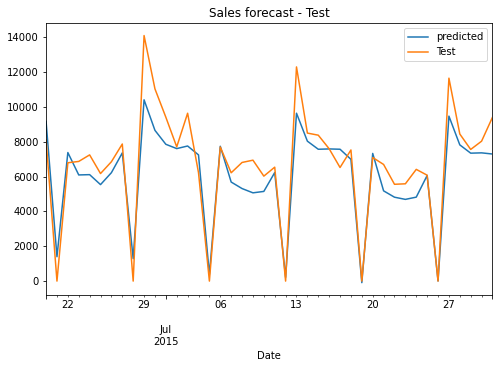

RMSE :  1264.65
MAE :  971.89


In [358]:
#assigning exog varialbles
exog = store_29_train[["Open","SchoolHoliday","Promo"]]
test_exog = store_29_test[["Open","SchoolHoliday","Promo"]]

#model building
model_s29_8 = sm.tsa.VARMAX(store_29_train_standardized[['Sales','Customers']],order =(9,9),exog=exog)
model_s29_8 = model_s29_8.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s29_8.predict(store_29_test.index.min(),store_29_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_29_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_29_test['Sales'],prediction['Sales'])

In [359]:
model = "model_s29_8"
model_type = "VARMAX"
model_para = (9,9)
exog = ["Open","SchoolHoliday","Promo"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_29 = pd.concat([result_store_29,temp_result],axis=0)
result_store_29

store       model      Rmse      Mae model_type  \
0  store 29  model_s29_1  1690.11  1380.49      ARIMA   
0  store 29  model_s29_2  1690.80  1236.30      ARIMA   
0  store 29  model_s29_3  1131.07   872.06     SARIMA   
0  store 29  model_s29_4  1117.76   884.98     SARIMA   
0  store 29  model_s29_5  2311.05  1750.07     VARMAX   
0  store 29  model_s29_6  1626.49  1296.98     VARMAX   
0  store 29  model_s29_7  1651.16  1299.07     VARMAX   
0  store 29  model_s29_8  1264.65   971.89     VARMAX   

                    model_para                 exogenous var  
0                    (9, 0, 7)                          None  
0                    (7, 0, 8)                          None  
0  ((11, 0, 9), (1, 0, 1, 14))                          None  
0   ((9, 0, 9), (1, 0, 1, 14))                          None  
0                     (10, 14)                          None  
0                      (10, 9)                          None  
0                       (9, 9)                          None  
0                       (9, 9)  [Open, SchoolHoliday, Promo]

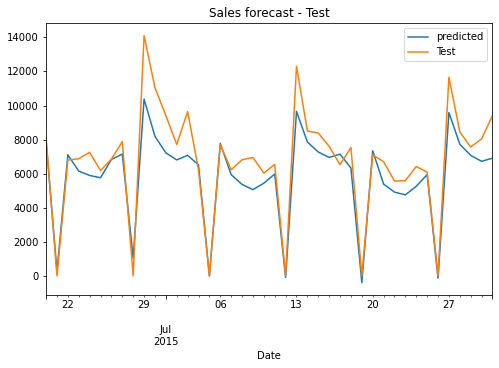

RMSE :  1323.77
MAE :  986.69


In [360]:
#assigning exog varialbles
exog = store_29_train[["Open","SchoolHoliday","Promo","DayOfWeek"]]
test_exog = store_29_test[["Open","SchoolHoliday","Promo","DayOfWeek"]]

#model building
model_s29_9 = sm.tsa.VARMAX(store_29_train_standardized[['Sales','Customers']],order =(10,9),exog=exog)
model_s29_9 = model_s29_9.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s29_9.predict(store_29_test.index.min(),store_29_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_29_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_29_test['Sales'],prediction['Sales'])

In [361]:
model_s29_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                             
==================================================================================
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                       VARMAX(10,9)   Log Likelihood                 282.366
                              + intercept   AIC                           -386.733
Date:                    Sun, 16 Jan 2022   BIC                             40.680
Time:                            18:54:59   HQIC                          -223.458
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
===================================================================================
Ljung-Box (L1) (Q):             1.61, 7.75   Jarque-Bera (JB):       614.59, 920.76
Prob(Q):                        0.20, 0.01   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.90, 1.21   Skew:                     -0.76, -0.54
Prob(H) (two-sided):            0.00, 0.10   Kurtosis:                   6.75, 7.83
                              Results for equation Sales                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              0.0487      0.152      0.320      0.749      -0.250       0.347
L1.Sales               1.3689      0.291      4.697      0.000       0.798       1.940
L1.Customers          -1.4116      0.238     -5.920      0.000      -1.879      -0.944
L2.Sales               0.4721      0.387      1.220      0.222      -0.286       1.230
L2.Customers          -0.3777      0.348     -1.084      0.278      -1.060       0.305
L3.Sales              -0.4901      0.332     -1.478      0.139      -1.140       0.160
L3.Customers           0.4554      0.331      1.375      0.169      -0.194       1.104
L4.Sales              -0.2121      0.331     -0.640      0.522      -0.862       0.437
L4.Customers           0.2578      0.319      0.809      0.418      -0.366       0.882
L5.Sales               0.7389      0.297      2.487      0.013       0.157       1.321
L5.Customers          -0.7104      0.285     -2.492      0.013      -1.269      -0.152
L6.Sales              -0.0599      0.359     -0.167      0.868      -0.764       0.645
L6.Customers          -0.0884      0.356     -0.248      0.804      -0.787       0.610
L7.Sales              -0.9926      0.264     -3.765      0.000      -1.509      -0.476
L7.Customers           1.3221      0.267      4.948      0.000       0.798       1.846
L8.Sales               0.2547      0.351      0.725      0.469      -0.434       0.944
L8.Customers          -0.1324      0.414     -0.320      0.749      -0.943       0.679
L9.Sales               0.1690      0.297      0.570      0.569      -0.412       0.750
L9.Customers           0.0069      0.341      0.020      0.984      -0.662       0.676
L10.Sales             -0.2589      0.216     -1.200      0.230      -0.682       0.164
L10.Customers          0.4193      0.223      1.877      0.060      -0.018       0.857
L1.e(Sales)           -0.0234      0.313     -0.075      0.940      -0.637       0.590
L1.e(Customers)       -0.0020      0.316     -0.006      0.995      -0.621       0.617
L2.e(Sales)           -0.0671      0.297     -0.226      0.821      -0.649       0.515
L2.e(Customers)       -0.0986      0.307     -0.321      0.748      -0.701       0.503
L3.e(Sales)            0.0980      0.245      0.400      0.689      -0.382       0.578
L3.e(Customers)        0.0296      0.273      0.108      0.914      -0.506       0.565
L4.e(

In [362]:
model = "model_s29_9"
model_type = "VARMAX"
model_para = (10,9)
exog = ["Open","SchoolHoliday","Promo","DayOfWeek"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_29 = pd.concat([result_store_29,temp_result],axis=0)
result_store_29

store       model      Rmse      Mae model_type  \
0  store 29  model_s29_1  1690.11  1380.49      ARIMA   
0  store 29  model_s29_2  1690.80  1236.30      ARIMA   
0  store 29  model_s29_3  1131.07   872.06     SARIMA   
0  store 29  model_s29_4  1117.76   884.98     SARIMA   
0  store 29  model_s29_5  2311.05  1750.07     VARMAX   
0  store 29  model_s29_6  1626.49  1296.98     VARMAX   
0  store 29  model_s29_7  1651.16  1299.07     VARMAX   
0  store 29  model_s29_8  1264.65   971.89     VARMAX   
0  store 29  model_s29_9  1323.77   986.69     VARMAX   

                    model_para                            exogenous var  
0                    (9, 0, 7)                                     None  
0                    (7, 0, 8)                                     None  
0  ((11, 0, 9), (1, 0, 1, 14))                                     None  
0   ((9, 0, 9), (1, 0, 1, 14))                                     None  
0                     (10, 14)                                     None  
0                      (10, 9)                                     None  
0                       (9, 9)                                     None  
0                       (9, 9)             [Open, SchoolHoliday, Promo]  
0                      (10, 9)  [Open, SchoolHoliday, Promo, DayOfWeek]

In [363]:
# model 10

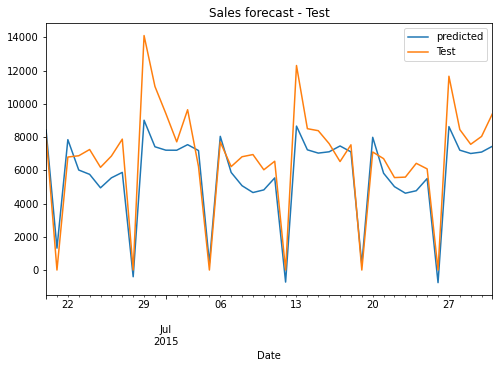

RMSE :  1653.73
MAE :  1309.26


In [364]:
#assigning exog varialbles
exog = store_29_train[["Open","SchoolHoliday","Promo","DayOfWeek"]]
test_exog = store_29_test[["Open","SchoolHoliday","Promo","DayOfWeek"]]

#model building
model_s29_10 = sm.tsa.VARMAX(store_29_train_standardized[['Sales','Customers']],order =(7,7),exog=exog)
model_s29_10 = model_s29_10.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s29_10.predict(store_29_test.index.min(),store_29_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_29_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_29_test['Sales'],prediction['Sales'])

In [365]:
model = "model_s29_10"
model_type = "VARMAX"
model_para = (9,9)
exog = ["Open","SchoolHoliday","Promo","DayOfWeek"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_29 = pd.concat([result_store_29,temp_result],axis=0)
result_store_29

store        model      Rmse      Mae model_type  \
0  store 29   model_s29_1  1690.11  1380.49      ARIMA   
0  store 29   model_s29_2  1690.80  1236.30      ARIMA   
0  store 29   model_s29_3  1131.07   872.06     SARIMA   
0  store 29   model_s29_4  1117.76   884.98     SARIMA   
0  store 29   model_s29_5  2311.05  1750.07     VARMAX   
0  store 29   model_s29_6  1626.49  1296.98     VARMAX   
0  store 29   model_s29_7  1651.16  1299.07     VARMAX   
0  store 29   model_s29_8  1264.65   971.89     VARMAX   
0  store 29   model_s29_9  1323.77   986.69     VARMAX   
0  store 29  model_s29_10  1653.73  1309.26     VARMAX   

                    model_para                            exogenous var  
0                    (9, 0, 7)                                     None  
0                    (7, 0, 8)                                     None  
0  ((11, 0, 9), (1, 0, 1, 14))                                     None  
0   ((9, 0, 9), (1, 0, 1, 14))                                     None  
0                     (10, 14)                                     None  
0                      (10, 9)                                     None  
0                       (9, 9)                                     None  
0                       (9, 9)             [Open, SchoolHoliday, Promo]  
0                      (10, 9)  [Open, SchoolHoliday, Promo, DayOfWeek]  
0                       (9, 9)  [Open, SchoolHoliday, Promo, DayOfWeek]

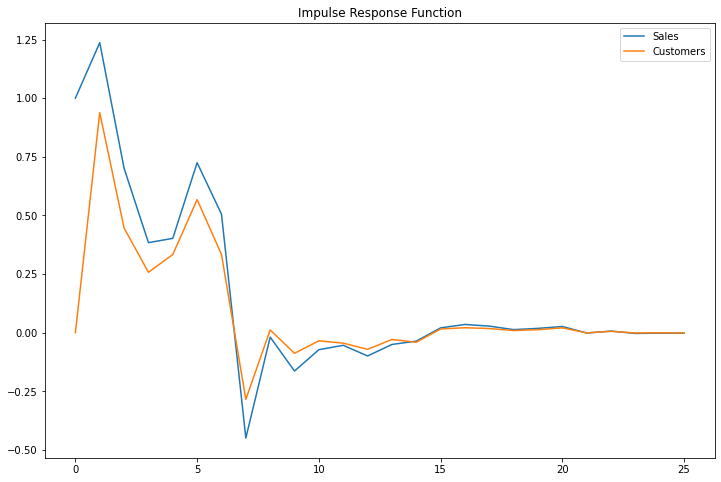

In [366]:
irf = model_s29_10.impulse_responses(steps = 25, orthogonalized= False)
irf.plot()
plt.title("Impulse Response Function")
plt.show()

### Store 31 : Forecasting sales

In [367]:
#spliting the data into train and test
store = "store 31"
store_31_train = store_31[:train_len]
store_31_test = store_31[train_len:]

print("Train data shape : ",store_31_train.shape)
print("test data shape : ",store_31_test.shape)

Train data shape :  (900, 8)
test data shape :  (42, 8)


<Figure size 1440x288 with 0 Axes>

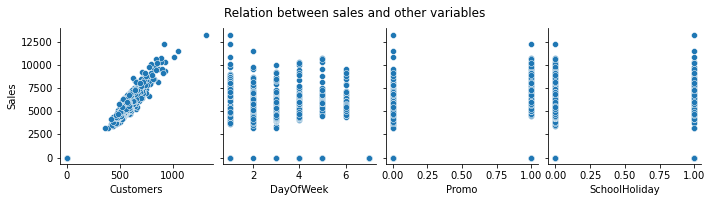

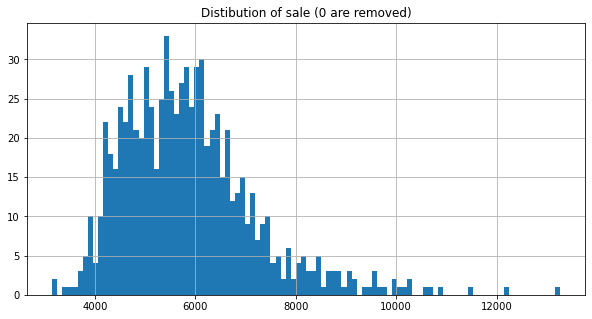

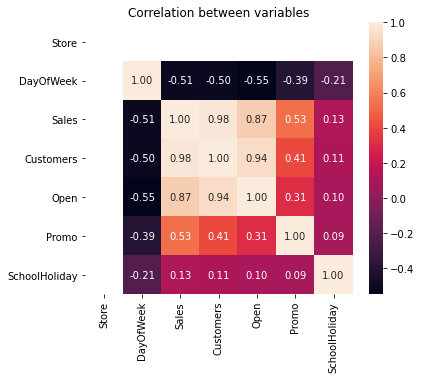

In [368]:
#visualization

visualisation(store_31)

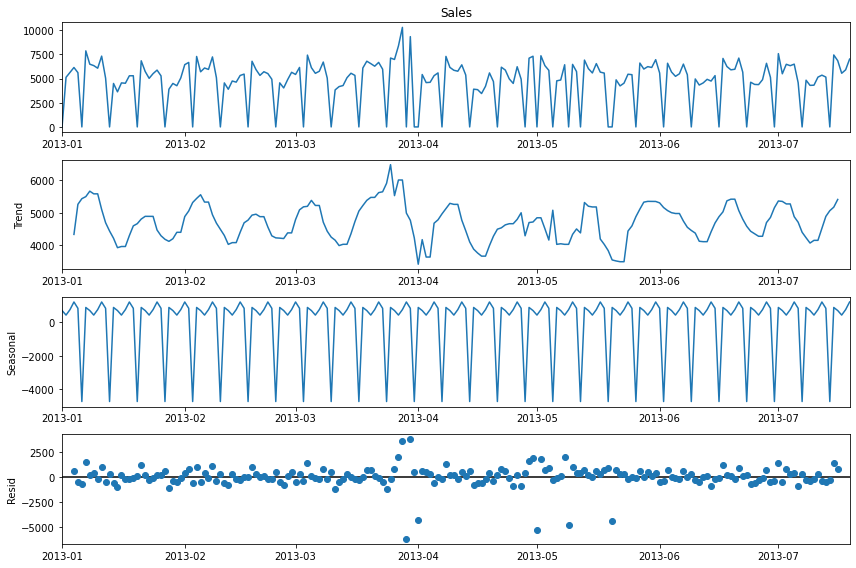

In [369]:
rcParams['figure.figsize']  =12,8
decomposition = sm.tsa.seasonal_decompose(store_31['Sales'][:200],model = 'additive')
fig = decomposition.plot()
plt.show()

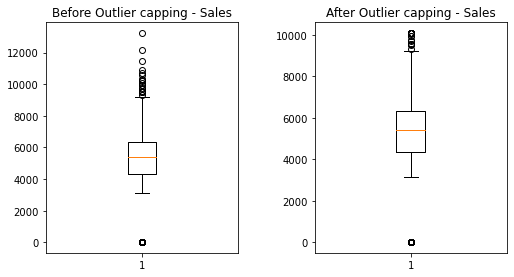

In [370]:
# outliers
store_31_train_no_outliers = store_31_train.copy()
store_31_train_no_outliers['Sales'] = outliers_treatment(store_31_train_no_outliers['Sales'],0,0.99)


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.boxplot(store_31_train['Sales'])
plt.title("Before Outlier capping - Sales")


plt.subplot(1,2,2)
plt.boxplot(store_31_train_no_outliers['Sales'])
plt.title("After Outlier capping - Sales")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 

plt.show()

In [371]:
# Johansen test to check wheather both series are cointegerated (Thogh we already know both the series are stationary from ADF test)
johnasen_test(store_31[["Sales","Customers"]])

Rank :  2
Both Series are stationary
No cointgeration


**** PACF ****
pacf value :  29
total pacf value that crossed interval :  14


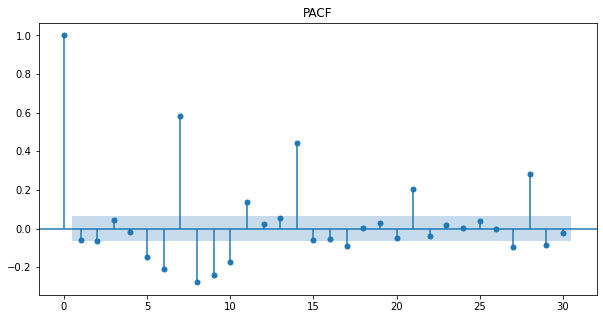



**** ACF ****
pacf value :  28
total pacf value that crossed interval :  15


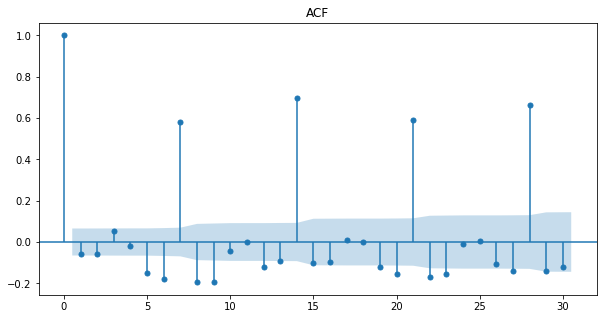

In [372]:
pacf_acf_val(store_31_train['Sales'],30)

In [373]:
#standardizing the SALES columns

standarization_column = ['Sales']
store_31_train_standardized,scaler = scaling(store_31_train_no_outliers,standarization_column)

In [374]:
# model 1

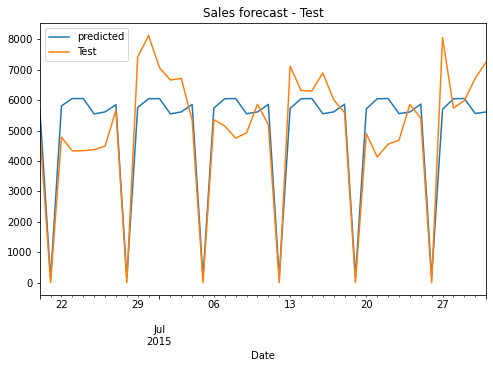

RMSE :  1047.62
MAE :  845.47


In [375]:
#model building
model_s31_1 = ARIMA(store_31_train_standardized['Sales'],order =(7,0,9))
model_s31_1 = model_s31_1.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s31_1.predict(store_31_test.index.min(),store_31_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_31_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_31_test['Sales'],prediction['Sales'])

In [376]:
result_store_31 = pd.DataFrame()

In [377]:
model = "model_s31_1"
model_type = "ARIMA"
model_para = (7,0,9)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_31 = pd.concat([result_store_31,temp_result],axis=0)
result_store_31

store       model      Rmse     Mae model_type model_para exogenous var
0  store 31  model_s31_1  1047.62  845.47      ARIMA  (7, 0, 9)          None

In [378]:
# model 2

**** PACF ****
pacf value :  29
total pacf value that crossed interval :  14


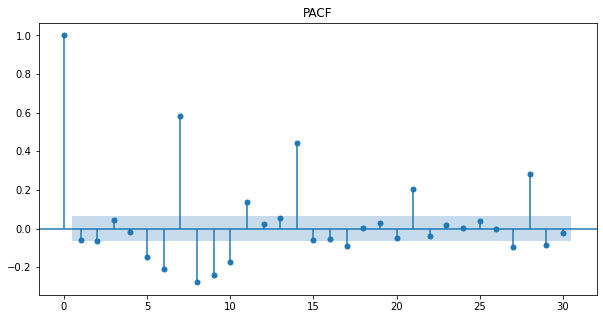



**** ACF ****
pacf value :  28
total pacf value that crossed interval :  15


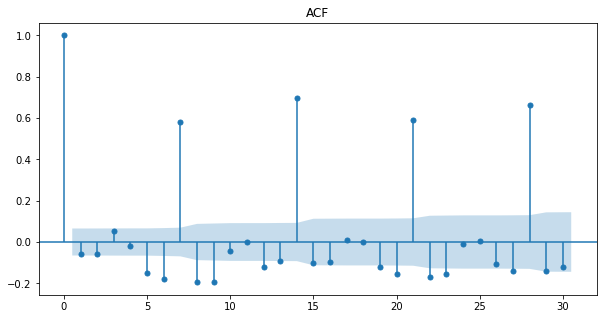

In [379]:
pacf_acf_val(store_31_train['Sales'],30)

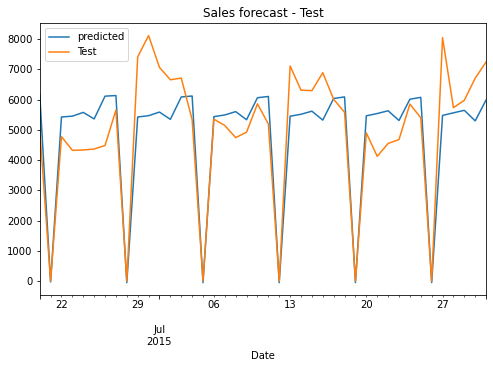

RMSE :  1063.65
MAE :  826.25


In [380]:
#model building
model_s31_2 = ARIMA(store_31_train_standardized['Sales'],order =(7,0,7))
model_s31_2 = model_s31_2.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s31_2.predict(store_31_test.index.min(),store_31_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_31_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_31_test['Sales'],prediction['Sales'])

In [381]:
model = "model_s31_2"
model_type = "ARIMA"
model_para = (7,0,7)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_31 = pd.concat([result_store_31,temp_result],axis=0)
result_store_31

store       model      Rmse     Mae model_type model_para exogenous var
0  store 31  model_s31_1  1047.62  845.47      ARIMA  (7, 0, 9)          None
0  store 31  model_s31_2  1063.65  826.25      ARIMA  (7, 0, 7)          None

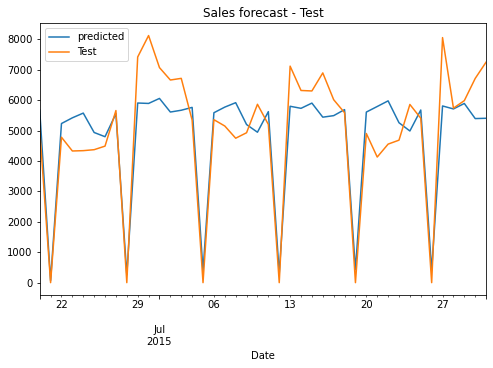

RMSE :  966.85
MAE :  775.2


In [382]:
#model building
model_s31_3 = SARIMAX(store_31_train_standardized['Sales'],order =(10,0,8),seasonal_order =(1,0,1,14))
model_s31_3 = model_s31_3.fit()
#model.summary()

#prediction for the next 6 week
prediction = model_s31_3.predict(store_31_test.index.min(),store_31_test.index.max())

prediction = pd.DataFrame(prediction)
prediction.columns = ['Sales']
# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_31_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_31_test['Sales'],prediction['Sales'])

In [383]:
model = "model_s31_3"
model_type = "SARIMA"
model_para = (10,0,8),(1,0,1,14)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_31 = pd.concat([result_store_31,temp_result],axis=0)
result_store_31

store       model      Rmse     Mae model_type  \
0  store 31  model_s31_1  1047.62  845.47      ARIMA   
0  store 31  model_s31_2  1063.65  826.25      ARIMA   
0  store 31  model_s31_3   966.85  775.20     SARIMA   

                    model_para exogenous var  
0                    (7, 0, 9)          None  
0                    (7, 0, 7)          None  
0  ((10, 0, 8), (1, 0, 1, 14))          None

In [384]:
#standardizing the "Sales , Customers"  columns

standarization_column = ['Sales',"Customers"]
store_31_train_standardized,scaler = scaling(store_31_train_no_outliers,standarization_column)


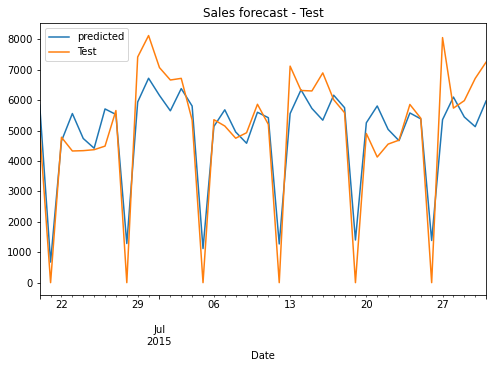

RMSE :  975.76
MAE :  757.3


In [385]:
#model building
model_s31_4 = sm.tsa.VARMAX(store_31_train_standardized[['Sales','Customers']],order =(11,9))
model_s31_4 = model_s31_4.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s31_4.predict(store_31_test.index.min(),store_31_test.index.max())



# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_31_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_31_test['Sales'],prediction['Sales'])

In [386]:
model = "model_s31_4"
model_type = "VARIMAX"
model_para = (11,9)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_31 = pd.concat([result_store_31,temp_result],axis=0)
result_store_31

store       model      Rmse     Mae model_type  \
0  store 31  model_s31_1  1047.62  845.47      ARIMA   
0  store 31  model_s31_2  1063.65  826.25      ARIMA   
0  store 31  model_s31_3   966.85  775.20     SARIMA   
0  store 31  model_s31_4   975.76  757.30    VARIMAX   

                    model_para exogenous var  
0                    (7, 0, 9)          None  
0                    (7, 0, 7)          None  
0  ((10, 0, 8), (1, 0, 1, 14))          None  
0                      (11, 9)          None

In [387]:
# model 5

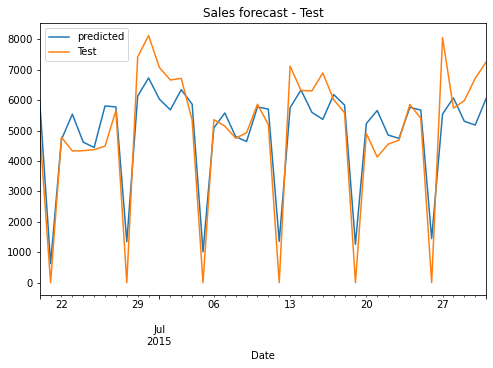

RMSE :  947.03
MAE :  741.7


In [388]:
#model building
model_s31_5 = sm.tsa.VARMAX(store_31_train_standardized[['Sales','Customers']],order =(11,8))
model_s31_5 = model_s31_5.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s31_5.predict(store_31_test.index.min(),store_31_test.index.max())



# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_31_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_31_test['Sales'],prediction['Sales'])

In [389]:
model = "model_s31_5"
model_type = "VARIMAX"
model_para = (11,8)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_31 = pd.concat([result_store_31,temp_result],axis=0)
result_store_31

store       model      Rmse     Mae model_type  \
0  store 31  model_s31_1  1047.62  845.47      ARIMA   
0  store 31  model_s31_2  1063.65  826.25      ARIMA   
0  store 31  model_s31_3   966.85  775.20     SARIMA   
0  store 31  model_s31_4   975.76  757.30    VARIMAX   
0  store 31  model_s31_5   947.03  741.70    VARIMAX   

                    model_para exogenous var  
0                    (7, 0, 9)          None  
0                    (7, 0, 7)          None  
0  ((10, 0, 8), (1, 0, 1, 14))          None  
0                      (11, 9)          None  
0                      (11, 8)          None

In [390]:
# model 6

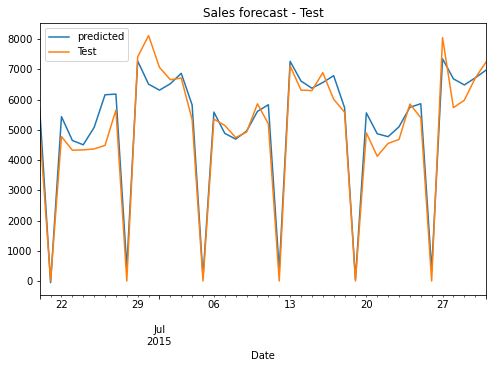

RMSE :  559.52
MAE :  421.8


In [391]:
#assigning exog varialbles
exog = store_31_train[["Open","SchoolHoliday","Promo"]]
test_exog = store_31_test[["Open","SchoolHoliday","Promo"]]

#model building
model_s31_6 = sm.tsa.VARMAX(store_31_train_standardized[['Sales','Customers']],order =(11,8),exog=exog)
model_s31_6 = model_s31_6.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s31_6.predict(store_31_test.index.min(),store_31_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_31_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_31_test['Sales'],prediction['Sales'])

In [392]:
model = "model_s31_6"
model_type = "VARIMAX"
model_para = (11,8)
exog = ["Open","SchoolHoliday","Promo"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_31 = pd.concat([result_store_31,temp_result],axis=0)
result_store_31

store       model      Rmse     Mae model_type  \
0  store 31  model_s31_1  1047.62  845.47      ARIMA   
0  store 31  model_s31_2  1063.65  826.25      ARIMA   
0  store 31  model_s31_3   966.85  775.20     SARIMA   
0  store 31  model_s31_4   975.76  757.30    VARIMAX   
0  store 31  model_s31_5   947.03  741.70    VARIMAX   
0  store 31  model_s31_6   559.52  421.80    VARIMAX   

                    model_para                 exogenous var  
0                    (7, 0, 9)                          None  
0                    (7, 0, 7)                          None  
0  ((10, 0, 8), (1, 0, 1, 14))                          None  
0                      (11, 9)                          None  
0                      (11, 8)                          None  
0                      (11, 8)  [Open, SchoolHoliday, Promo]

In [393]:
# model 7

In [394]:
test_exog.shape

(42, 3)

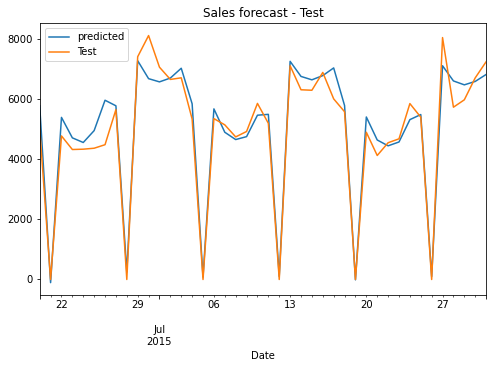

RMSE :  518.64
MAE :  387.1


In [395]:
#assigning exog varialbles
exog = store_31_train[["Open","SchoolHoliday","Promo","DayOfWeek"]]
test_exog = store_31_test[["Open","SchoolHoliday","Promo","DayOfWeek"]]

#model building
model_s31_7 = sm.tsa.VARMAX(store_31_train_standardized[['Sales','Customers']],order =(11,8),exog=exog)
model_s31_7 = model_s31_7.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s31_7.predict(store_31_test.index.min(),store_31_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_31_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_31_test['Sales'],prediction['Sales'])

In [396]:
model = "model_s31_7"
model_type = "VARIMAX"
model_para = (11,8)
exog = ["Open","SchoolHoliday","Promo","DayOfWeek"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_31 = pd.concat([result_store_31,temp_result],axis=0)
result_store_31

store       model      Rmse     Mae model_type  \
0  store 31  model_s31_1  1047.62  845.47      ARIMA   
0  store 31  model_s31_2  1063.65  826.25      ARIMA   
0  store 31  model_s31_3   966.85  775.20     SARIMA   
0  store 31  model_s31_4   975.76  757.30    VARIMAX   
0  store 31  model_s31_5   947.03  741.70    VARIMAX   
0  store 31  model_s31_6   559.52  421.80    VARIMAX   
0  store 31  model_s31_7   518.64  387.10    VARIMAX   

                    model_para                            exogenous var  
0                    (7, 0, 9)                                     None  
0                    (7, 0, 7)                                     None  
0  ((10, 0, 8), (1, 0, 1, 14))                                     None  
0                      (11, 9)                                     None  
0                      (11, 8)                                     None  
0                      (11, 8)             [Open, SchoolHoliday, Promo]  
0                      (11, 8)  [Open, SchoolHoliday, Promo, DayOfWeek]

In [397]:
# model 8

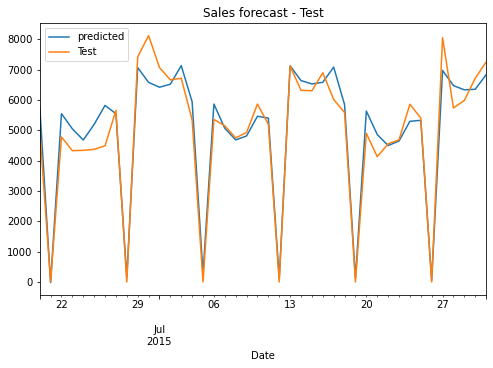

RMSE :  563.95
MAE :  428.35


In [398]:
#assigning exog varialbles
exog = store_31_train[["Open","SchoolHoliday","Promo","DayOfWeek"]]
test_exog = store_31_test[["Open","SchoolHoliday","Promo","DayOfWeek"]]

#model building
model_s31_8 = sm.tsa.VARMAX(store_31_train_standardized[['Sales','Customers']],order =(10,8),exog=exog)
model_s31_8 = model_s31_8.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s31_8.predict(store_31_test.index.min(),store_31_test.index.max(),exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)

#plotting
plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_31_test['Sales'].plot(label="Test")
plt.legend(loc='best')
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_31_test['Sales'],prediction['Sales'])

In [399]:
model = "model_s31_8"
model_type = "VARIMAX"
model_para = (10,8)
exog = ["Open","SchoolHoliday","Promo","DayOfWeek"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_31 = pd.concat([result_store_31,temp_result],axis=0)
result_store_31

store       model      Rmse     Mae model_type  \
0  store 31  model_s31_1  1047.62  845.47      ARIMA   
0  store 31  model_s31_2  1063.65  826.25      ARIMA   
0  store 31  model_s31_3   966.85  775.20     SARIMA   
0  store 31  model_s31_4   975.76  757.30    VARIMAX   
0  store 31  model_s31_5   947.03  741.70    VARIMAX   
0  store 31  model_s31_6   559.52  421.80    VARIMAX   
0  store 31  model_s31_7   518.64  387.10    VARIMAX   
0  store 31  model_s31_8   563.95  428.35    VARIMAX   

                    model_para                            exogenous var  
0                    (7, 0, 9)                                     None  
0                    (7, 0, 7)                                     None  
0  ((10, 0, 8), (1, 0, 1, 14))                                     None  
0                      (11, 9)                                     None  
0                      (11, 8)                                     None  
0                      (11, 8)             [Open, SchoolHoliday, Promo]  
0                      (11, 8)  [Open, SchoolHoliday, Promo, DayOfWeek]  
0                      (10, 8)  [Open, SchoolHoliday, Promo, DayOfWeek]

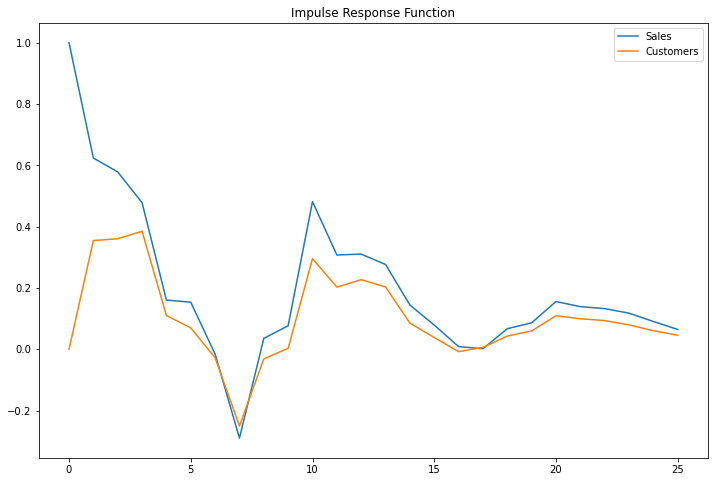

In [400]:
irf = model_s31_8.impulse_responses(steps = 25, orthogonalized= False)
irf.plot()
plt.title("Impulse Response Function")
plt.show()

### Store 46 : Forecasting sales

In [401]:
#spliting the data into train and test
store = "store 46"
store_46_train = store_46[:-42]
store_46_test = store_46[-42:]

print("Train data shape : ",store_46_train.shape)
print("test data shape : ",store_46_test.shape)

Train data shape :  (716, 8)
test data shape :  (42, 8)


In [402]:
store_46_train.reset_index(inplace=True)
store_46_test.reset_index(inplace=True)

<Figure size 1440x288 with 0 Axes>

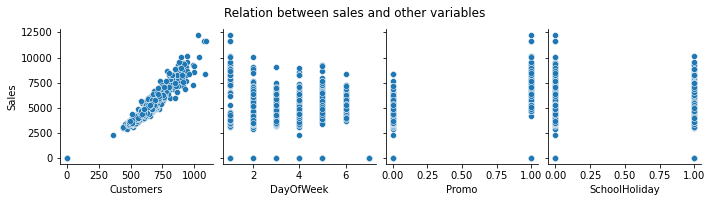

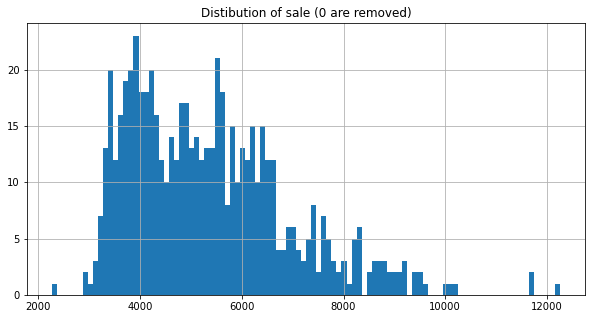

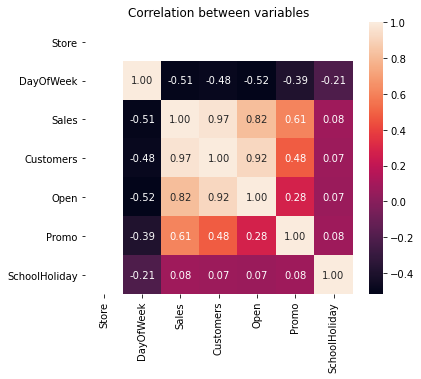

In [403]:
#visualization

visualisation(store_46)

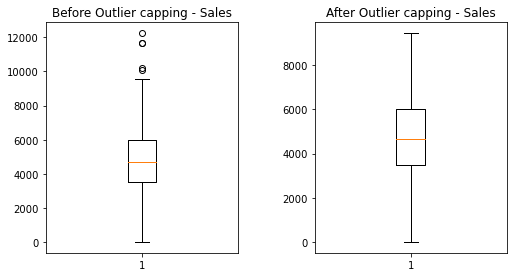

In [404]:
# outliers
store_46_train_no_outliers = store_46_train.copy()
store_46_train_no_outliers['Sales'] = outliers_treatment(store_46_train_no_outliers['Sales'],0,0.99)


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.boxplot(store_46_train['Sales'])
plt.title("Before Outlier capping - Sales")


plt.subplot(1,2,2)
plt.boxplot(store_46_train_no_outliers['Sales'])
plt.title("After Outlier capping - Sales")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 

plt.show()

In [405]:
# Johansen test to check wheather both series are cointegerated (Thogh we already know both the series are stationary from ADF test)
johnasen_test(store_46[["Sales","Customers"]])

Rank :  2
Both Series are stationary
No cointgeration


**** PACF ****
pacf value :  28
total pacf value that crossed interval :  16


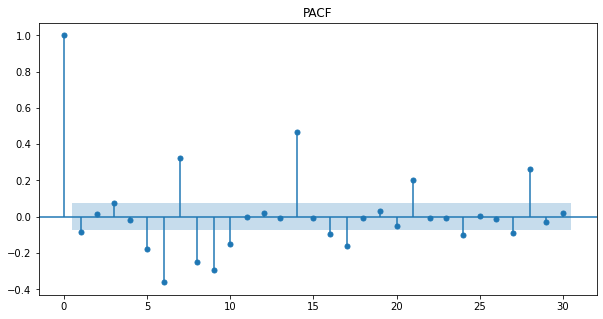



**** ACF ****
pacf value :  28
total pacf value that crossed interval :  15


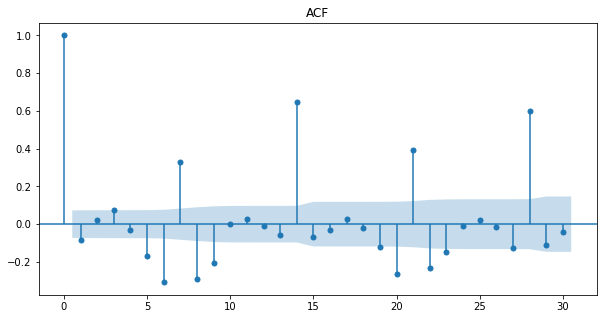

In [406]:
pacf_acf_val(store_46_train['Sales'],30)

In [407]:
result_store_46 = pd.DataFrame()

In [408]:
# #standardizing the SALES columns

# standarization_column = ['Sales']
# store_46_train_standardized,scaler = scaling(store_46_train_no_outliers,standarization_column)

In [409]:
# #model building
# model_s146_1 = ARIMA(store_46_train_standardized['Sales'],order =(1,0,1))
# model_s146_1 = model_s146_1.fit()
# #model.summary()

# #prediction for the next 6 week
# prediction = model_s146_1.forecast(42)

# prediction = pd.DataFrame(prediction)
# prediction.columns = ['Sales']
# # inversing the standardized value
# prediction = inverse_scaler(prediction,scaler)


# #plotting
# xticks = store_46_test.index

# plt.figure(figsize=(8,5))
# prediction['Sales'].plot(label="predicted")
# store_46_test['Sales'].plot(label="Test")
# plt.xticks(xticks,store_46_test['Date'])
# plt.legend(loc='best')
# plt.locator_params(axis='x', nbins=5)
# plt.title("Sales forecast - Test")
# plt.show()

# #error value
# rmse , mae =error(store_46_test['Sales'],prediction['Sales'])

In [410]:
#varimax

In [411]:
#standardizing the "Sales , Customers"  columns

standarization_column = ['Sales',"Customers"]
store_46_train_standardized,scaler = scaling(store_46_train_no_outliers,standarization_column)


In [412]:
# model 1

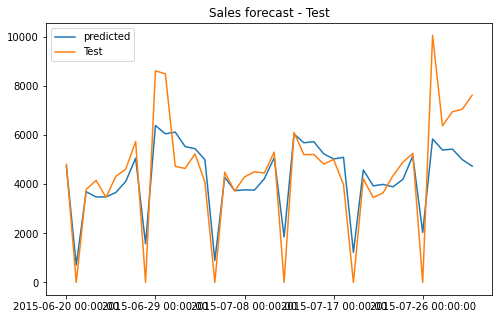

RMSE :  1261.53
MAE :  899.52


In [413]:
#model building
model_s46_1 = sm.tsa.VARMAX(store_46_train_standardized[['Sales','Customers']],order =(7,7))
model_s46_1 = model_s46_1.fit(maxiter=50,disp=False)

#prediction for the next 6 week
prediction = model_s46_1.forecast(42)

prediction = pd.DataFrame(prediction)

# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)
prediction.reset_index(inplace=True)

#plotting
xticks = store_46_test.index

plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_46_test['Sales'].plot(label="Test")
plt.xticks(xticks,store_46_test['Date'])
plt.legend(loc='best')
plt.locator_params(axis='x', nbins=5)
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_46_test['Sales'],prediction['Sales'])

In [414]:
model = "model_s46_1"
model_type = "VARMAX"
model_para = (7,7)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_46 = pd.concat([result_store_46,temp_result],axis=0)
result_store_46

store       model      Rmse     Mae model_type model_para exogenous var
0  store 46  model_s46_1  1261.53  899.52     VARMAX     (7, 7)          None

In [415]:
# MODEL 2

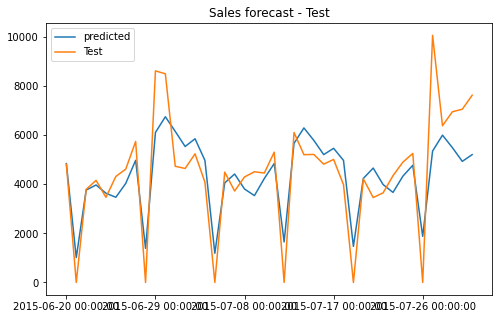

RMSE :  1295.18
MAE :  973.27


In [416]:
#model building
model_s46_2 = sm.tsa.VARMAX(store_46_train_standardized[['Sales','Customers']],order =(10,9))
model_s46_2 = model_s46_2.fit(maxiter=50,disp=False)

#prediction for the next 6 week
prediction = model_s46_2.forecast(42)

prediction = pd.DataFrame(prediction)

# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)
prediction.reset_index(inplace=True)

#plotting
xticks = store_46_test.index

plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_46_test['Sales'].plot(label="Test")
plt.xticks(xticks,store_46_test['Date'])
plt.legend(loc='best')
plt.locator_params(axis='x', nbins=5)
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_46_test['Sales'],prediction['Sales'])

In [417]:
model = "model_s46_2"
model_type = "VARMAX"
model_para = (10,9)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_46 = pd.concat([result_store_46,temp_result],axis=0)
result_store_46

store       model      Rmse     Mae model_type model_para exogenous var
0  store 46  model_s46_1  1261.53  899.52     VARMAX     (7, 7)          None
0  store 46  model_s46_2  1295.18  973.27     VARMAX    (10, 9)          None

In [418]:
# model 3

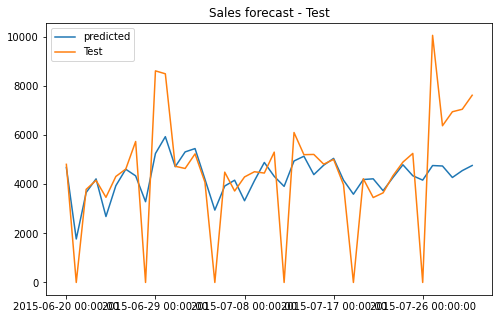

RMSE :  1878.09
MAE :  1251.24


In [419]:
#model building
model_s46_3 = sm.tsa.VARMAX(store_46_train_standardized[['Sales','Customers']],order =(6,9))
model_s46_3 = model_s46_3.fit(maxiter=50,disp=False)

#prediction for the next 6 week
prediction = model_s46_3.forecast(42)

prediction = pd.DataFrame(prediction)

# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)
prediction.reset_index(inplace=True)

#plotting
xticks = store_46_test.index

plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_46_test['Sales'].plot(label="Test")
plt.xticks(xticks,store_46_test['Date'])
plt.legend(loc='best')
plt.locator_params(axis='x', nbins=5)
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_46_test['Sales'],prediction['Sales'])

In [420]:
model = "model_s46_3"
model_type = "VARMAX"
model_para = (6,9)
exog = "None"

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_46 = pd.concat([result_store_46,temp_result],axis=0)
result_store_46

store       model      Rmse      Mae model_type model_para exogenous var
0  store 46  model_s46_1  1261.53   899.52     VARMAX     (7, 7)          None
0  store 46  model_s46_2  1295.18   973.27     VARMAX    (10, 9)          None
0  store 46  model_s46_3  1878.09  1251.24     VARMAX     (6, 9)          None

In [421]:
# model 4

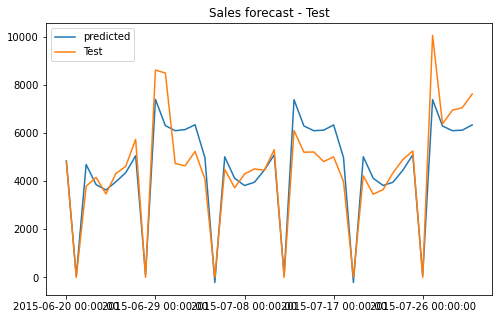

RMSE :  914.69
MAE :  696.06


In [422]:
#assigning exog varialbles
exog = store_46_train[["Open","SchoolHoliday","Promo"]]
test_exog = store_46_test[["Open","SchoolHoliday","Promo"]]

#model building
model_s46_4 = sm.tsa.VARMAX(store_46_train_standardized[['Sales','Customers']],order =(6,7),exog=exog)
model_s46_4 = model_s46_4.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s46_4.forecast(42,exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)
prediction.reset_index(inplace=True)

#plotting
xticks = store_46_test.index

plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_46_test['Sales'].plot(label="Test")
plt.xticks(xticks,store_46_test['Date'])
plt.legend(loc='best')
plt.locator_params(axis='x', nbins=5)
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_46_test['Sales'],prediction['Sales'])

In [423]:
model = "model_s46_4"
model_type = "VARMAX"
model_para = (6,9)
exog = ["Open","SchoolHoliday","Promo"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_46 = pd.concat([result_store_46,temp_result],axis=0)
result_store_46

store       model      Rmse      Mae model_type model_para  \
0  store 46  model_s46_1  1261.53   899.52     VARMAX     (7, 7)   
0  store 46  model_s46_2  1295.18   973.27     VARMAX    (10, 9)   
0  store 46  model_s46_3  1878.09  1251.24     VARMAX     (6, 9)   
0  store 46  model_s46_4   914.69   696.06     VARMAX     (6, 9)   

                  exogenous var  
0                          None  
0                          None  
0                          None  
0  [Open, SchoolHoliday, Promo]

In [424]:
# model 5

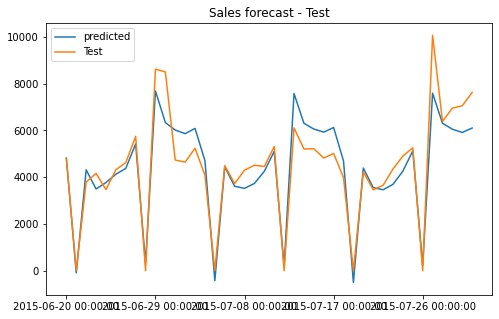

RMSE :  863.51
MAE :  656.6


In [425]:
#assigning exog varialbles
exog = store_46_train[["Open","SchoolHoliday","Promo","DayOfWeek"]]
test_exog = store_46_test[["Open","SchoolHoliday","Promo","DayOfWeek"]]

#model building
model_s46_5 = sm.tsa.VARMAX(store_46_train_standardized[['Sales','Customers']],order =(10,9),exog=exog)
model_s46_5 = model_s46_5.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s46_5.forecast(42,exog=test_exog)


# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)
prediction.reset_index(inplace=True)
#plotting
xticks = store_46_test.index

plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_46_test['Sales'].plot(label="Test")
plt.xticks(xticks,store_46_test['Date'])
plt.legend(loc='best')
plt.locator_params(axis='x', nbins=5)
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_46_test['Sales'],prediction['Sales'])

In [426]:
model = "model_s46_5"
model_type = "VARMAX"
model_para = (10,9)
exog = ["Open","SchoolHoliday","Promo","DayOfWeek"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_46 = pd.concat([result_store_46,temp_result],axis=0)
result_store_46

store       model      Rmse      Mae model_type model_para  \
0  store 46  model_s46_1  1261.53   899.52     VARMAX     (7, 7)   
0  store 46  model_s46_2  1295.18   973.27     VARMAX    (10, 9)   
0  store 46  model_s46_3  1878.09  1251.24     VARMAX     (6, 9)   
0  store 46  model_s46_4   914.69   696.06     VARMAX     (6, 9)   
0  store 46  model_s46_5   863.51   656.60     VARMAX    (10, 9)   

                             exogenous var  
0                                     None  
0                                     None  
0                                     None  
0             [Open, SchoolHoliday, Promo]  
0  [Open, SchoolHoliday, Promo, DayOfWeek]

In [427]:
# model 6

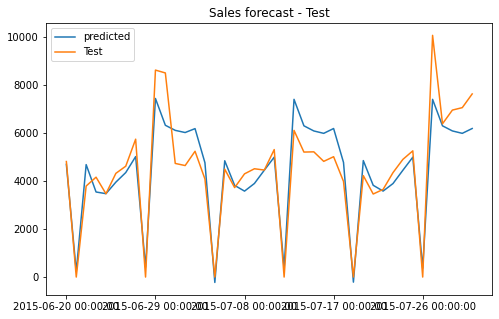

RMSE :  899.97
MAE :  699.81


In [428]:
#assigning exog varialbles
exog = store_46_train[["Open","SchoolHoliday","Promo","DayOfWeek"]]
test_exog = store_46_test[["Open","SchoolHoliday","Promo","DayOfWeek"]]

#model building
model_s46_6 = sm.tsa.VARMAX(store_46_train_standardized[['Sales','Customers']],order =(6,7),exog=exog)
model_s46_6 = model_s46_6.fit(maxiter=50,disp=False)
#model.summary()

#prediction for the next 6 week
prediction = model_s46_6.forecast(42,exog=test_exog)



# inversing the standardized value
prediction = inverse_scaler(prediction,scaler)
prediction.reset_index(inplace=True)

#plotting
xticks = store_46_test.index

plt.figure(figsize=(8,5))
prediction['Sales'].plot(label="predicted")
store_46_test['Sales'].plot(label="Test")
plt.xticks(xticks,store_46_test['Date'])
plt.legend(loc='best')
plt.locator_params(axis='x', nbins=5)
plt.title("Sales forecast - Test")
plt.show()

#error value
rmse , mae =error(store_46_test['Sales'],prediction['Sales'])

In [429]:
model = "model_s46_6"
model_type = "VARMAX"
model_para = (6,7)
exog = ["Open","SchoolHoliday","Promo","DayOfWeek"]

temp_result = pd.DataFrame({"store":[store],"model ": [model],"Rmse":[rmse],"Mae":[mae],"model_type":[model_type],"model_para":[model_para],"exogenous var":[exog]})
result_store_46 = pd.concat([result_store_46,temp_result],axis=0)
result_store_46

store       model      Rmse      Mae model_type model_para  \
0  store 46  model_s46_1  1261.53   899.52     VARMAX     (7, 7)   
0  store 46  model_s46_2  1295.18   973.27     VARMAX    (10, 9)   
0  store 46  model_s46_3  1878.09  1251.24     VARMAX     (6, 9)   
0  store 46  model_s46_4   914.69   696.06     VARMAX     (6, 9)   
0  store 46  model_s46_5   863.51   656.60     VARMAX    (10, 9)   
0  store 46  model_s46_6   899.97   699.81     VARMAX     (6, 7)   

                             exogenous var  
0                                     None  
0                                     None  
0                                     None  
0             [Open, SchoolHoliday, Promo]  
0  [Open, SchoolHoliday, Promo, DayOfWeek]  
0  [Open, SchoolHoliday, Promo, DayOfWeek]

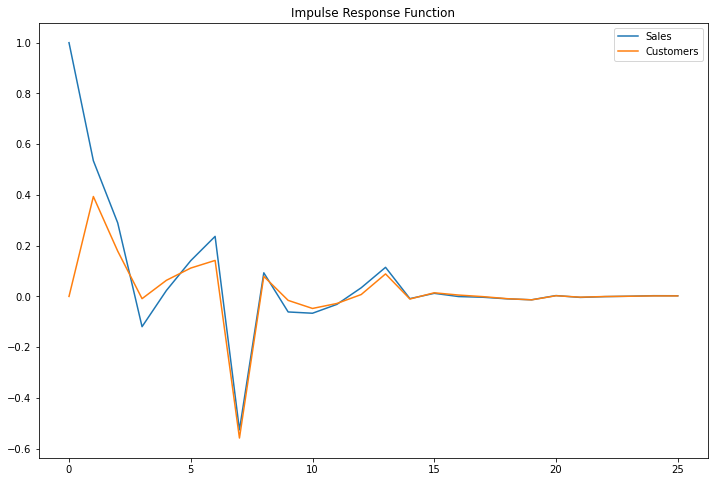

In [430]:
irf = model_s46_6.impulse_responses(steps = 25, orthogonalized= False)
irf.plot()
plt.title("Impulse Response Function")
plt.show()

#### Results

In [431]:
result_store_list_df = [result_store_1,result_store_3,result_store_8,result_store_9,result_store_13,result_store_25,result_store_29,result_store_31,result_store_46]

In [432]:
result = pd.DataFrame()
for df in result_store_list_df:
    least_rmse_val = df["Rmse"].min()
    best_model = df[df["Rmse"]==least_rmse_val]
    result = result.append(best_model)
    
result.reset_index(inplace=True)
result.drop(columns = "index",inplace=True)

In [433]:
result

store       model      Rmse     Mae model_type  \
0   store 1   model_s1_6   434.64  358.36     VARMAX   
1   store 3   model_s3_5   940.49  623.09     VARMAX   
2   store 8   model_s8_6   924.15  654.38    VARIMAX   
3   store 9   model_s9_3  1045.28  788.19     SARIMA   
4  store 13  model_s13_4  1092.91  697.57     VARMAX   
5  store 25  model_s25_7  1214.92  933.67    VARIMAX   
6  store 29  model_s29_4  1117.76  884.98     SARIMA   
7  store 31  model_s31_7   518.64  387.10    VARIMAX   
8  store 46  model_s46_5   863.51  656.60     VARMAX   

                   model_para                            exogenous var  
0                   (7, 0, 7)             [Open, SchoolHoliday, Promo]  
1                      (7, 7)             [Open, SchoolHoliday, Promo]  
2                     (11, 7)             [Open, SchoolHoliday, Promo]  
3  ((7, 0, 7), (1, 0, 1, 14))                                     None  
4                     (10, 9)  [Open, SchoolHoliday, Promo, DayOfWeek]  
5                   (7, 0, 7)  [Open, SchoolHoliday, Promo, DayOfWeek]  
6  ((9, 0, 9), (1, 0, 1, 14))                                     None  
7                     (11, 8)  [Open, SchoolHoliday, Promo, DayOfWeek]  
8                     (10, 9)  [Open, SchoolHoliday, Promo, DayOfWeek]

#### Results :

- Sarima and Varmax where the best models among the different models used 
- In most case VARMAX model showcased the best pridiction (7 out of 9 models)

#### Note : 
    - To Evaluate model , I have used RMSE(Root Mean Square Error) and MAE(Mean Absolute Error) as error terms
    - I have not used MAPE(Mean Absolute Percentage Error) because in both test and train set we had some input values equal to zero , as well as we had zeroes in test data as well
    - so in such case, when we use mape to measure error term , it may results in output as infinity (which is not good measure to evaluate)